In [1]:
import torch 
import os
import sys
os.chdir('/home/baly/projects/sopt_shape')
from lib.library import *
from lib.lib_ot import *
from lib.sliced_opt import *
from lib.lib_shape import *
from lib.cpd import *
from lib.icp_ffd import *

method is init
init
results/2D_fish_0.00/
(91, 2)
(91, 2)


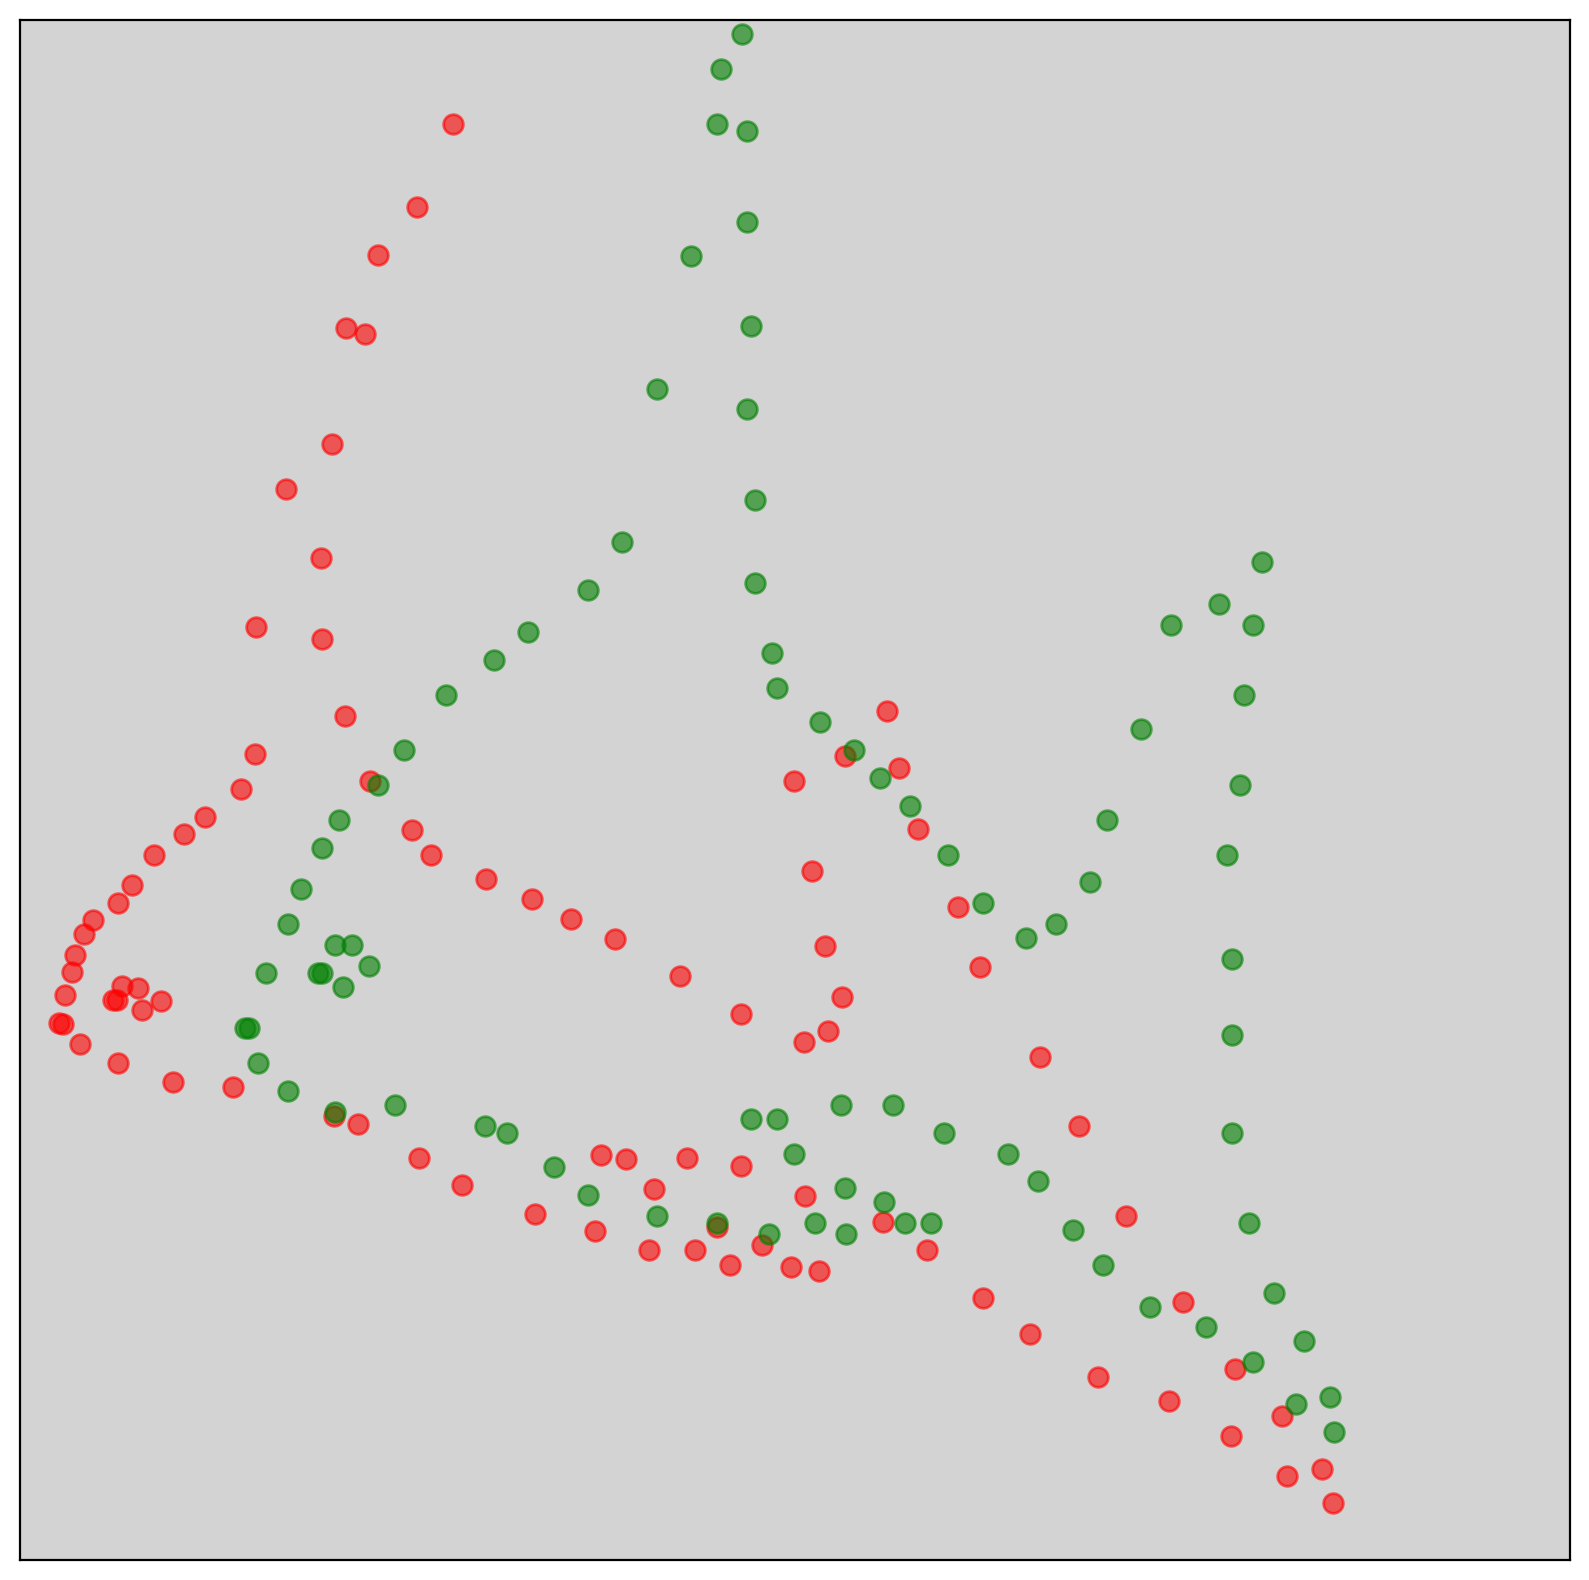

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
init
results/2D_fish_0.10/
(91, 2)
(100, 2)


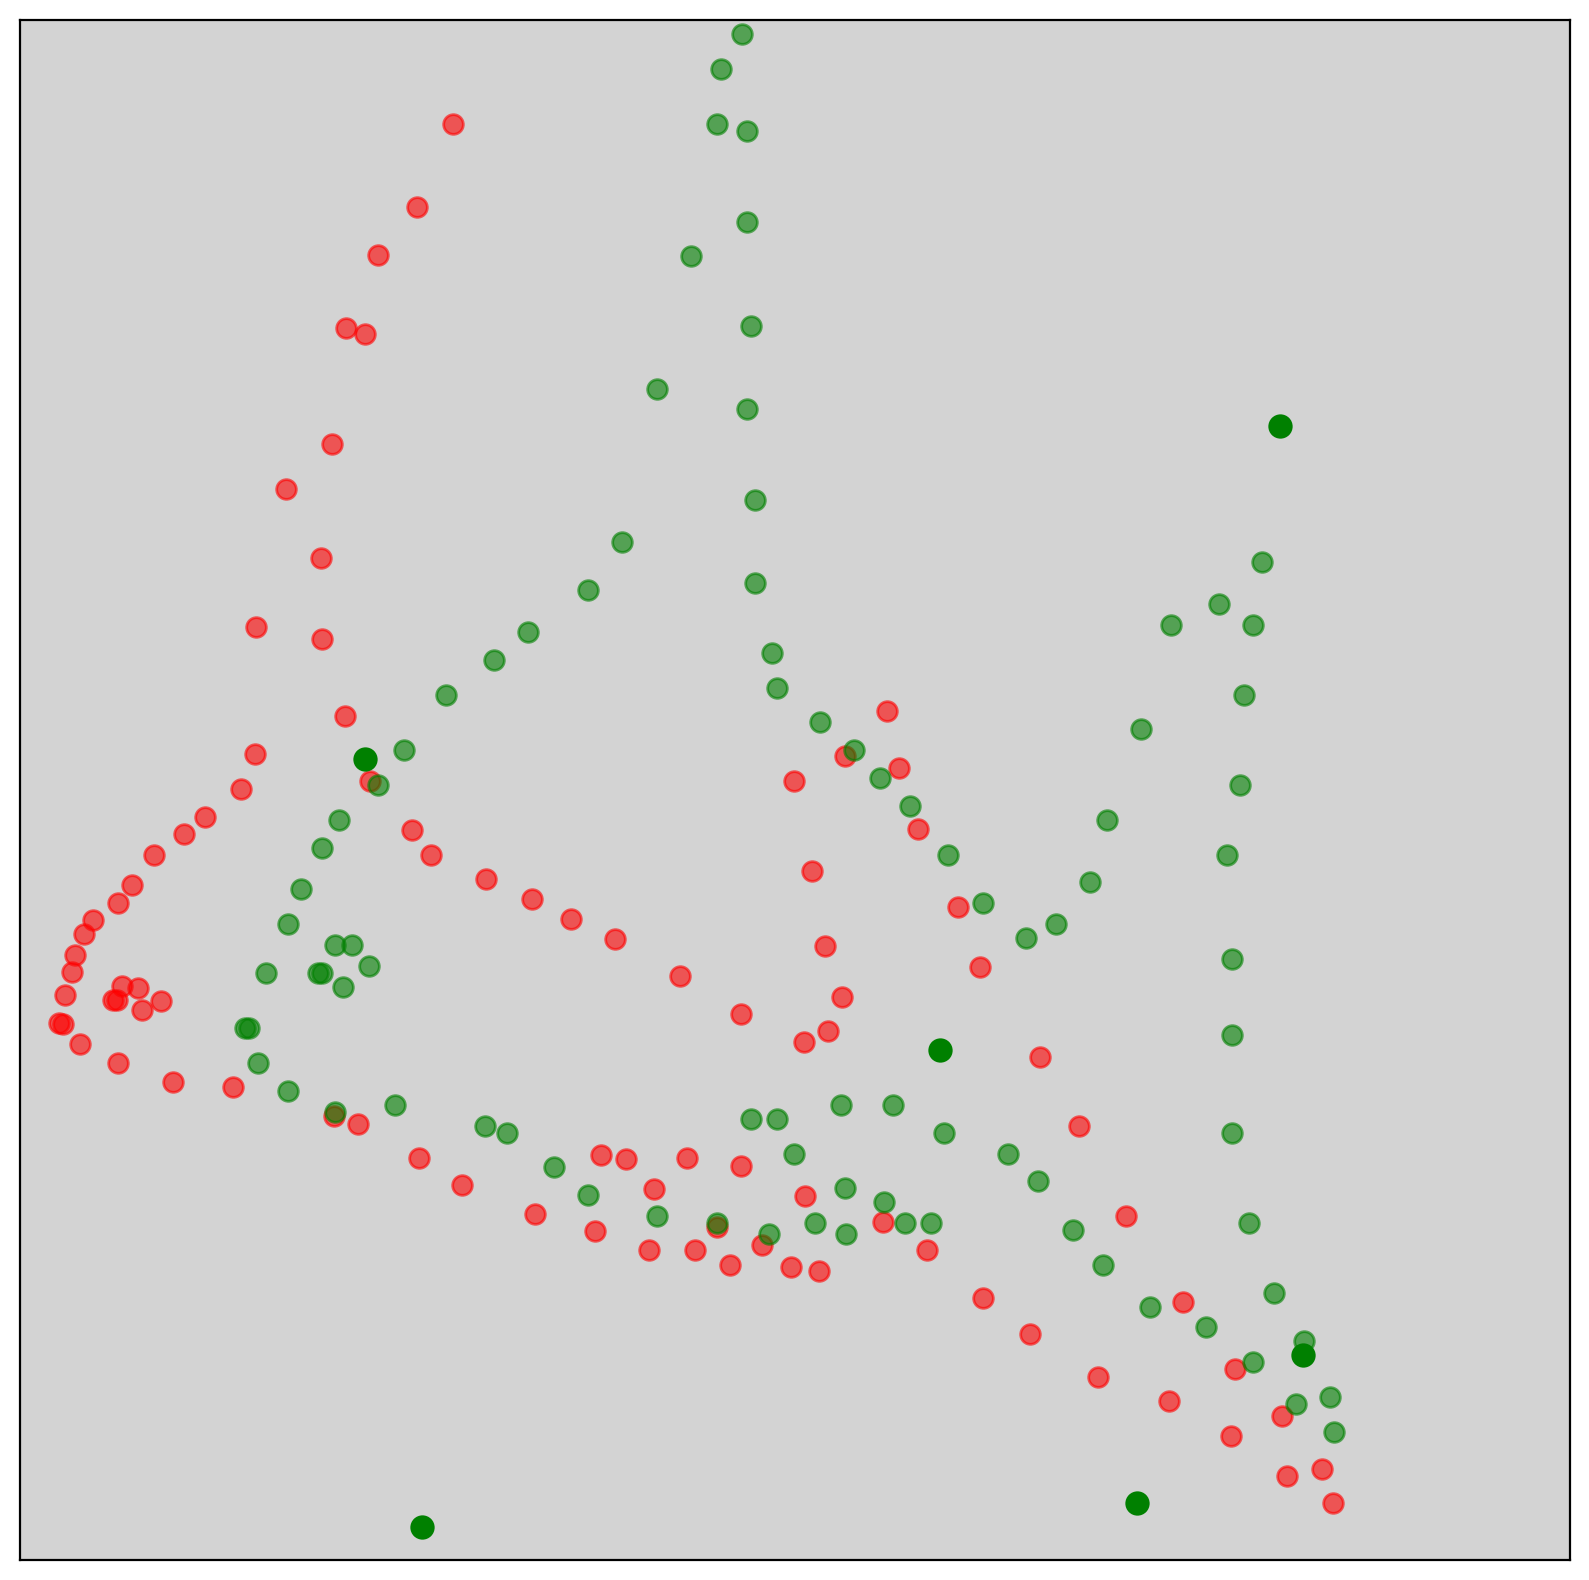

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
init
results/2D_fish_0.20/
(91, 2)
(109, 2)


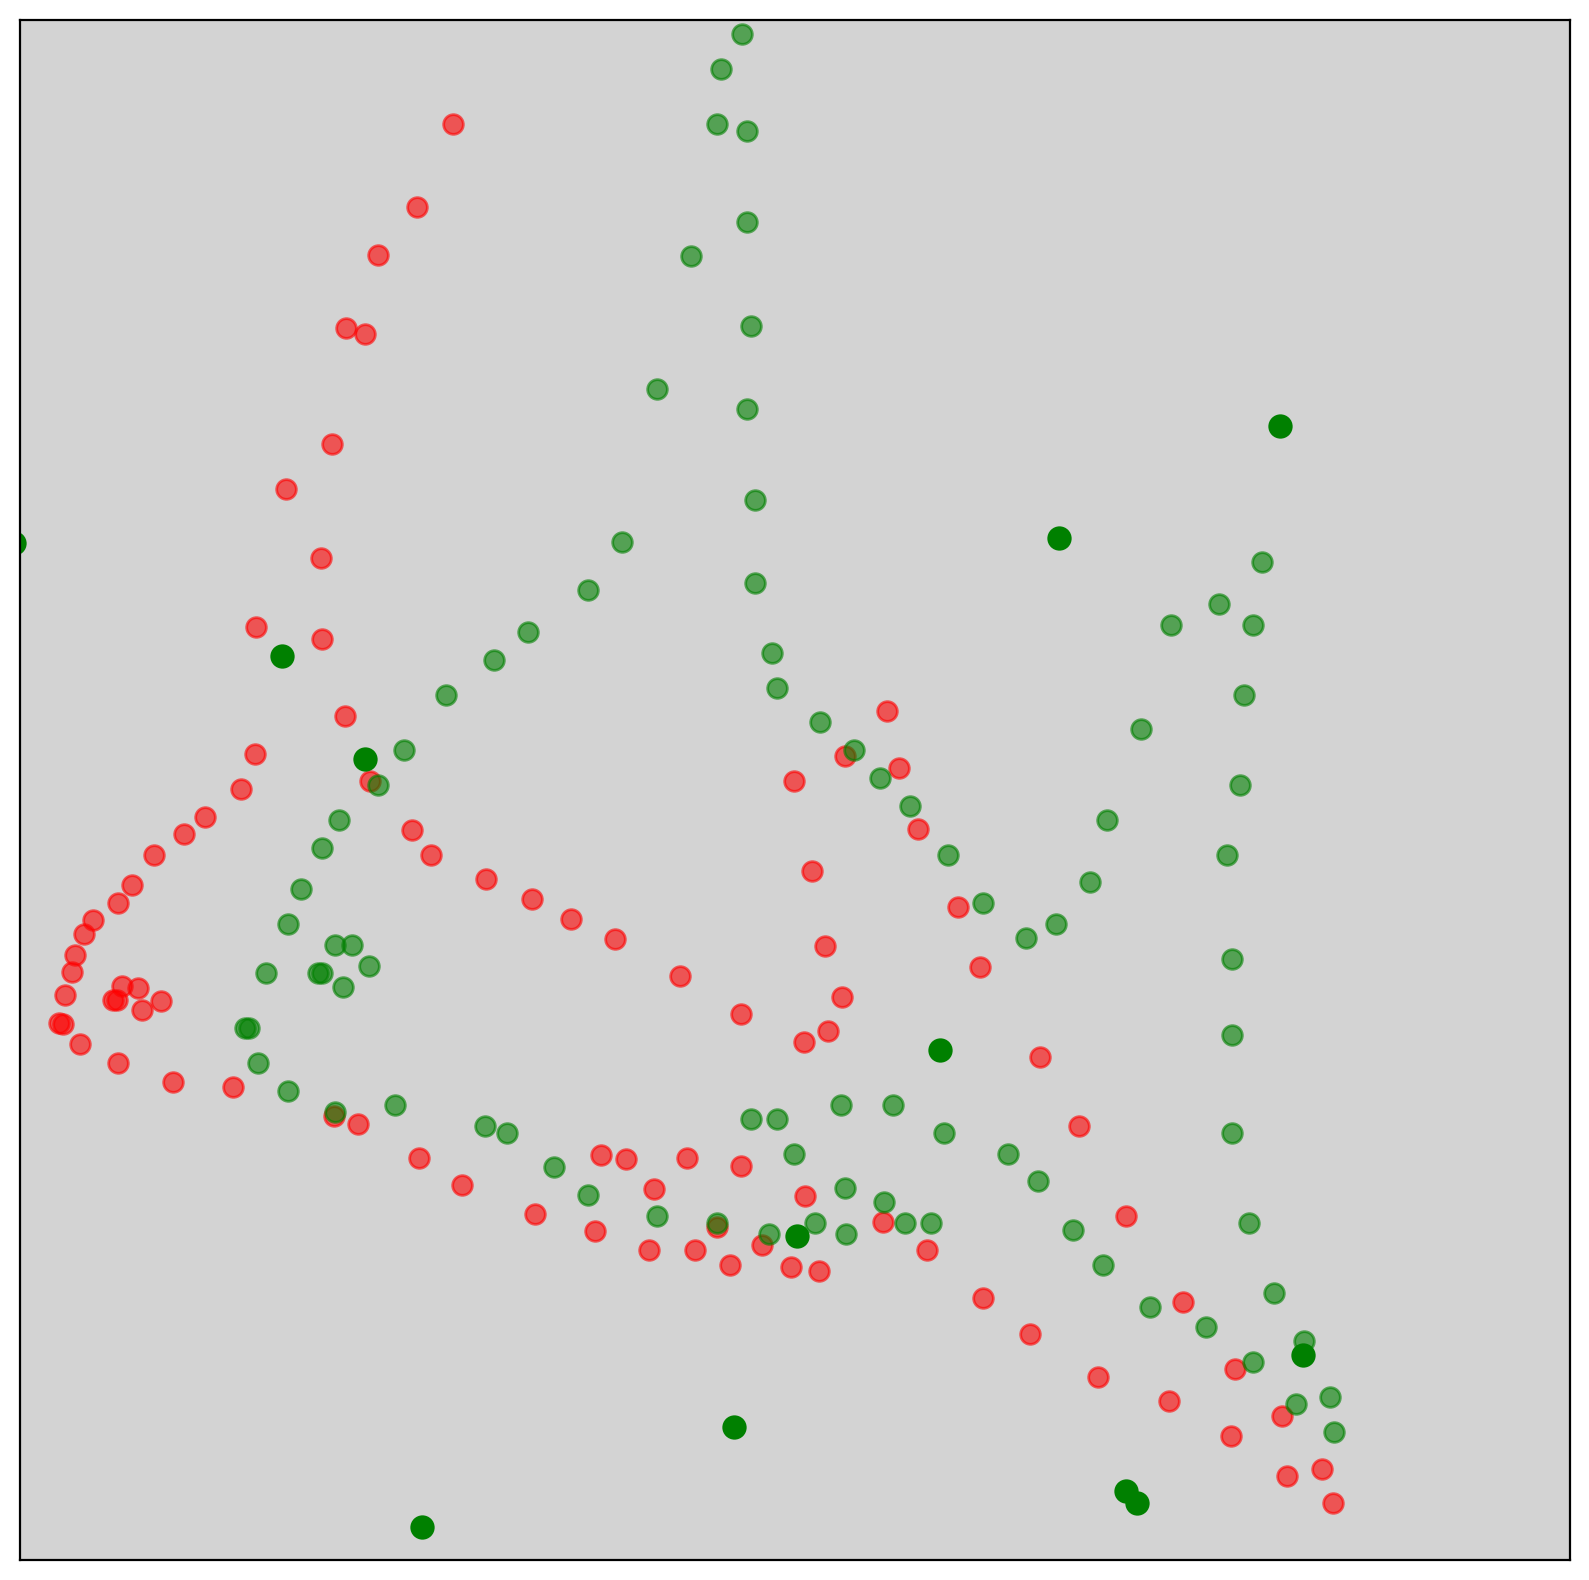

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
init
results/2D_fish_0.30/
(91, 2)
(118, 2)


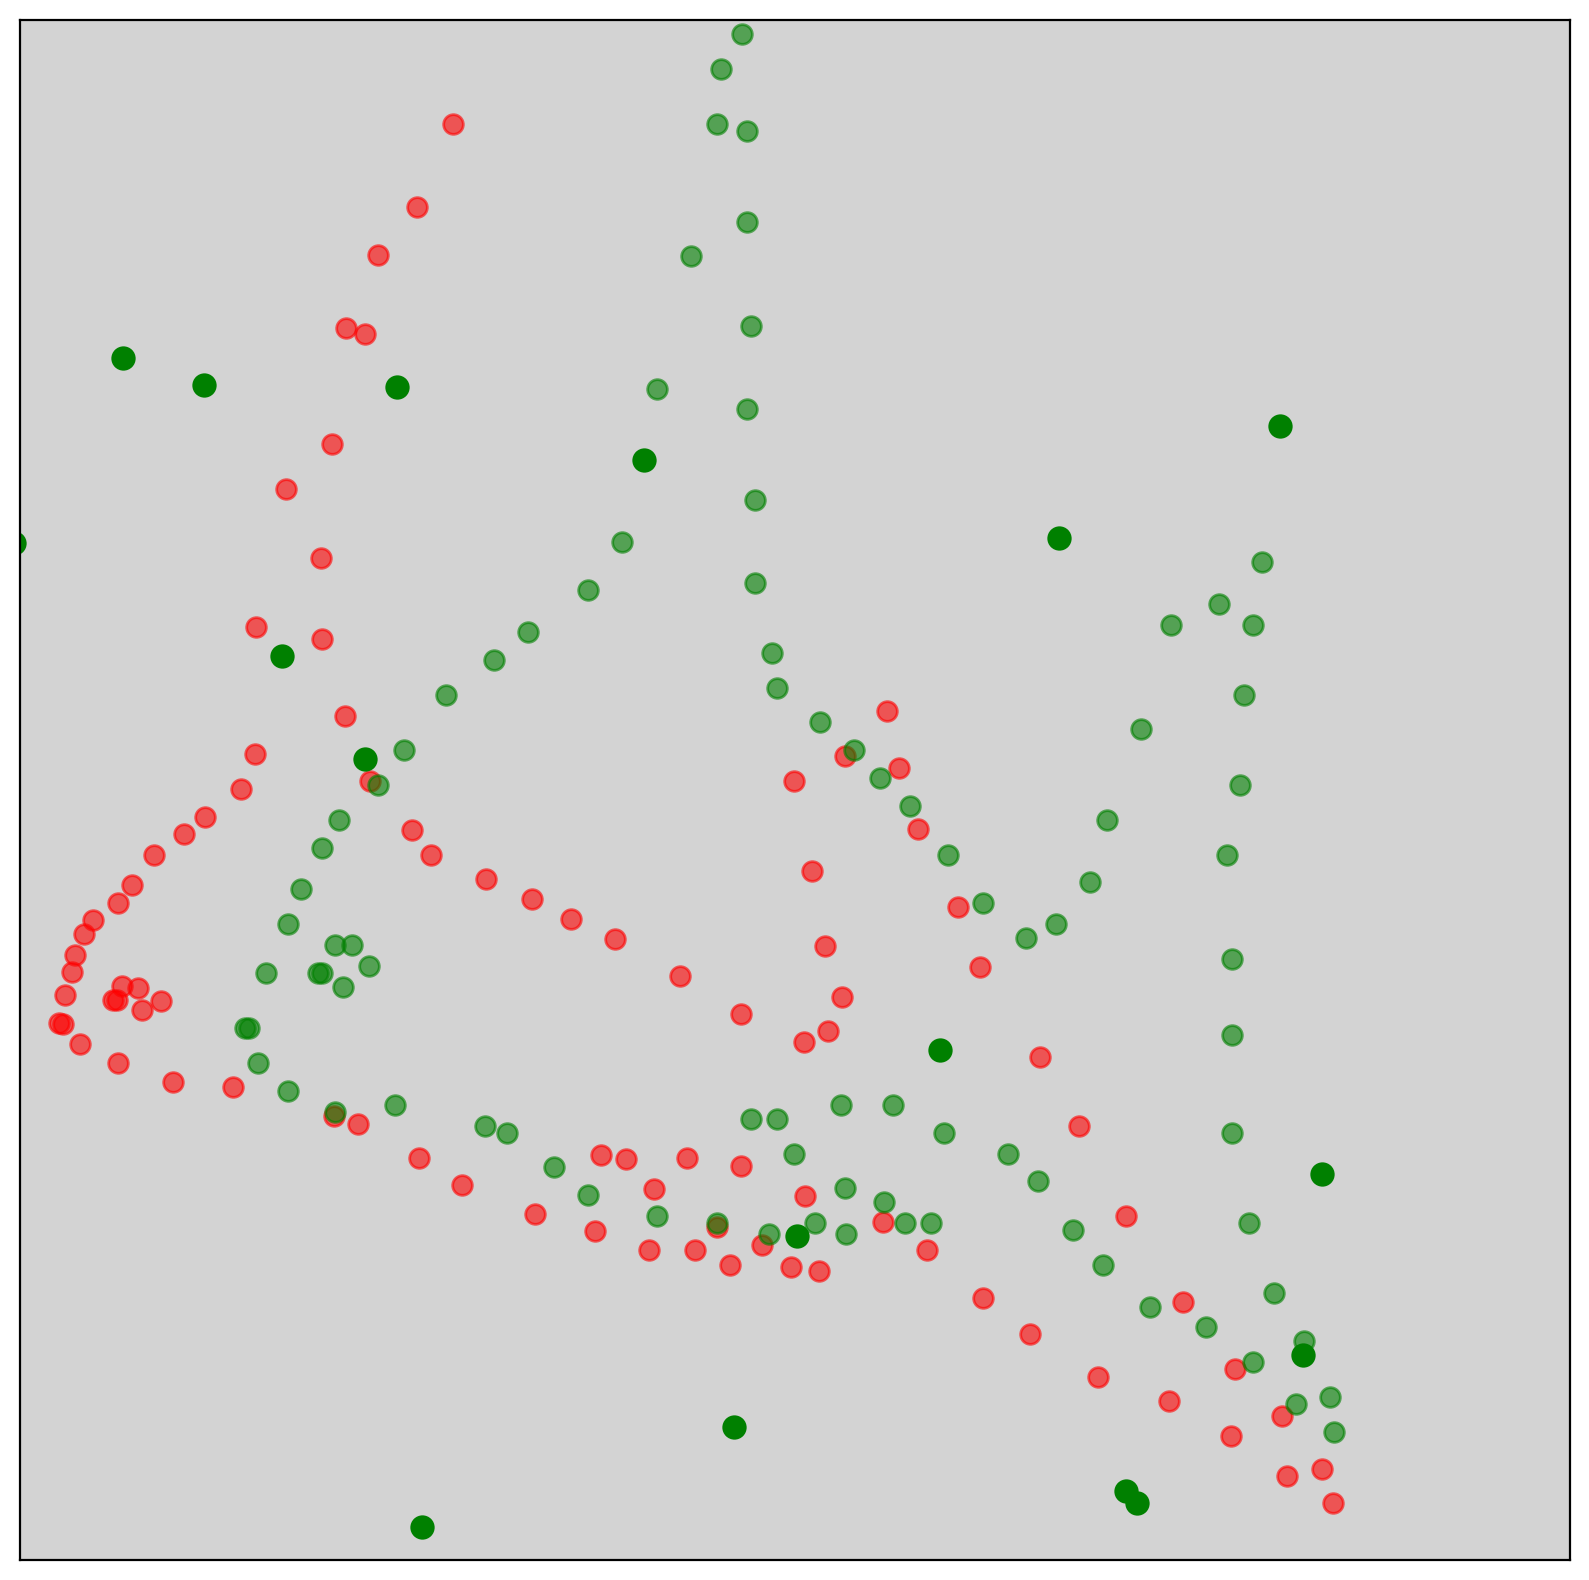

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
method is CPD
CPD
results/2D_fish_0.00/
(91, 2)
(91, 2)
record_idx is [ 0  5 10 15 20 26 31 36 41 46 52 57 62 67 72 78 83 88 93 99]
time is  1.292367935180664
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
CPD
results/2D_fish_0.10/
(91, 2)
(100, 2)
record_idx is [ 0  5 10 15 20 26 31 36 41 46 52 57 62 67 72 78 83 88 93 99]
time is  0.10607552528381348
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
CPD
results/2D_fish_0.20/
(91, 2)
(109, 2)
record_idx is [ 0  5 10 15 20 26 31 36 41 46 52 57 62 67 72 78 83 88 93 99]
time is  0.1098167896270752
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
CPD
results/2D_fish_0.30/
(91, 2)
(118, 2)
record_idx is [ 0  5 10 15 20 26 31 36 41 46 52 57 62 67 72 78 83 88 93 99]
time is  0.11110377311706543
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
method is OT-RBF
OT-RBF

/home/baly/projects/sopt_shape/lib/lib_shape.py:398: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  S=torch.sum(torch.abs(Sigma.T))/torch.trace(X_center.T.mm(X_center))


record_idx is [ 0 11 22 33 44 55 66 77 88 99]
time is  4.447665452957153
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
OT-RBF
results/2D_fish_0.10/
(91, 2)
(100, 2)
kernel is gaussian
corr is ot
record_idx is [ 0 11 22 33 44 55 66 77 88 99]
time is  0.7582683563232422
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
OT-RBF
results/2D_fish_0.20/
(91, 2)
(109, 2)
kernel is gaussian
corr is ot
record_idx is [ 0 11 22 33 44 55 66 77 88 99]
time is  0.810213565826416
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
OT-RBF
results/2D_fish_0.30/
(91, 2)
(118, 2)
kernel is gaussian
corr is ot
record_idx is [ 0 11 22 33 44 55 66 77 88 99]
time is  0.7787885665893555
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
method is OT-TPS
OT-TPS
results/2D_fish_0.00/
(91, 2)
(91, 2)
kernel is tps
corr is ot
record_idx is [ 0 11 22 33 44 55 66 77 88 99]
time is  1.928924322128296
<<<<<<<<<<<<<<<<<<

In [2]:
label='2D_fish'
method_list=[
     'init',
'CPD',
'OT-RBF',
'OT-TPS', 
'SOT-RBF',
'SOT-TPS',
'TPS-RPM',
'TPS-RPM-new',
'OPT-RBF',
'OPT-TPS',
'SOPT-RBF',
'SOPT-TPS'
]
eta_list=[0,0.10,0.20,0.30]
for method in method_list:
    print('method is',method)
    for (eta_id,eta) in enumerate(eta_list):
        print(method)
        data=torch.load('data/%s.pt'%(label))
        save_path='results/%s_%0.2f/'%(label,eta)
        print(save_path)
        X0=data['X0']
        N0=X0.shape[0]
        X=data['X'+str(eta)].copy()[0:N0]
        Y=data['Y'+str(eta)].copy()
        print(X.shape)
        print(Y.shape)
        N1=X.shape[0]
        device='cuda:1'
        sigma2,eps=0.05,1.0
        Lambda=2*np.sum((X[0:N0].mean(0)-Y[0:N0].mean(0))**2)
    
        corr_ot={'name':'ot'}
        corr_opt={'name':'opt','N0':N0}
        corr_sot={'name':'sot','n_proj':100}
        corr_sopt={'name':'sopt','n_proj':100,'N0':N0}
        corr_sinkhorn={'name':'sinkhorn','reg':0.1*Y.var(),'Lambda':Lambda}
        corr_sinkhorn_pr={'name':'sinkhorn_pr','reg':0.01*Y.var(),'N0':N0}
        kernel_gaussian={'name':'gaussian','C':X.copy(),'param':sigma2,'eps':1.0}
        kernel_tps={'name':'tps','C':X.copy(),'param':2,'eps':1.0}

        if method == 'init':
            make_plot_fish(X,Y,N0,'%s/pic/%s.jpg'%(save_path,method))
        elif method == 'CPD':
            start_time=time.time()
            model,Yhat_list,record_idx=CPD(X, Y , n_iter_max=100, n_iter_rigid=20)
            end_time=time.time()
        else:
            # choose corr parameters 
            if 'OT' in method and 'SOT' not in method:
                corr=corr_ot
            elif 'SOT' in method:
                corr=corr_sot
            elif 'OPT' in method and 'SOPT' not in method:
                corr=corr_opt
            elif 'SOPT' in method:
                corr=corr_sopt
            elif 'RPM' in method and 'new' not in method:
                corr=corr_sinkhorn
            elif 'RPM-new' in method:
                corr=corr_sinkhorn_pr
            # load the kernel 
            if 'RBF' in method:
                kernel=kernel_gaussian
            elif 'TPS' in method:
                kernel=kernel_tps 
            print('kernel is',kernel['name'])
            print('corr is',corr['name'])
            

            start_time=time.time()
            model,Yhat_list,record_idx=ot_registration(X,Y,N0,kernel=kernel,
                                                              corr=corr,n_iter_max=100,n_iter_rigid=20,
                                                              threshold=0.2,record_idx=None,
                                                       device=device,verbose= False,
                                                      fix_mass=True)
            end_time=time.time()
        if method !='init':
            print('record_idx is',record_idx)
            torch.save((model,Yhat_list,record_idx,end_time-start_time),save_path+'%s.pt'%(method))
            print('time is ',end_time-start_time)
        print('<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')

results/2D_fish_0.00/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is CPD, record_idx is [ 0  5 10 15 20 26 31 36 41 46 52 57 62 67 72 78 83 88 93 99]


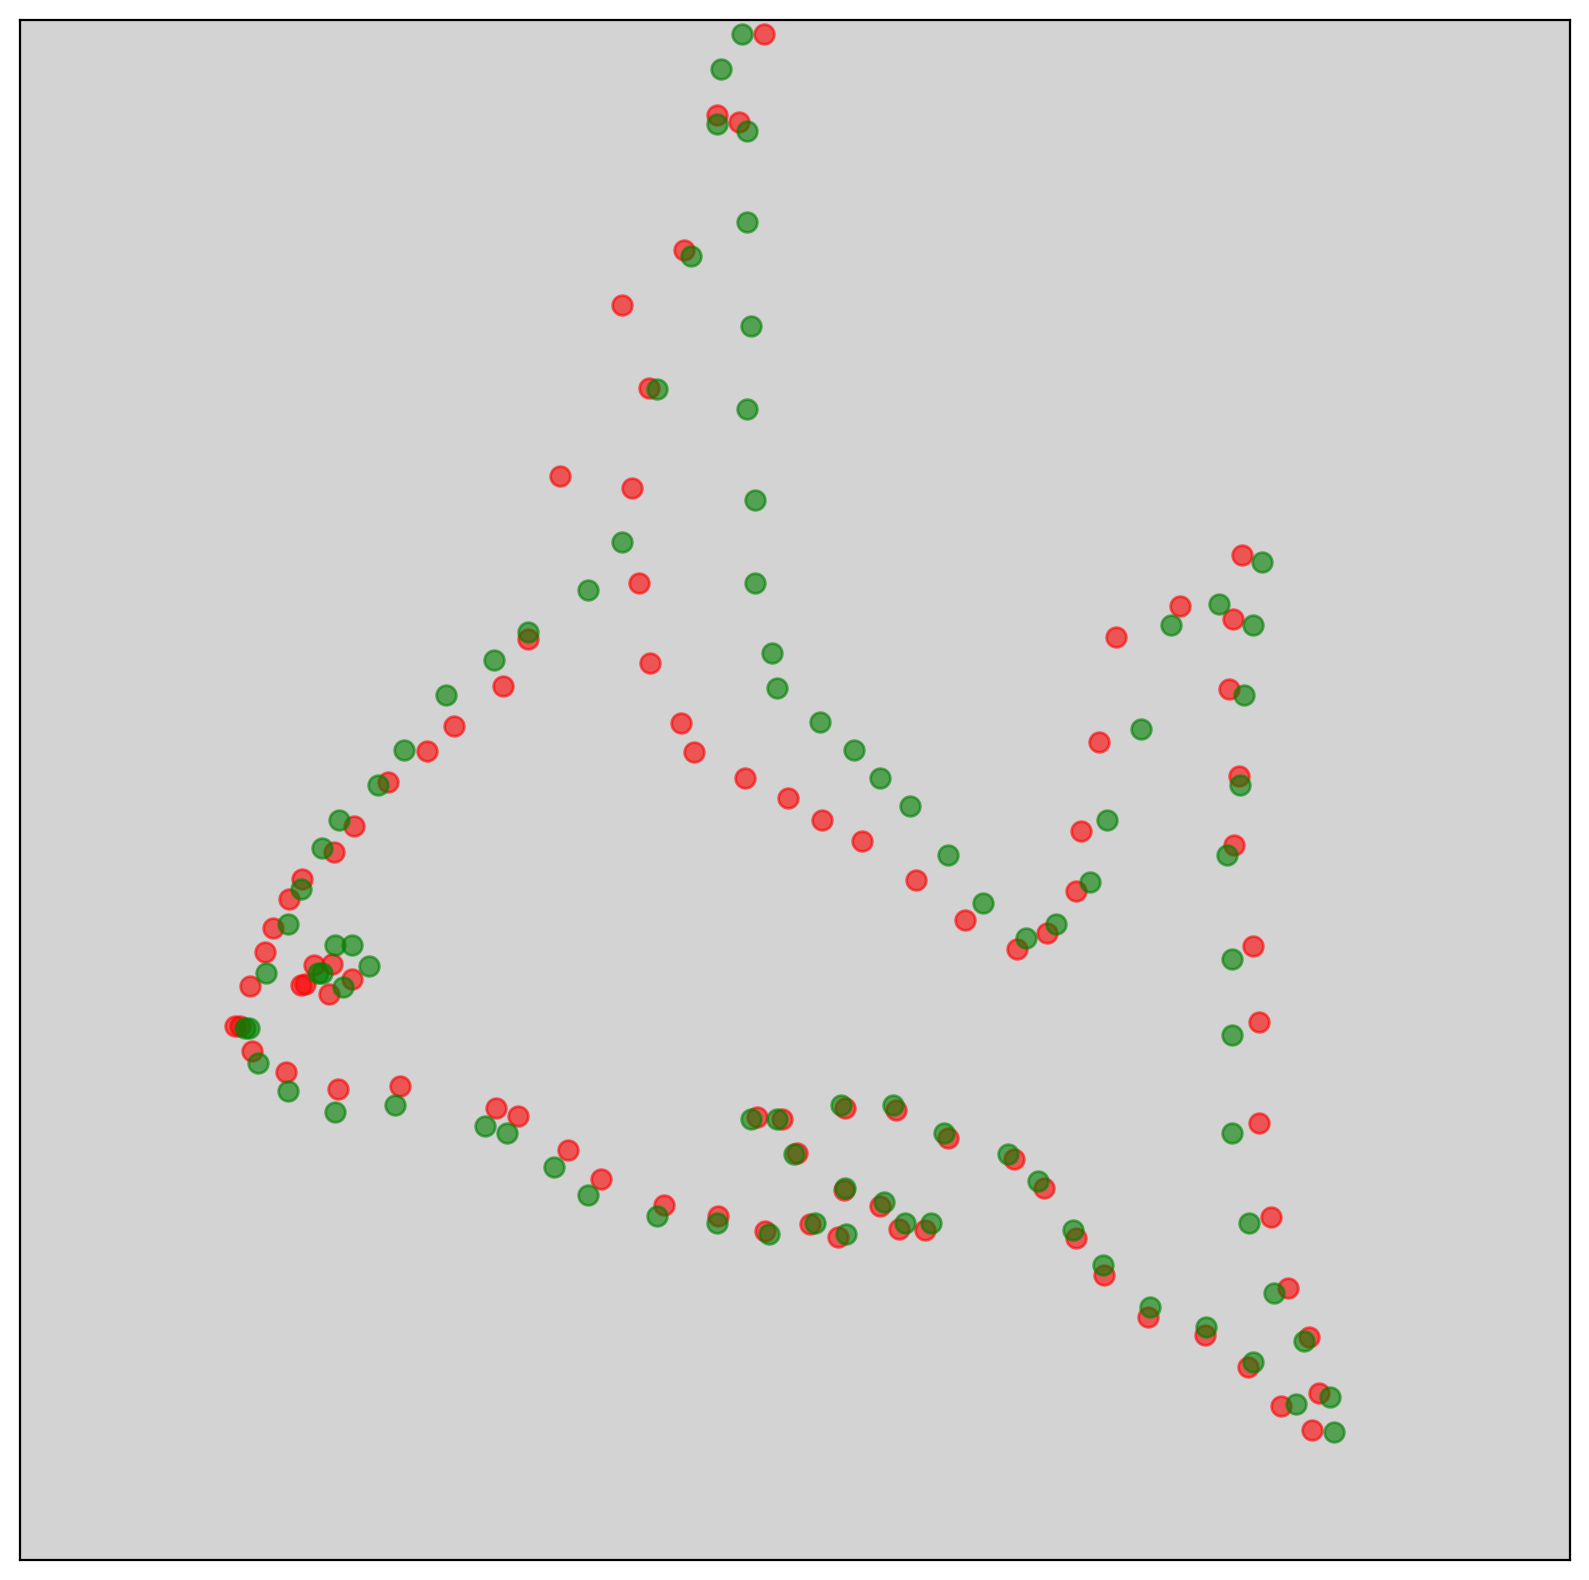

last error is 0.17120885291217183


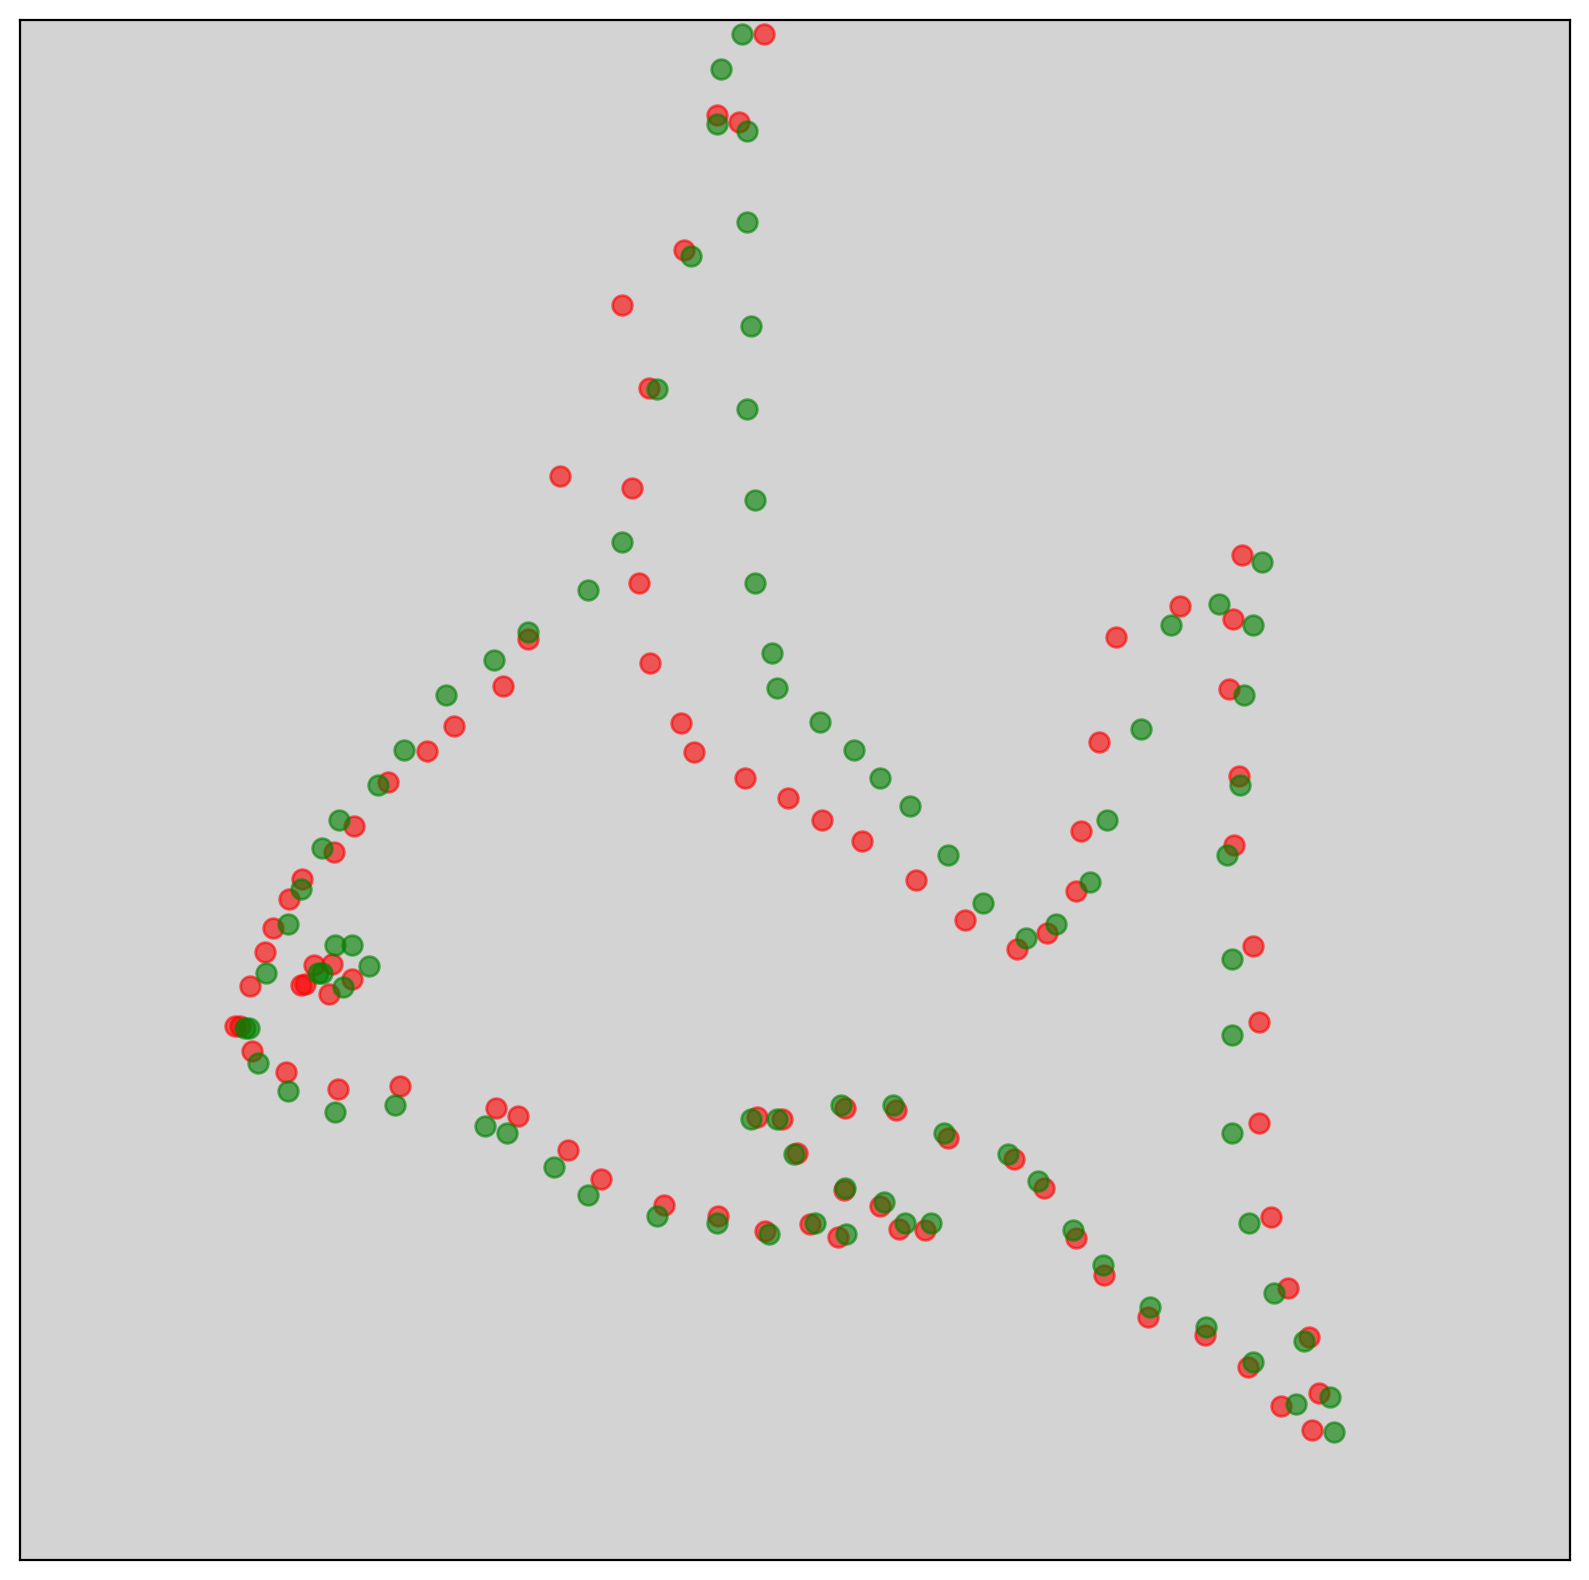

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.10/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is CPD, record_idx is [ 0  5 10 15 20 26 31 36 41 46 52 57 62 67 72 78 83 88 93 99]


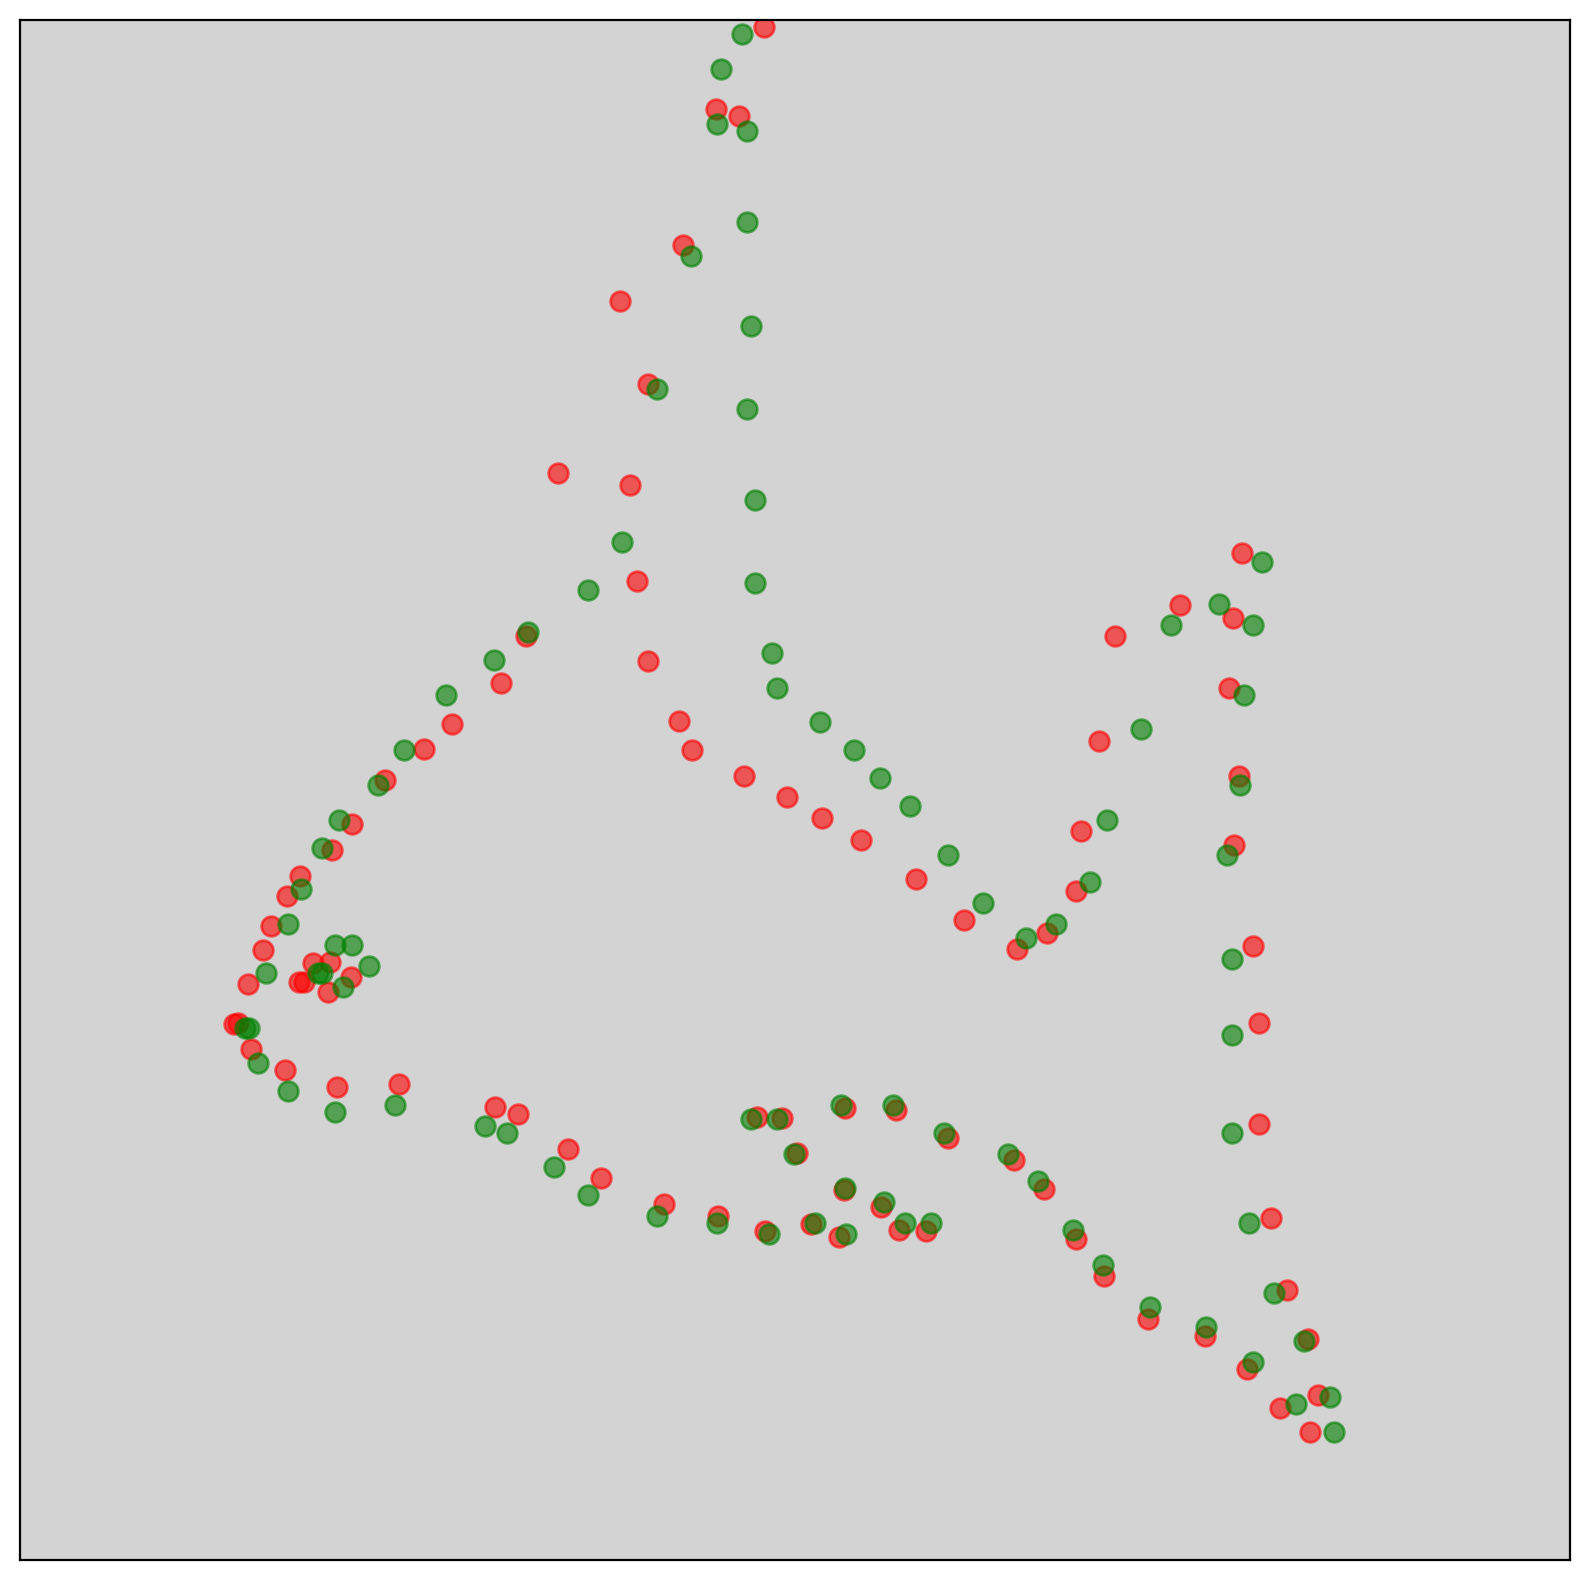

last error is 0.17150197973786815


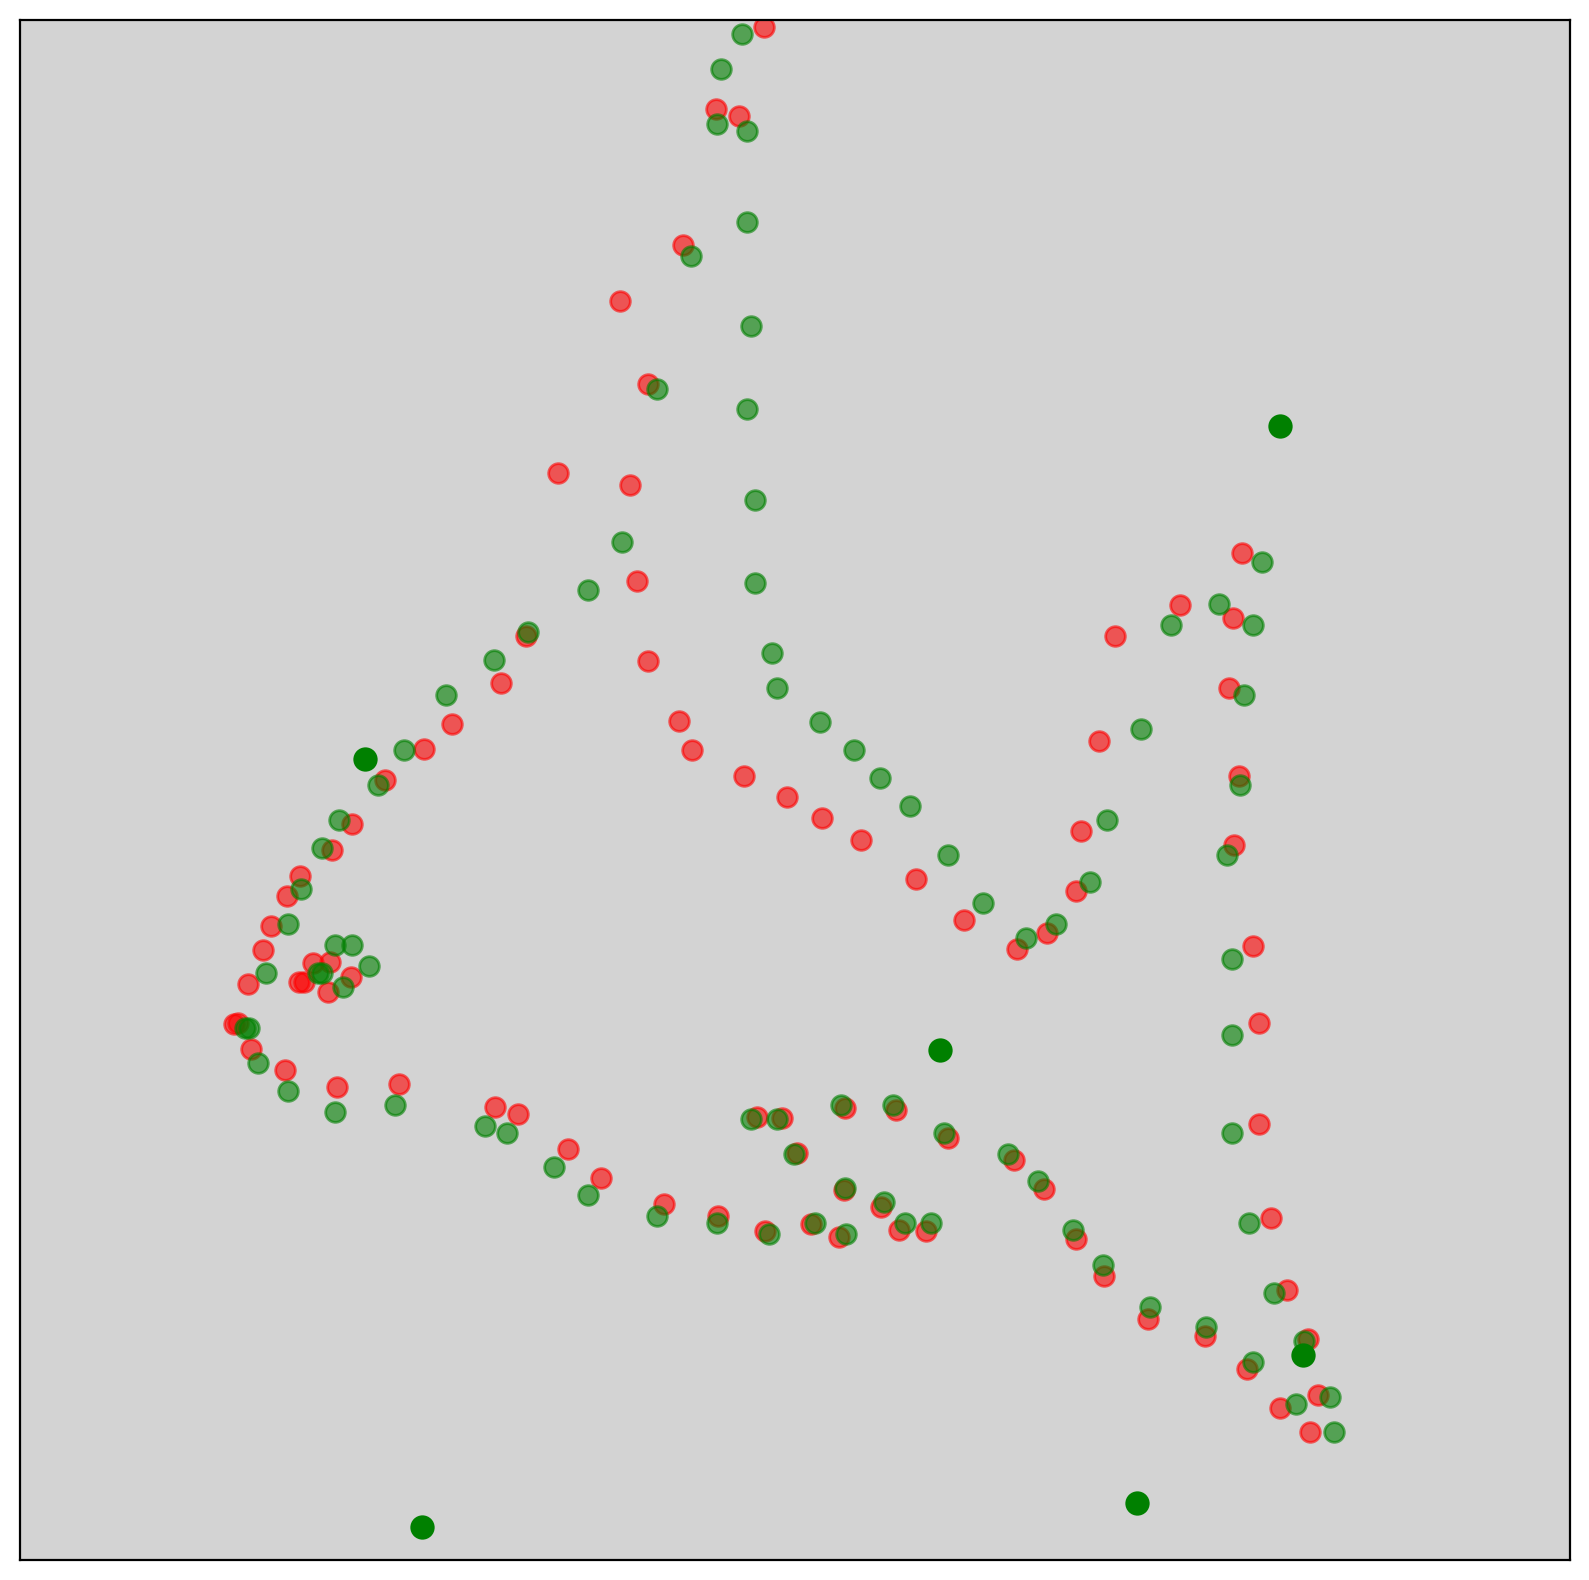

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.20/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is CPD, record_idx is [ 0  5 10 15 20 26 31 36 41 46 52 57 62 67 72 78 83 88 93 99]


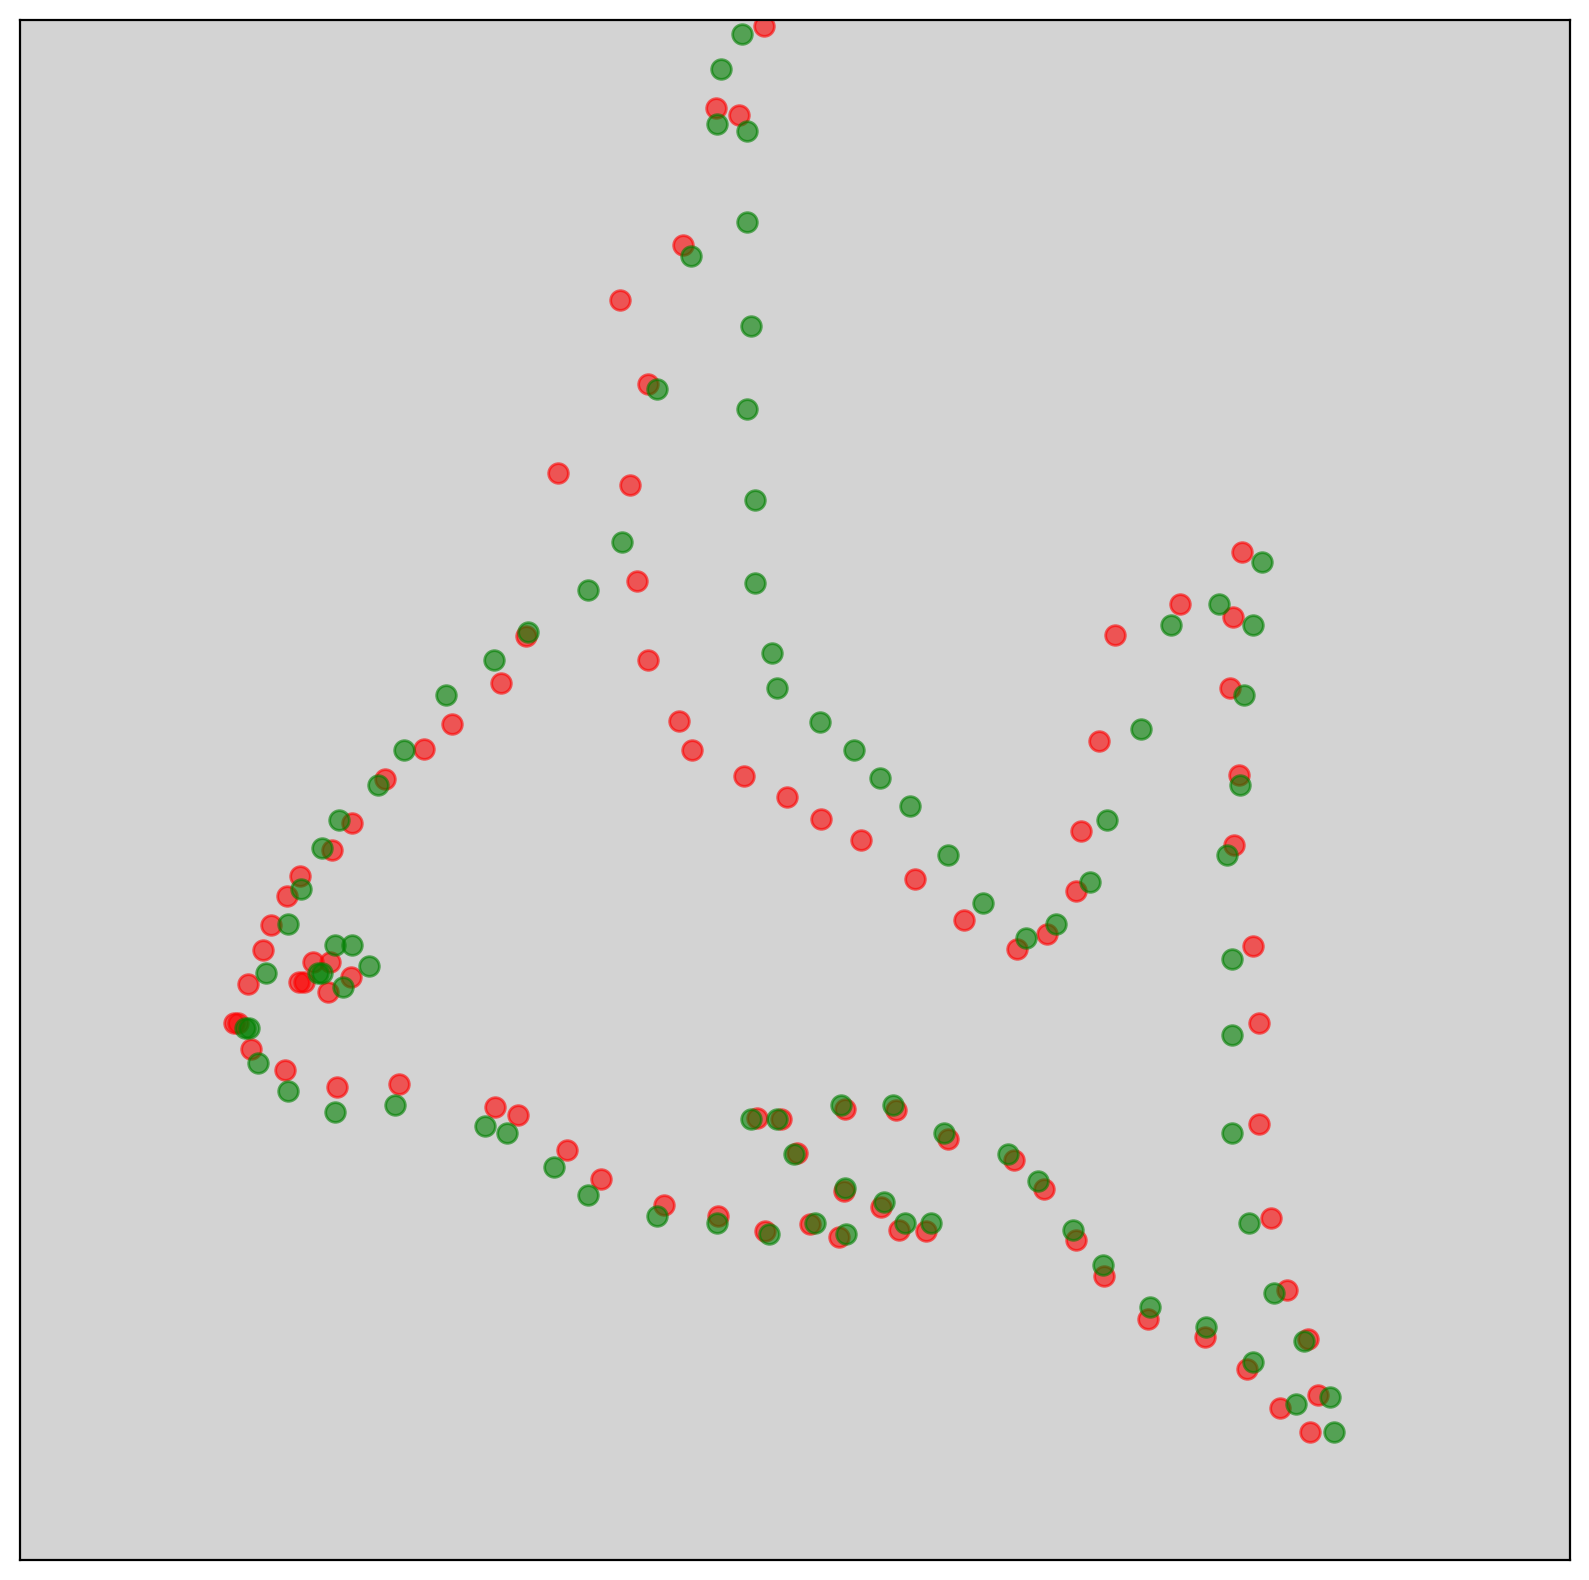

last error is 0.17156273938017427


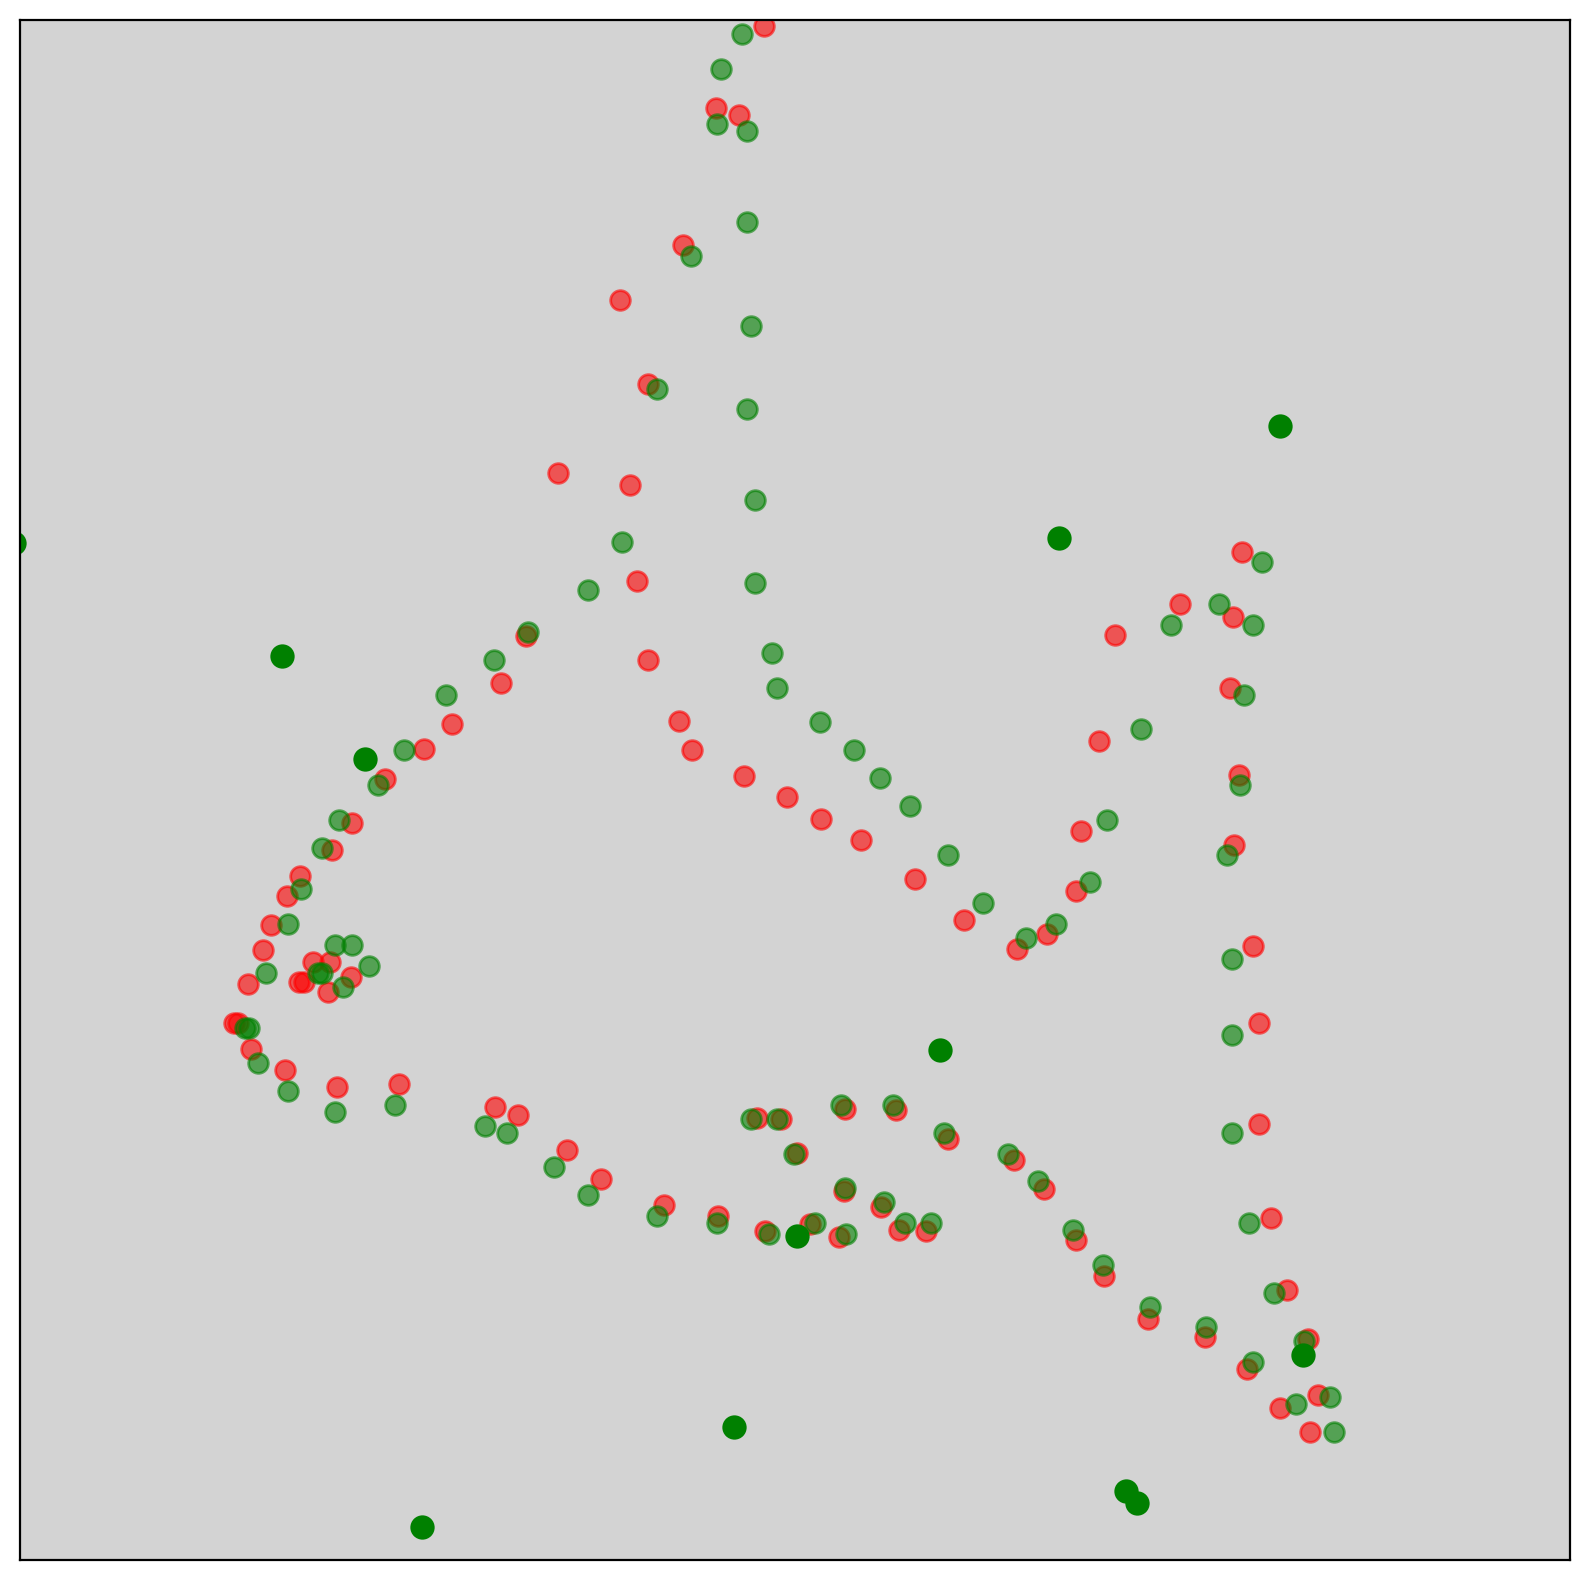

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.30/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is CPD, record_idx is [ 0  5 10 15 20 26 31 36 41 46 52 57 62 67 72 78 83 88 93 99]


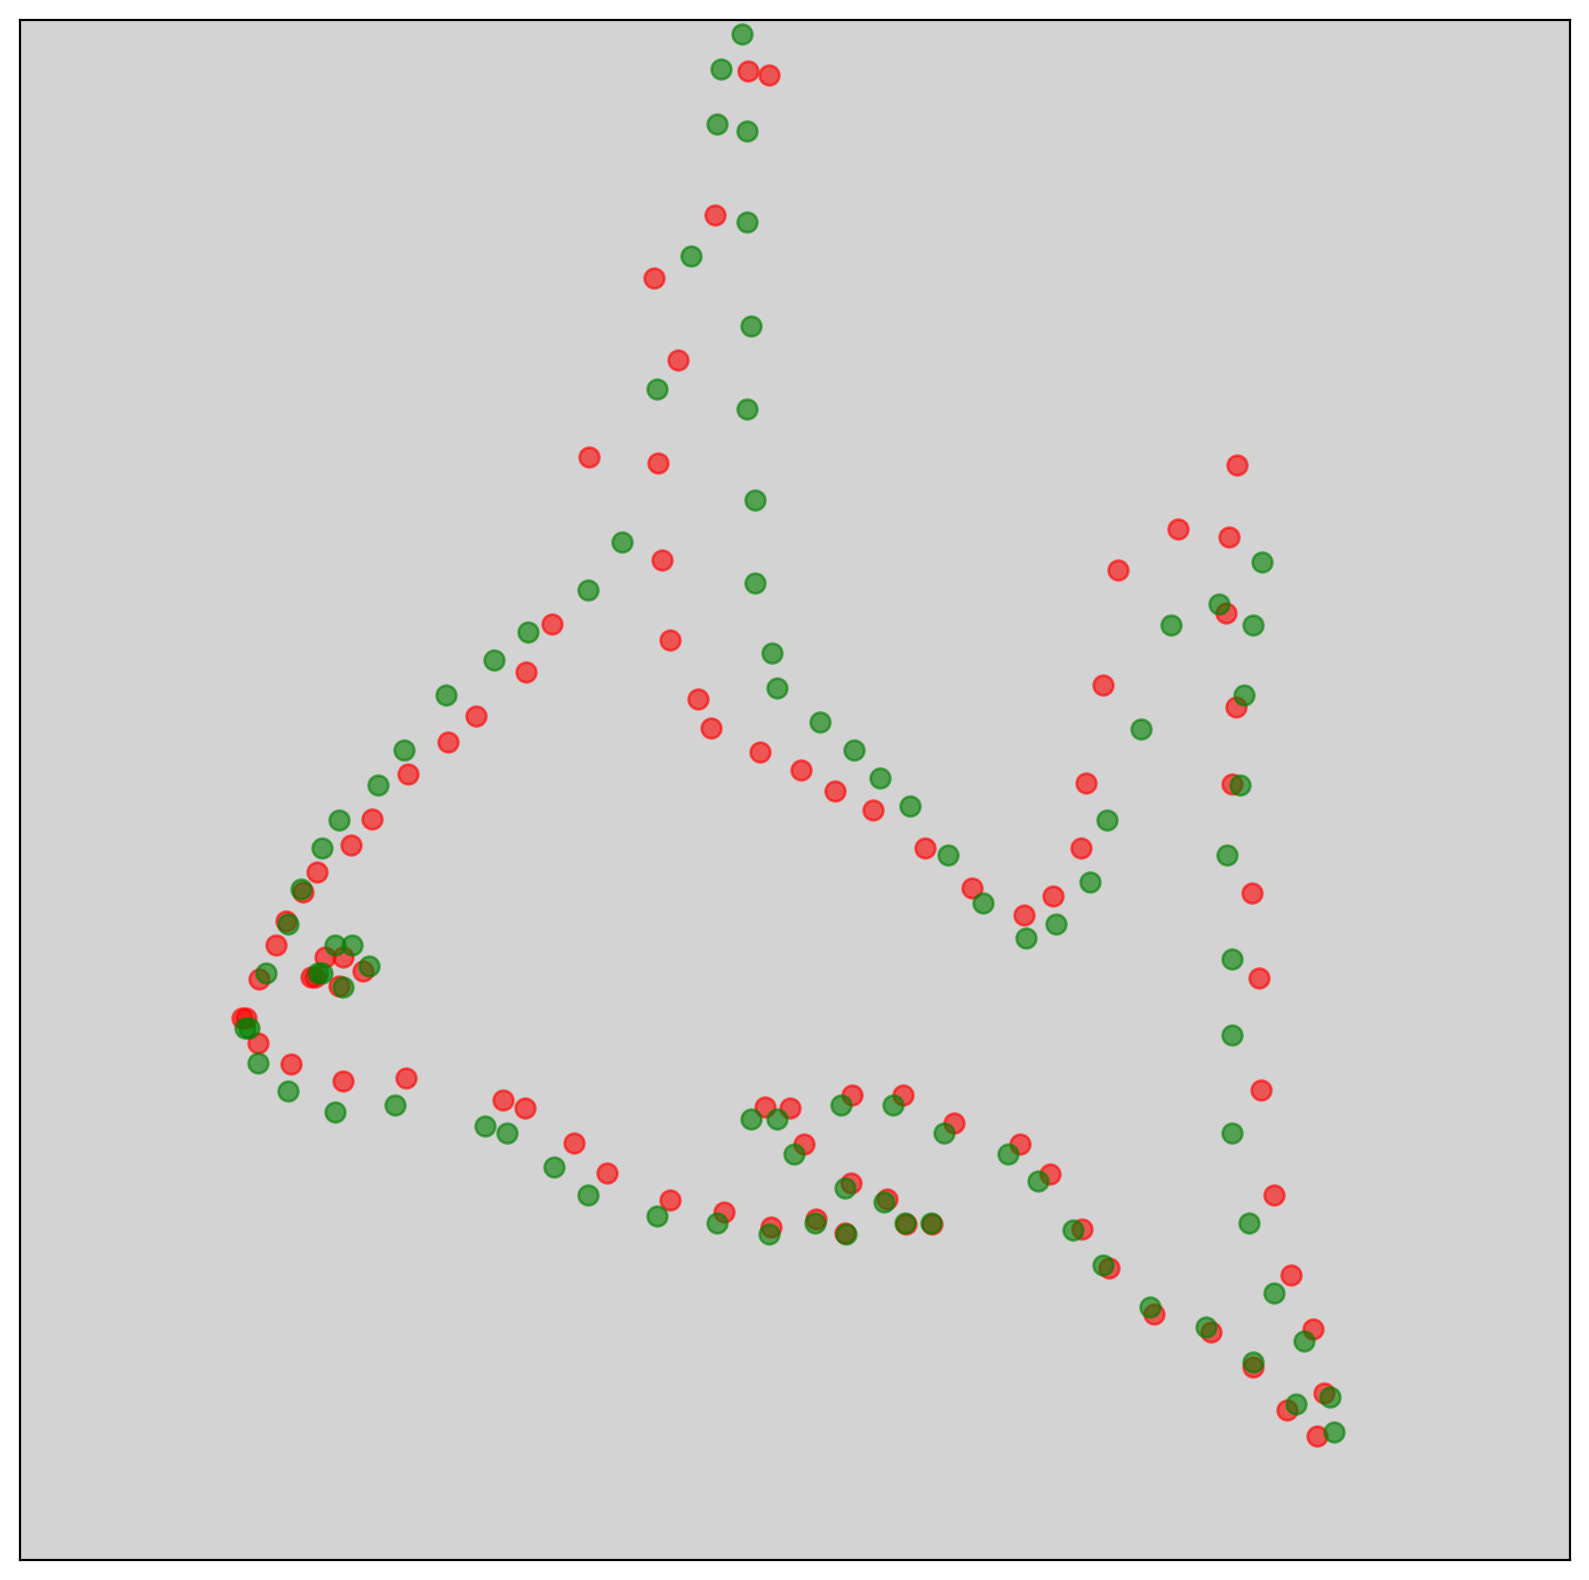

last error is 0.17837492473537794


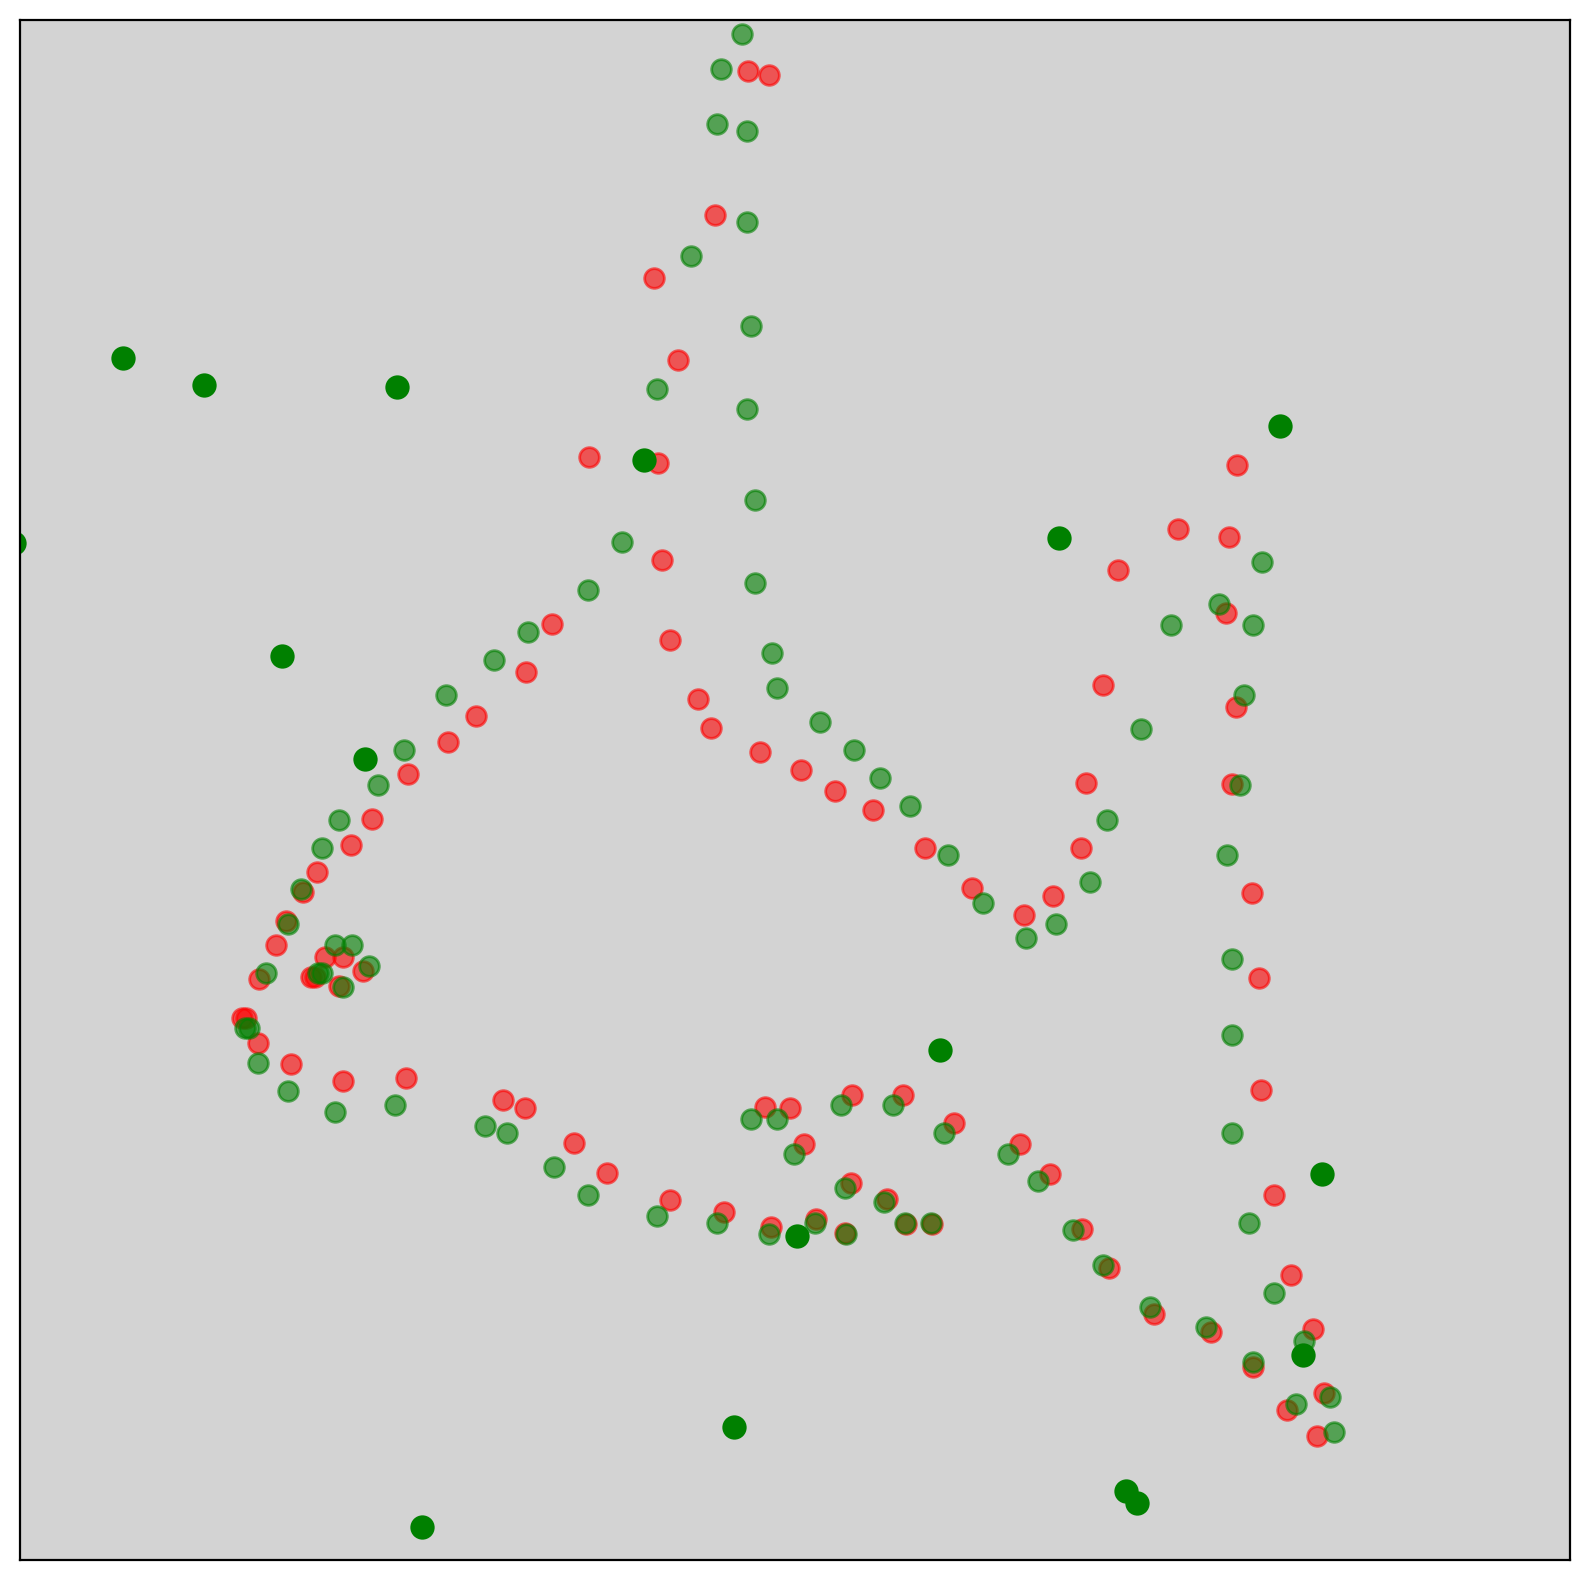

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.00/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is OT-RBF, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


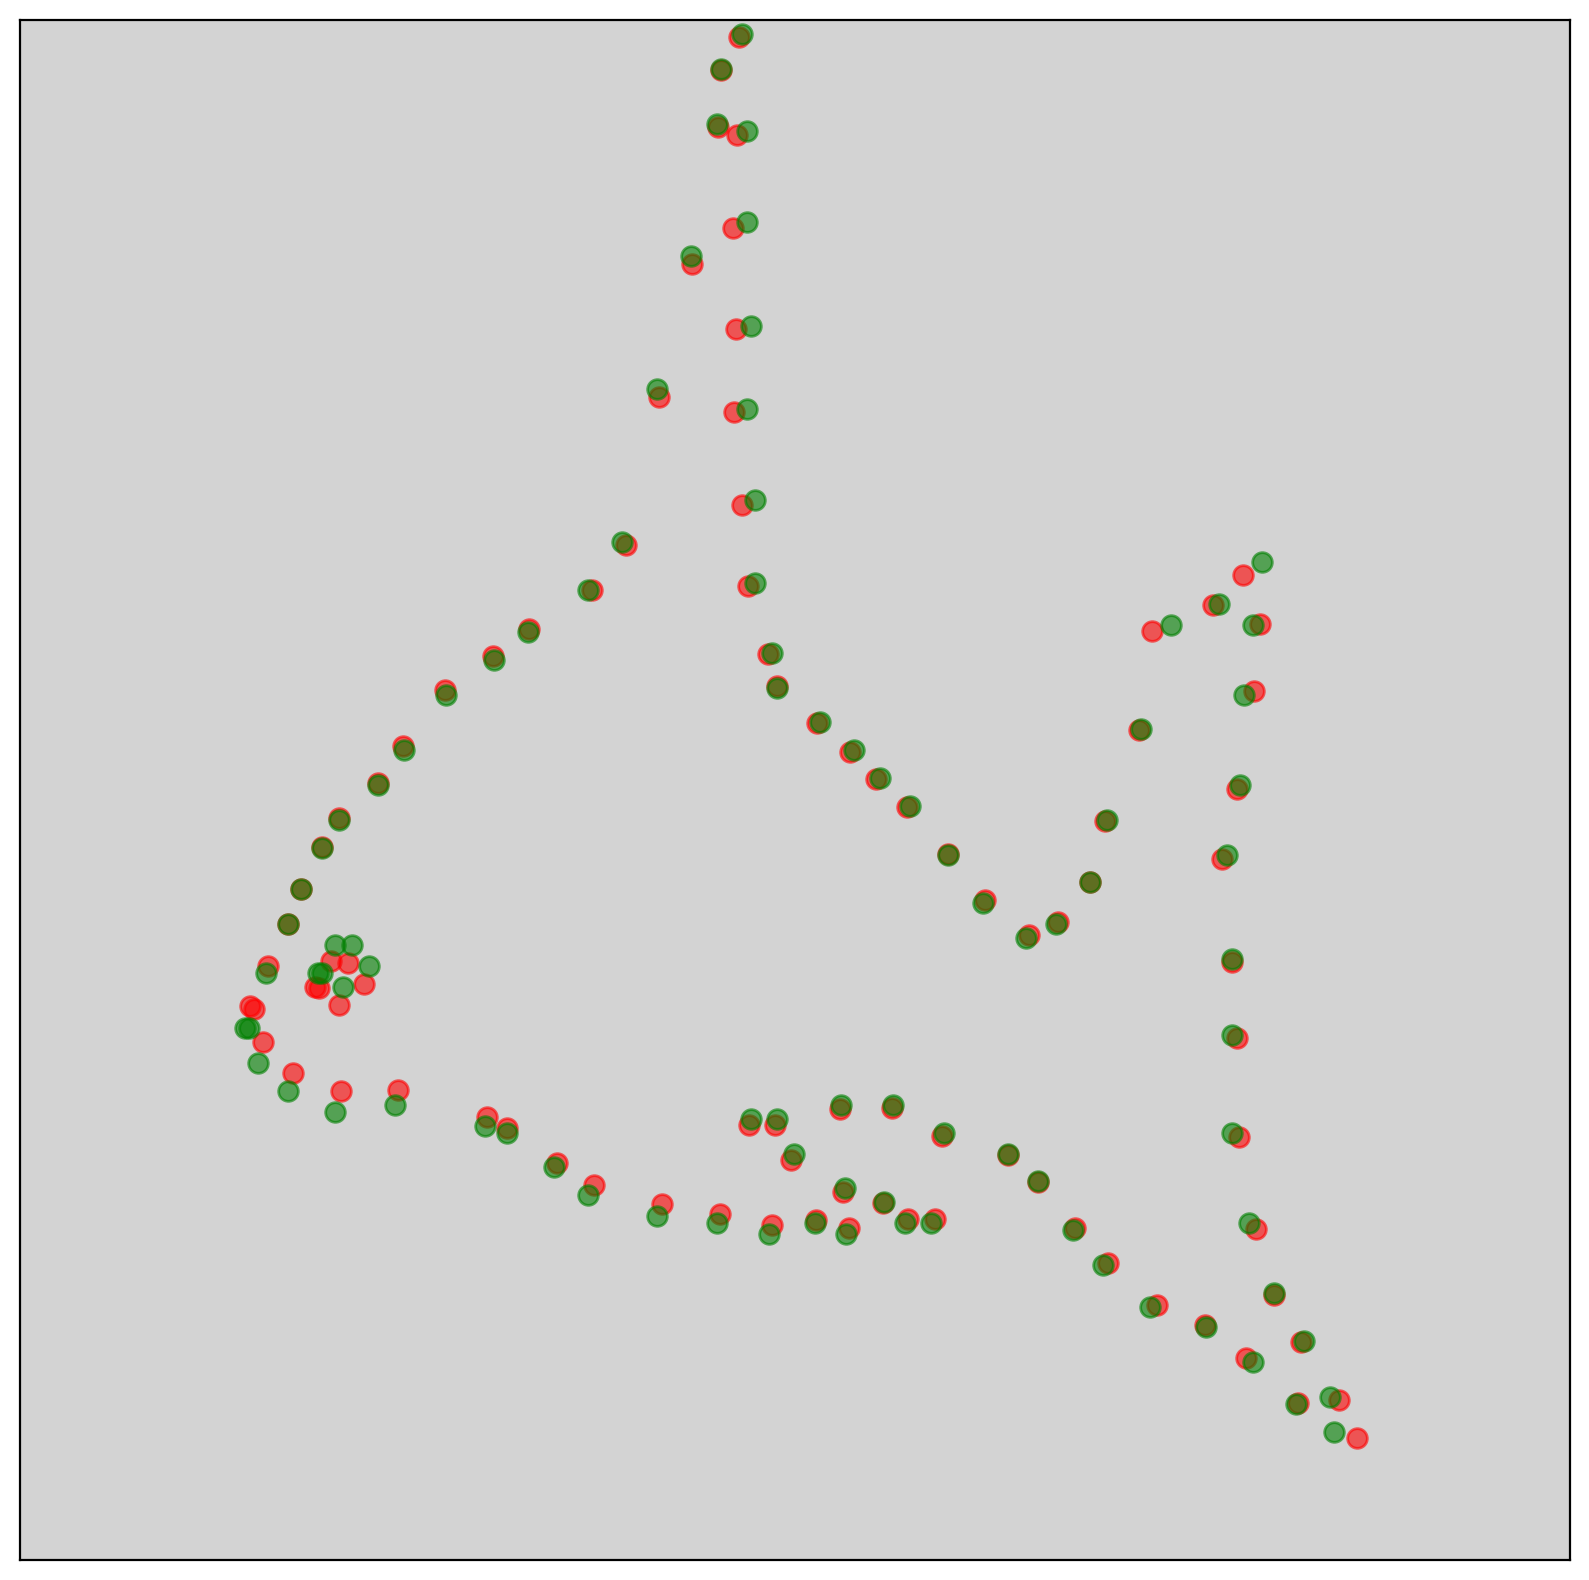

last error is 0.03217886882422501


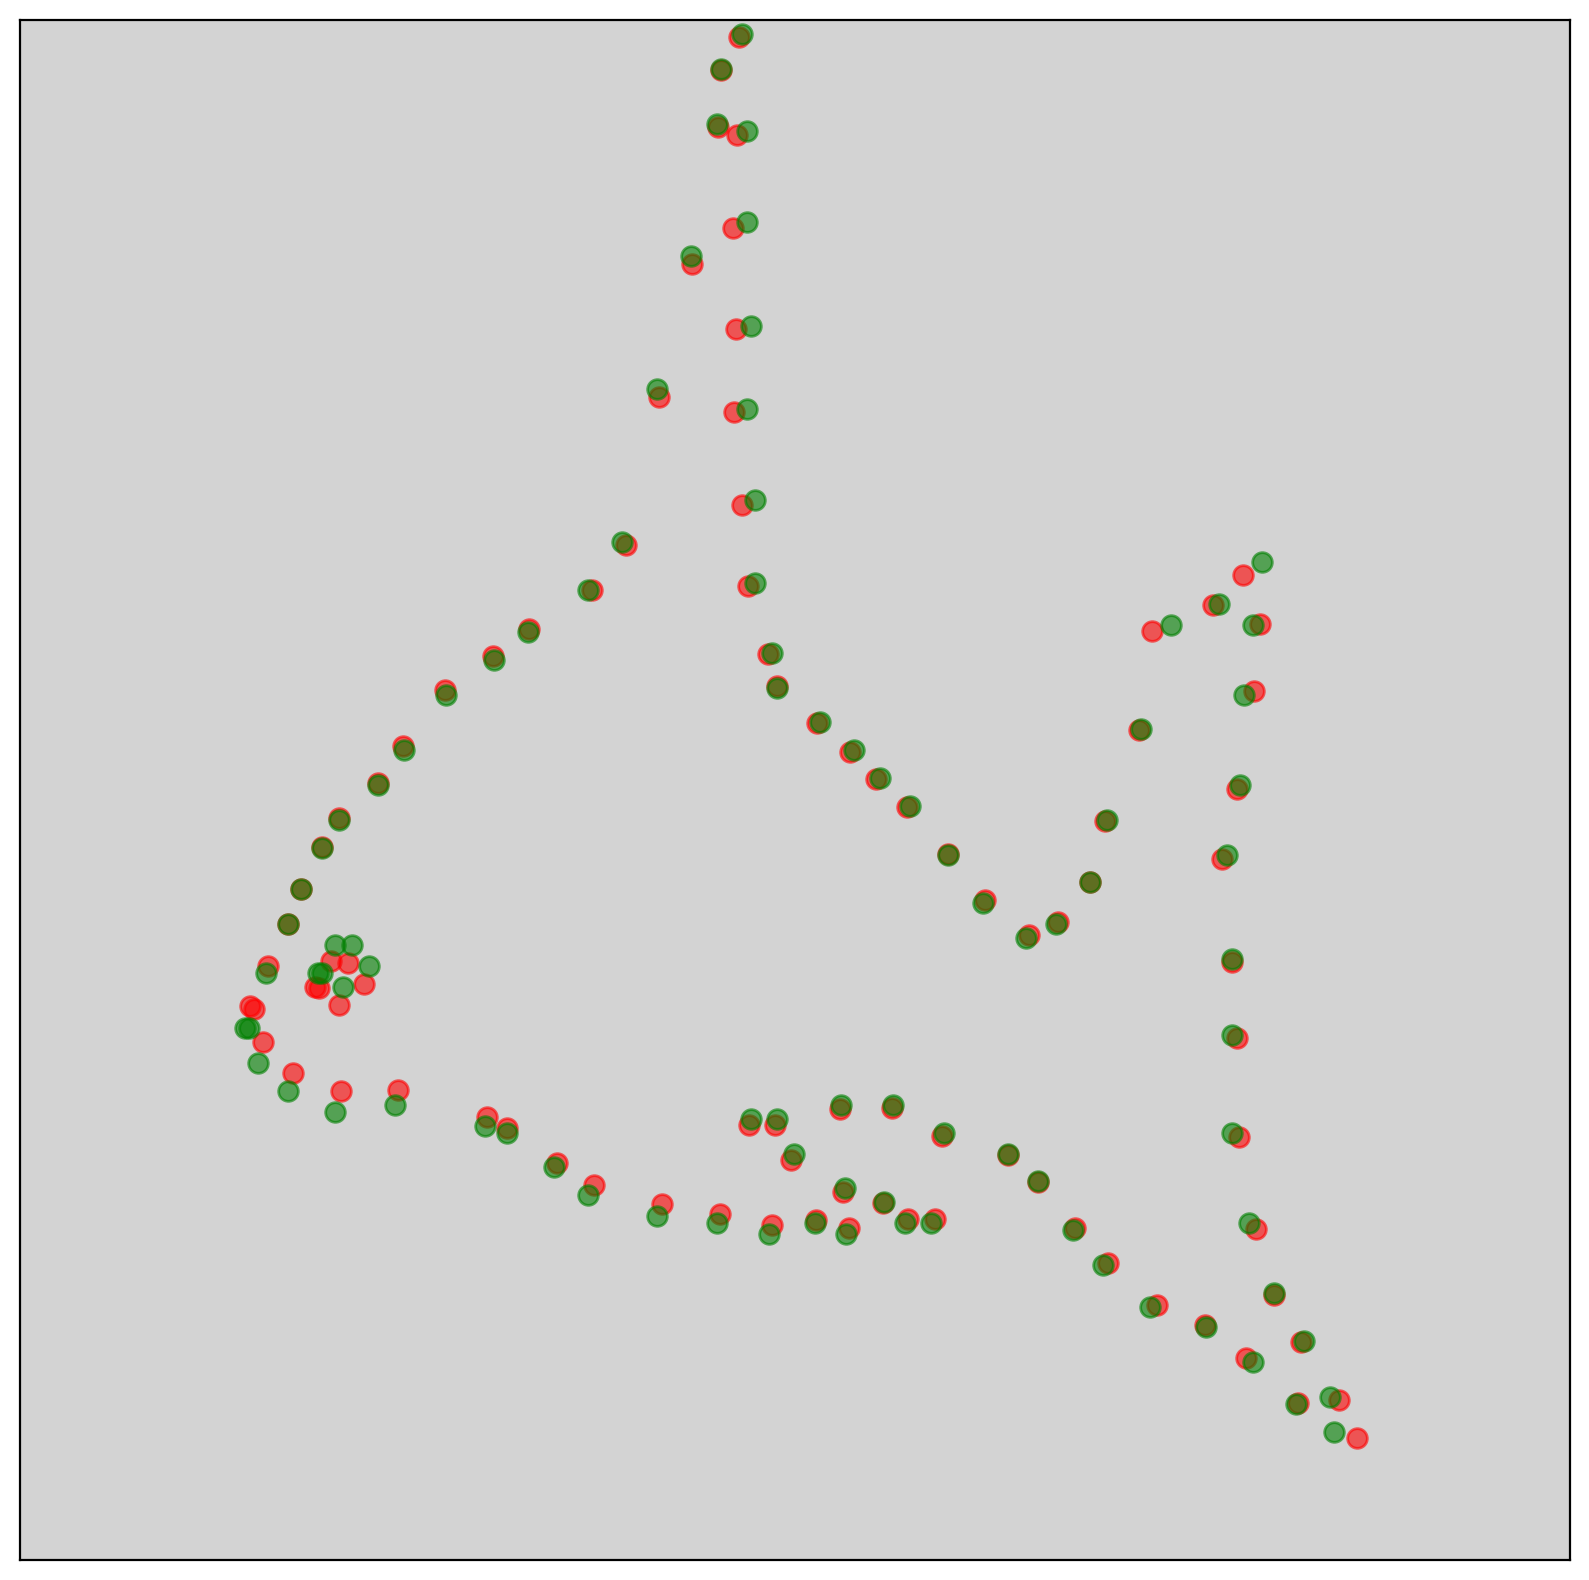

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.10/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is OT-RBF, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


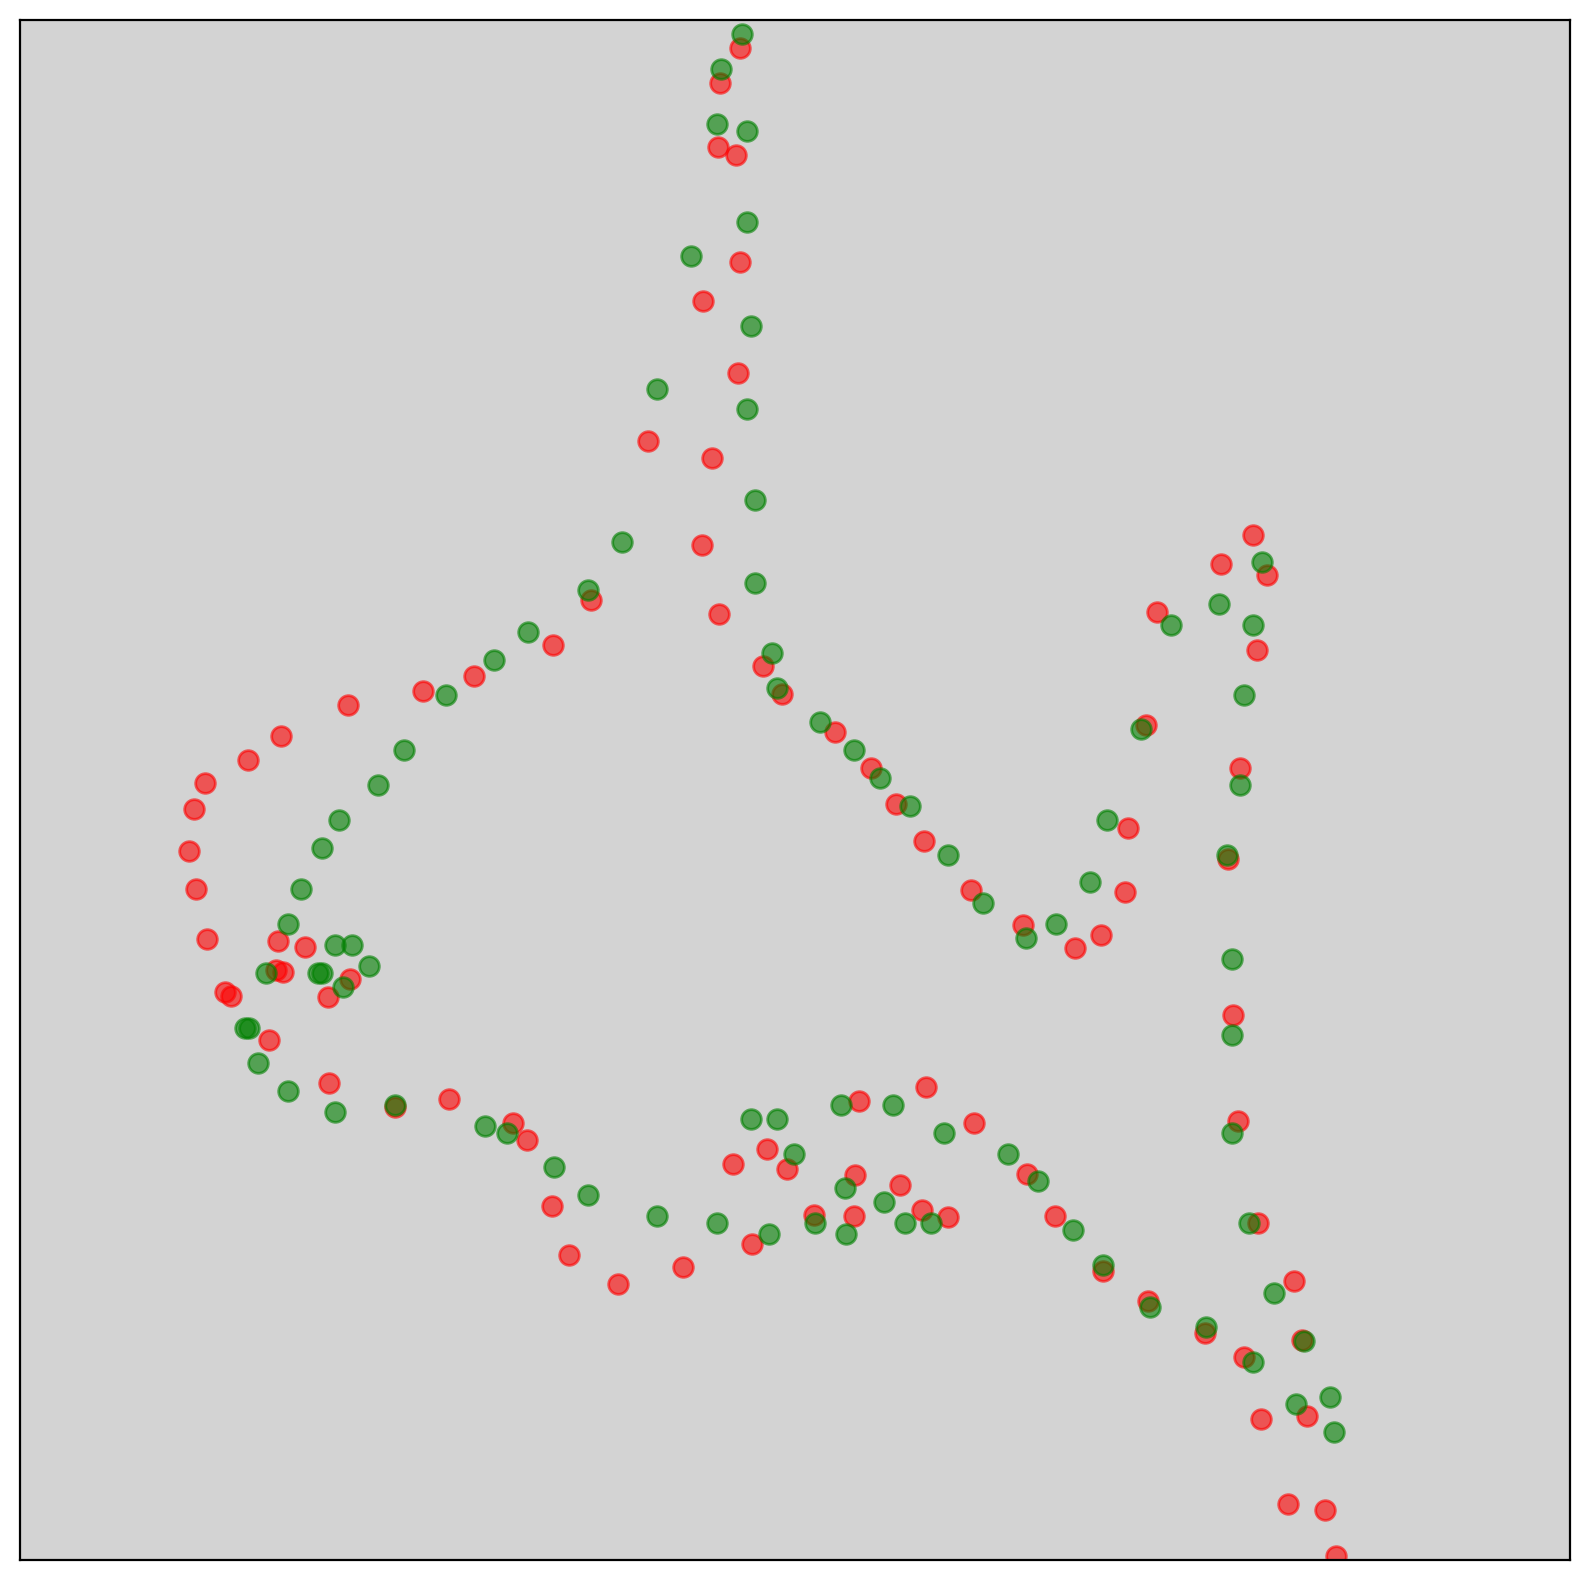

last error is 0.17282163743752277


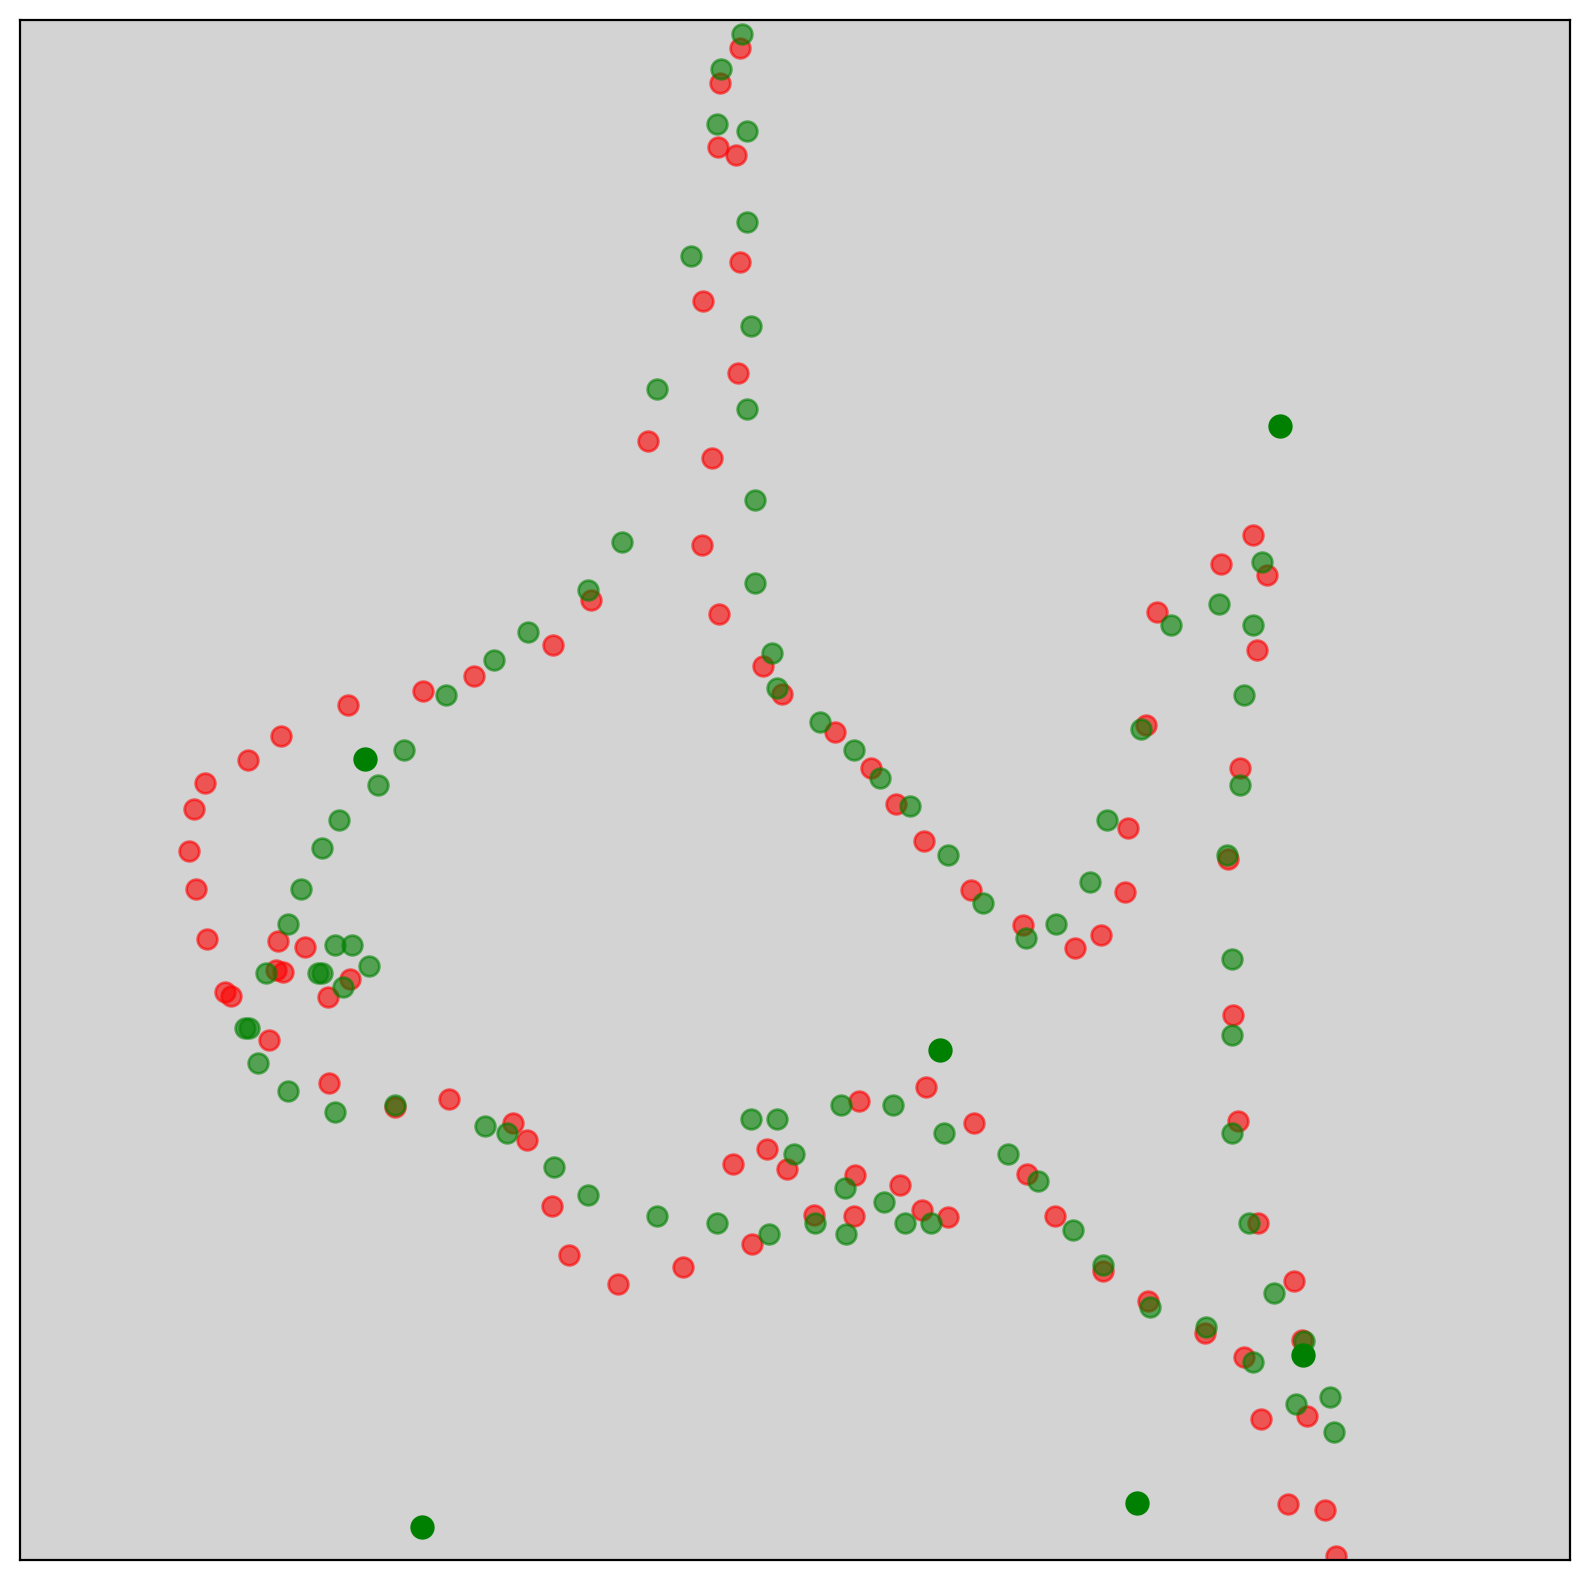

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.20/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is OT-RBF, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


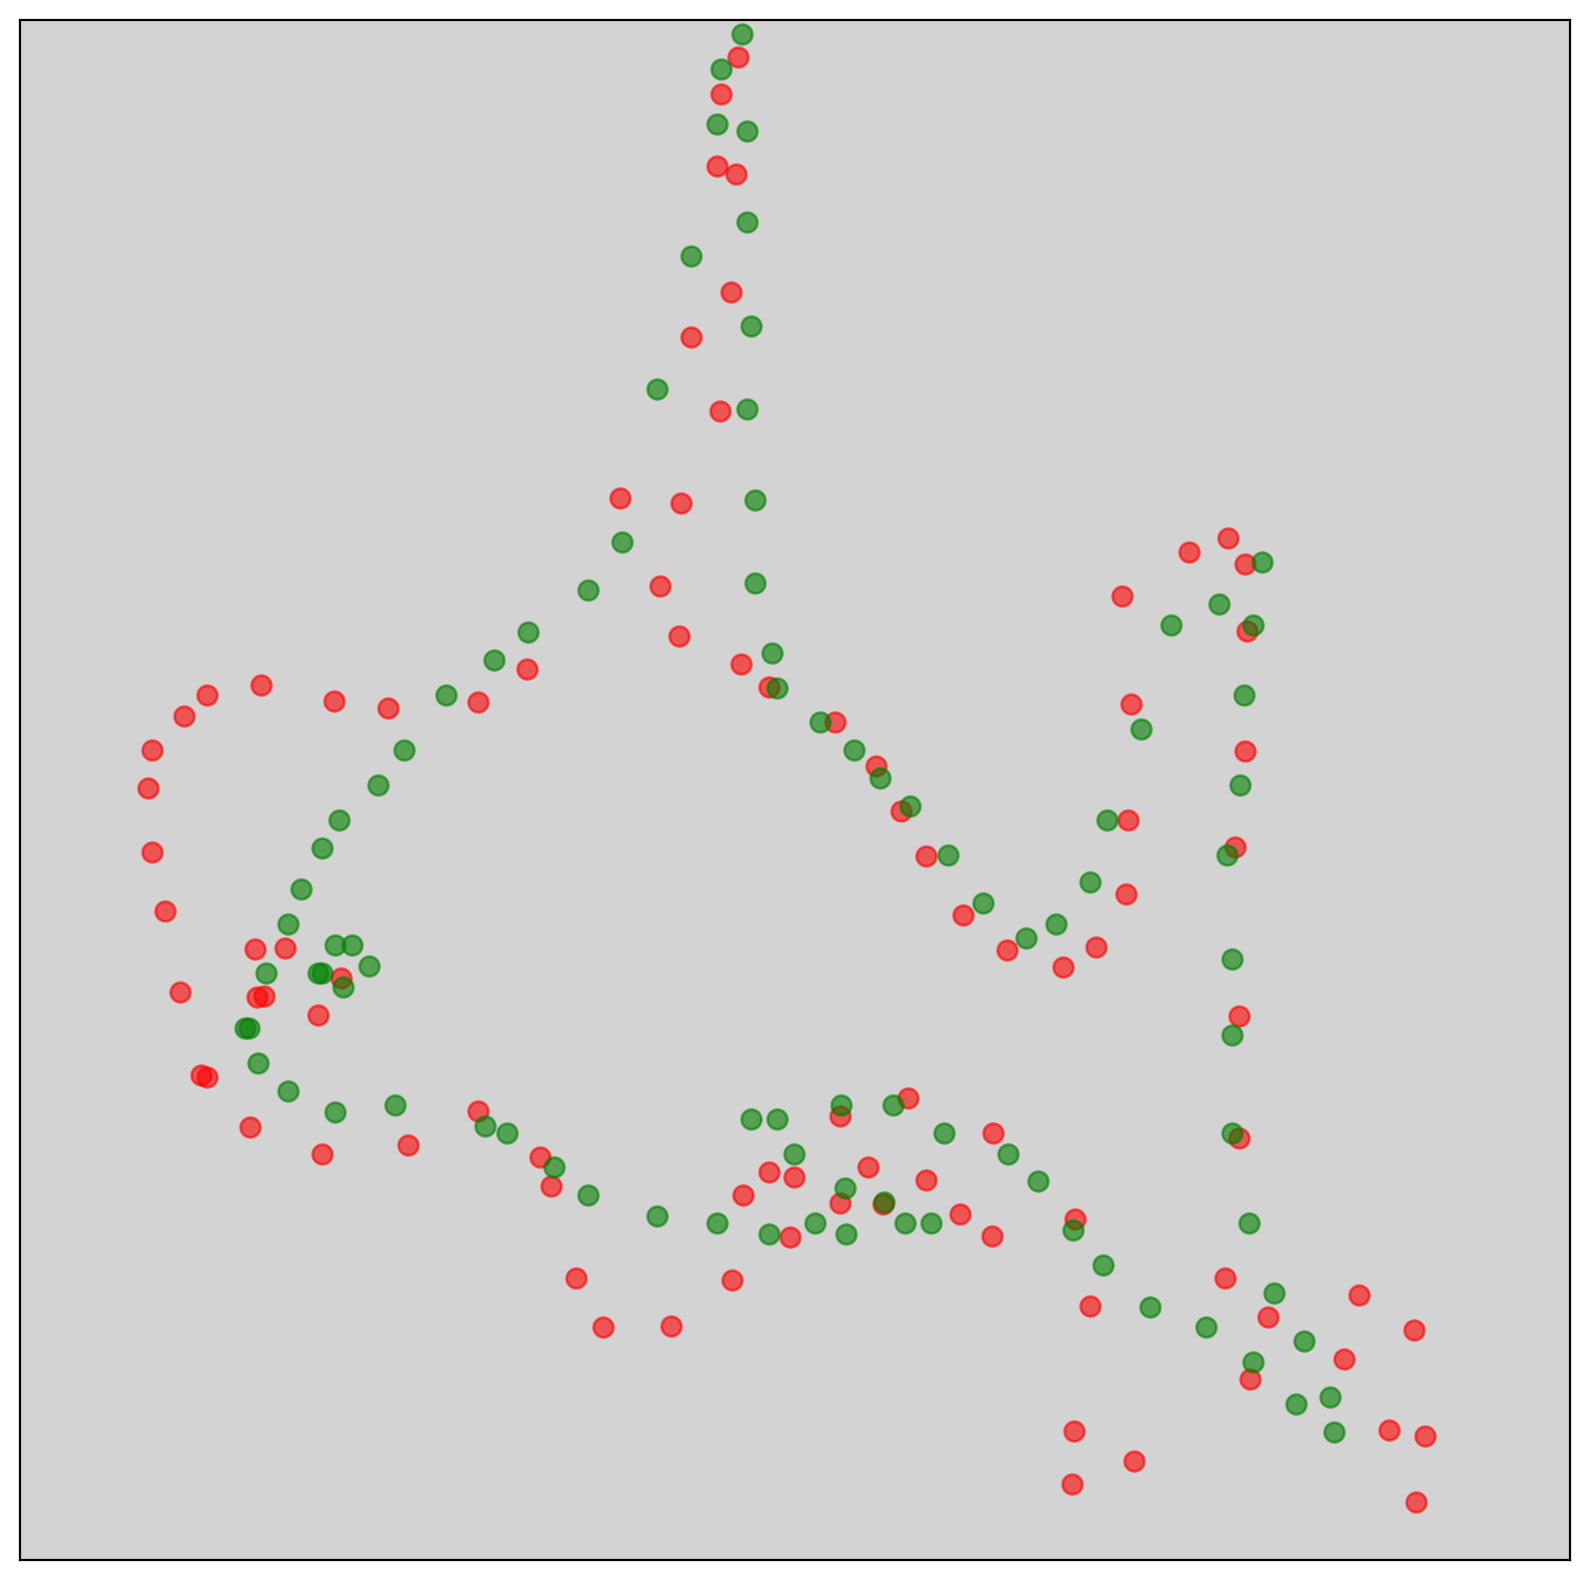

last error is 0.28534178009695843


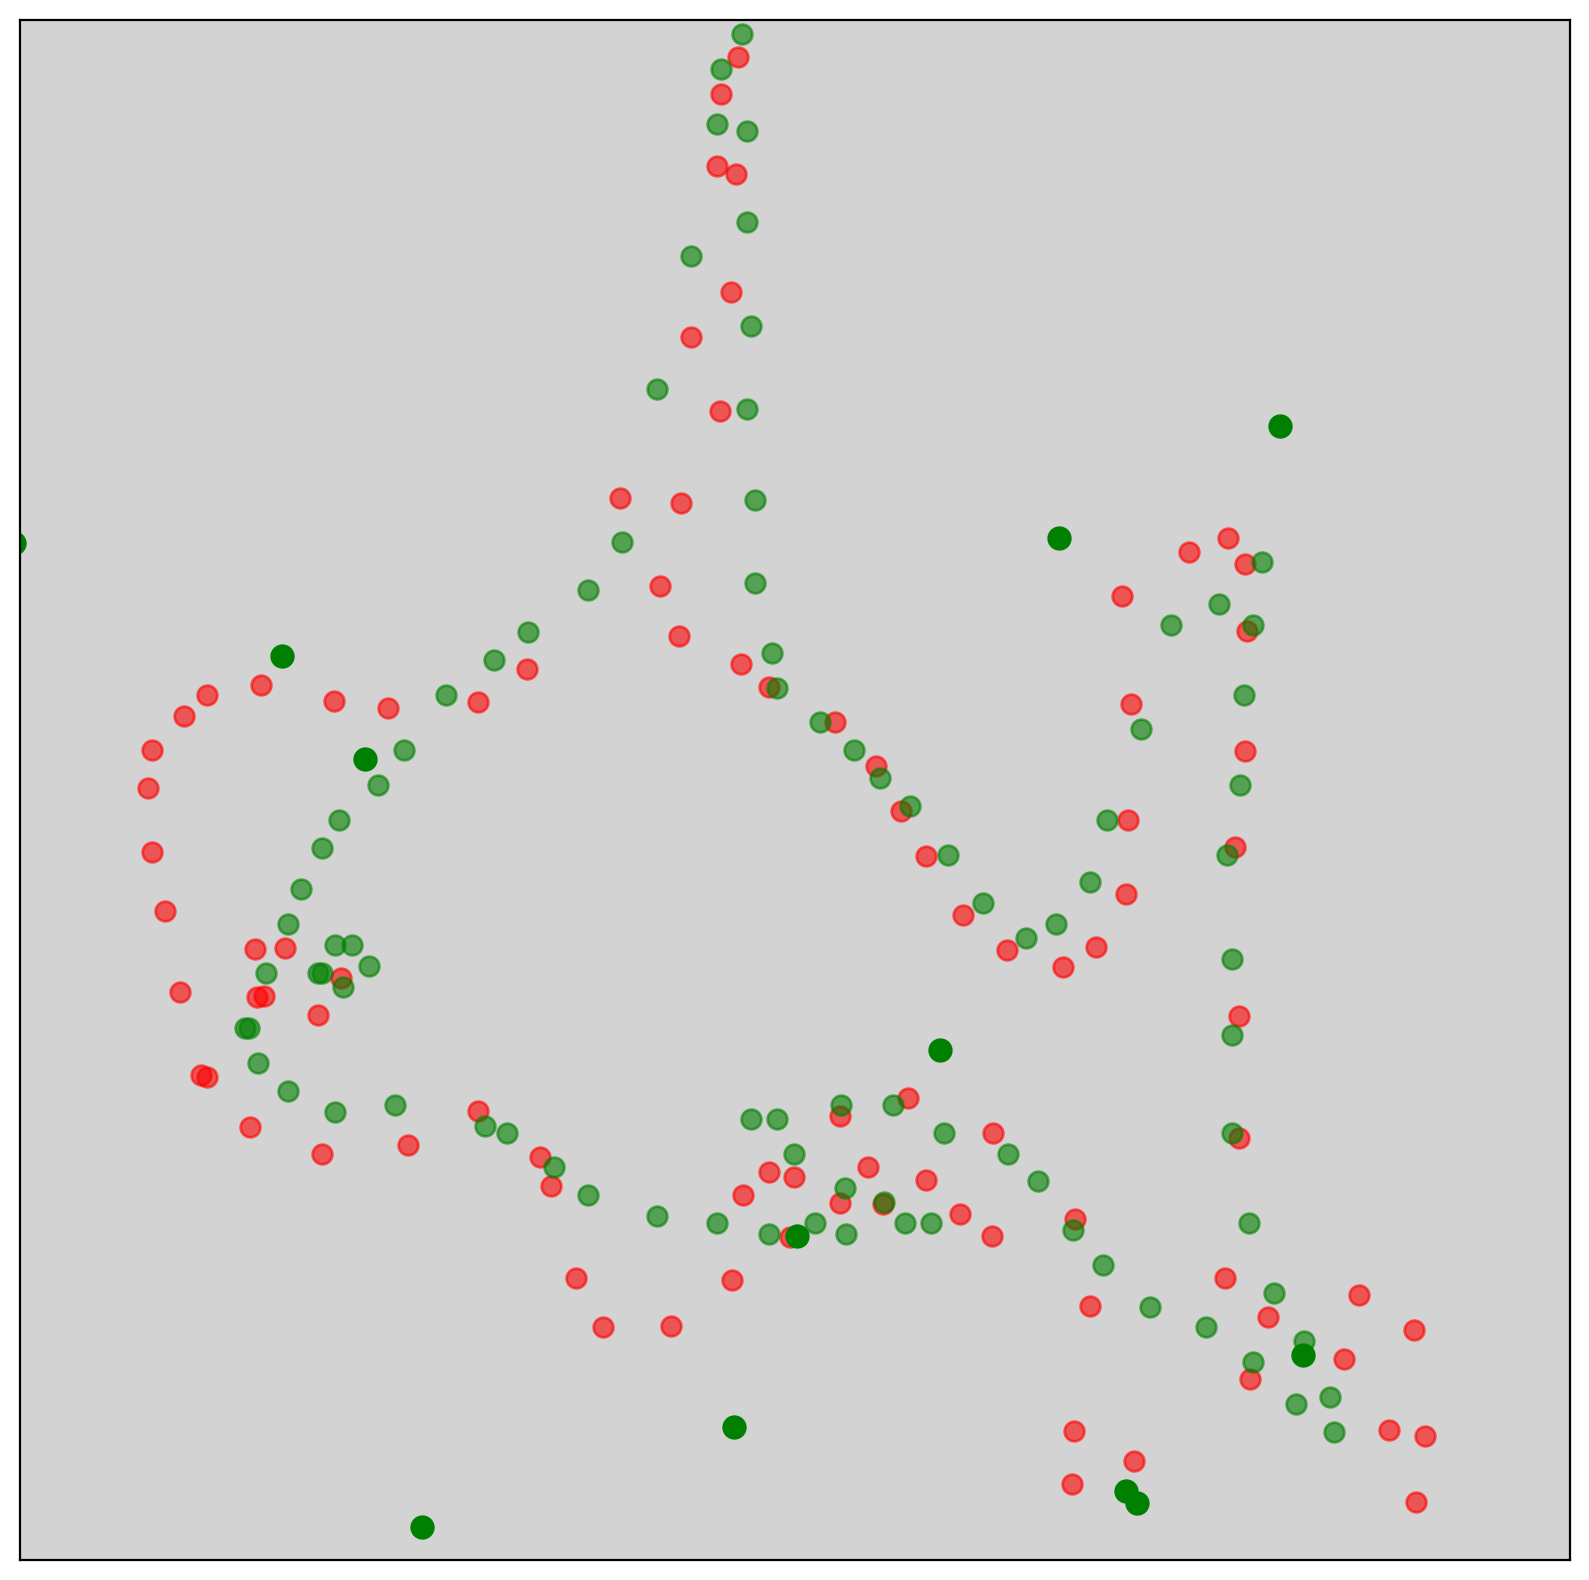

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.30/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is OT-RBF, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


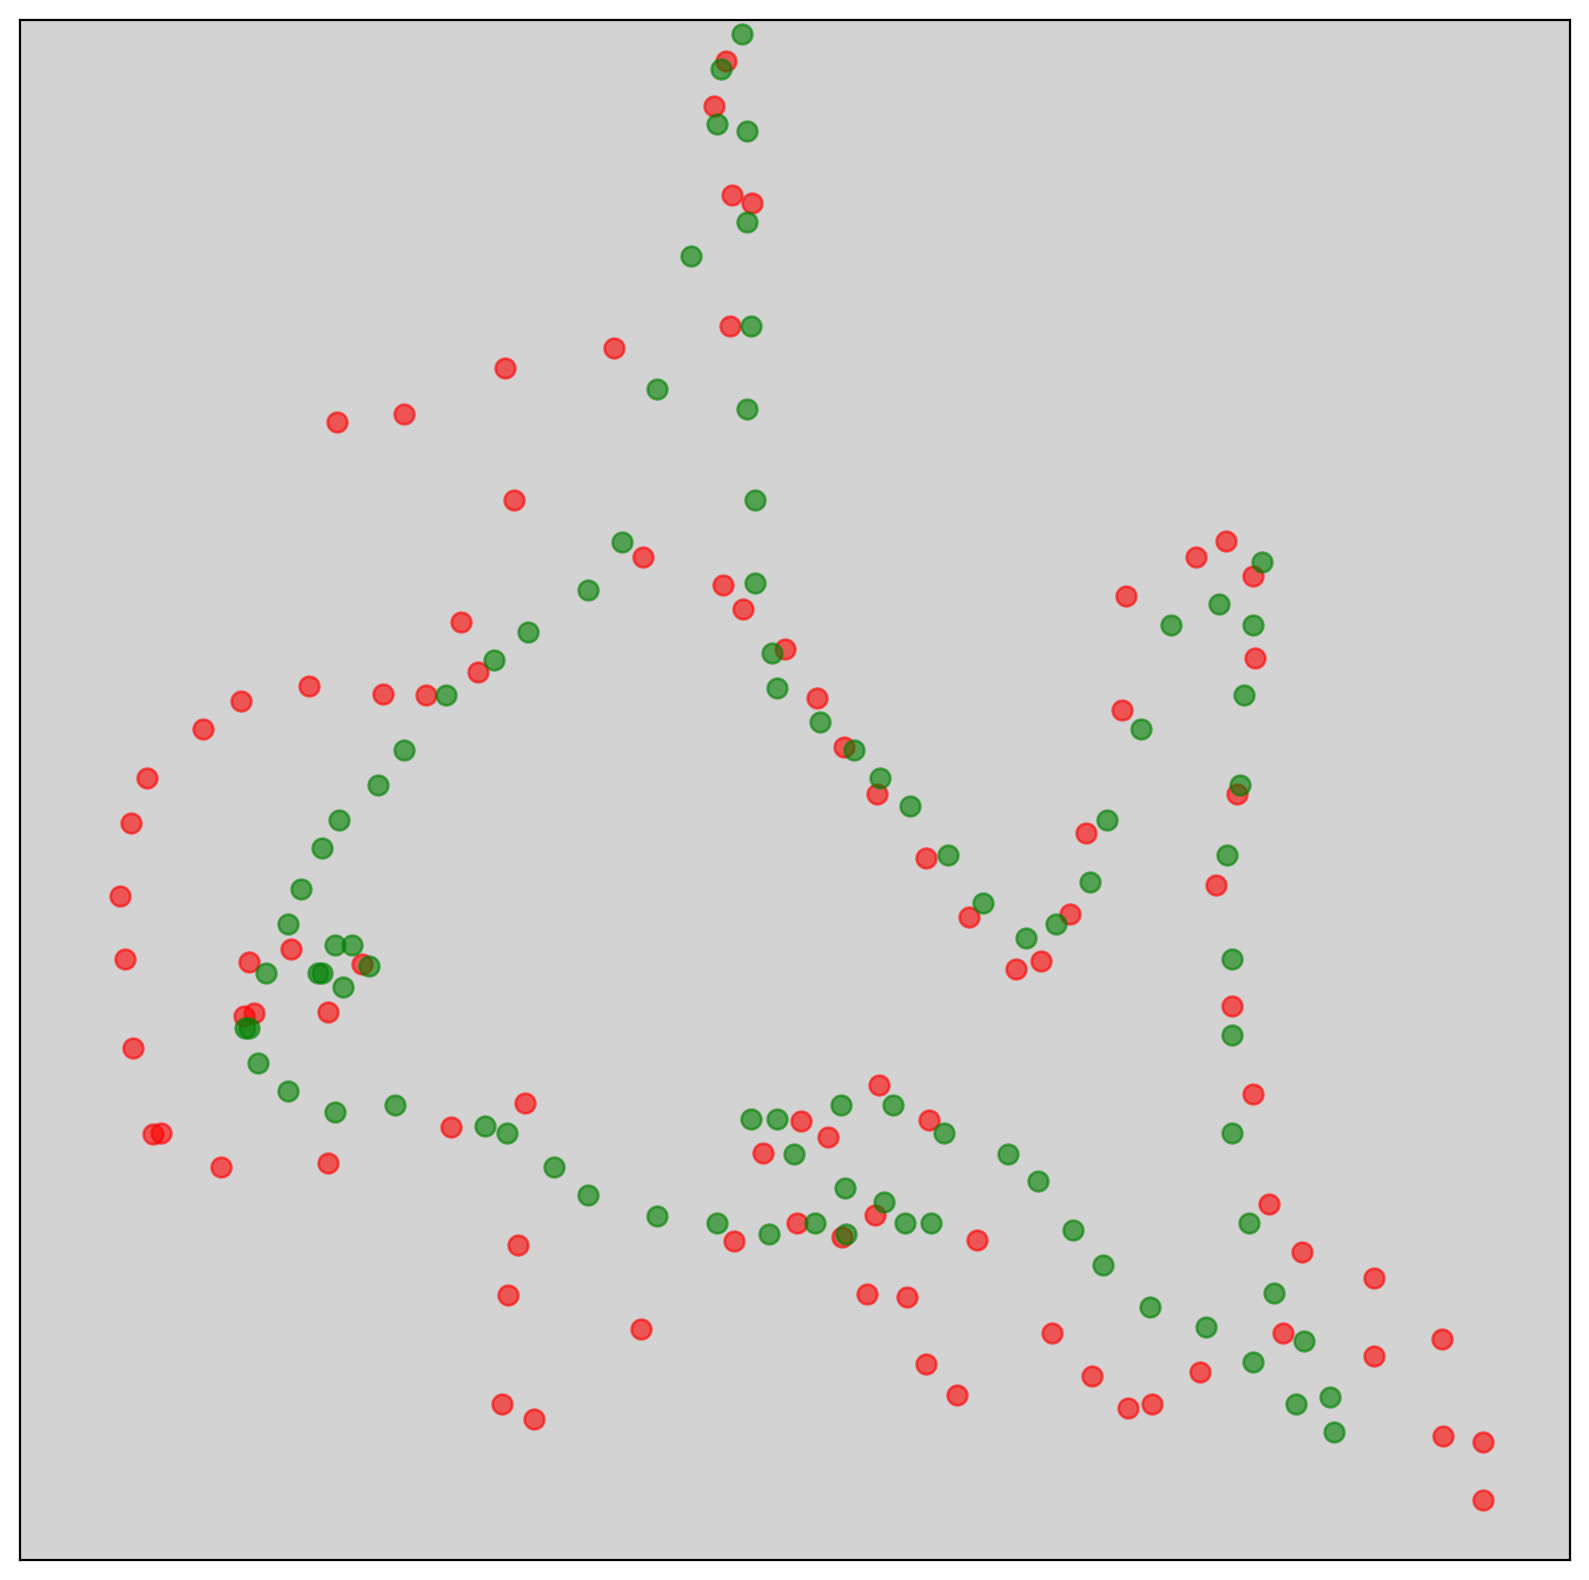

last error is 0.3636009592897803


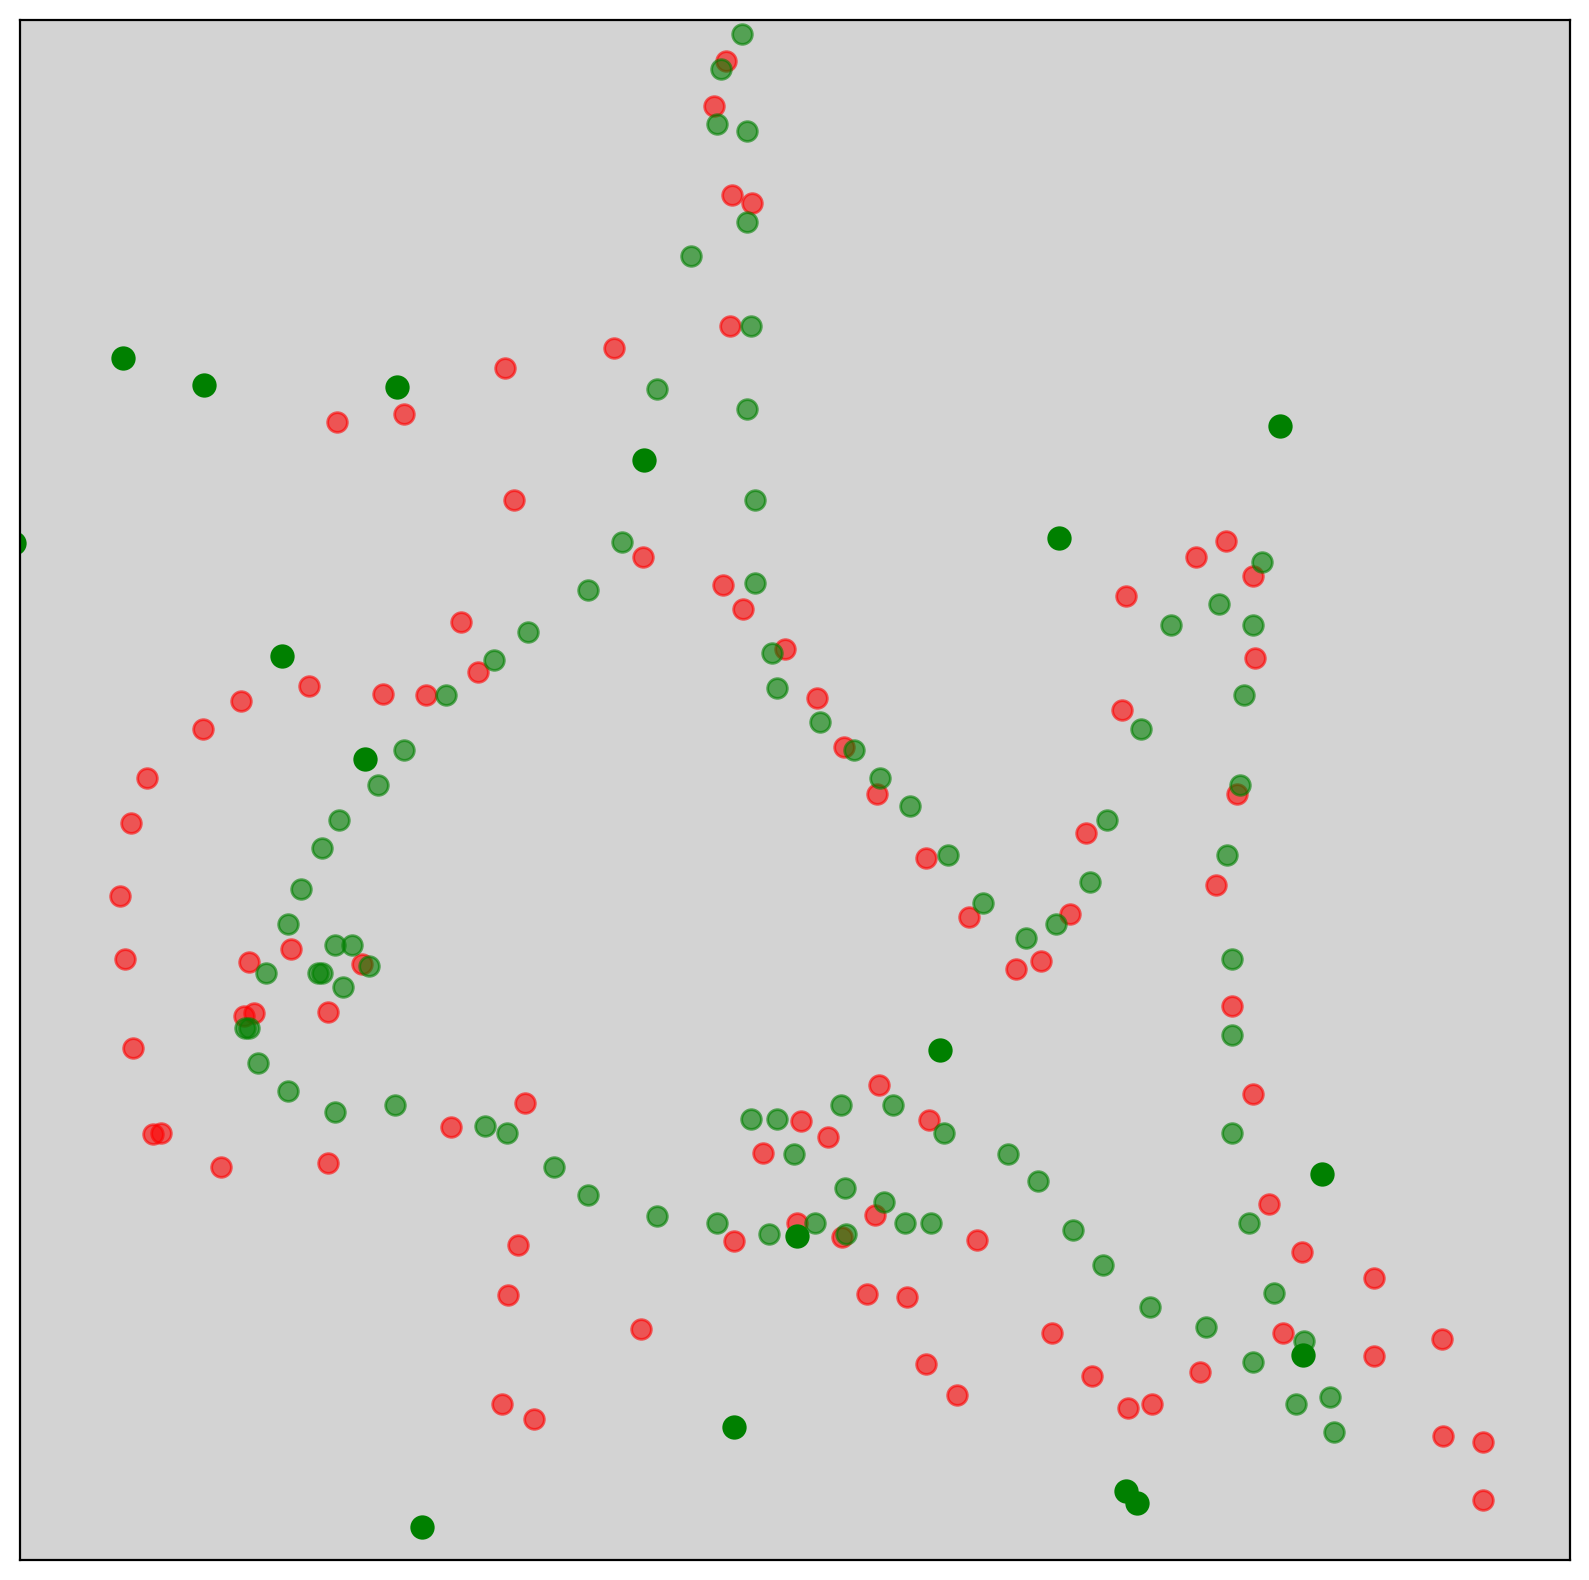

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.00/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is OT-TPS, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


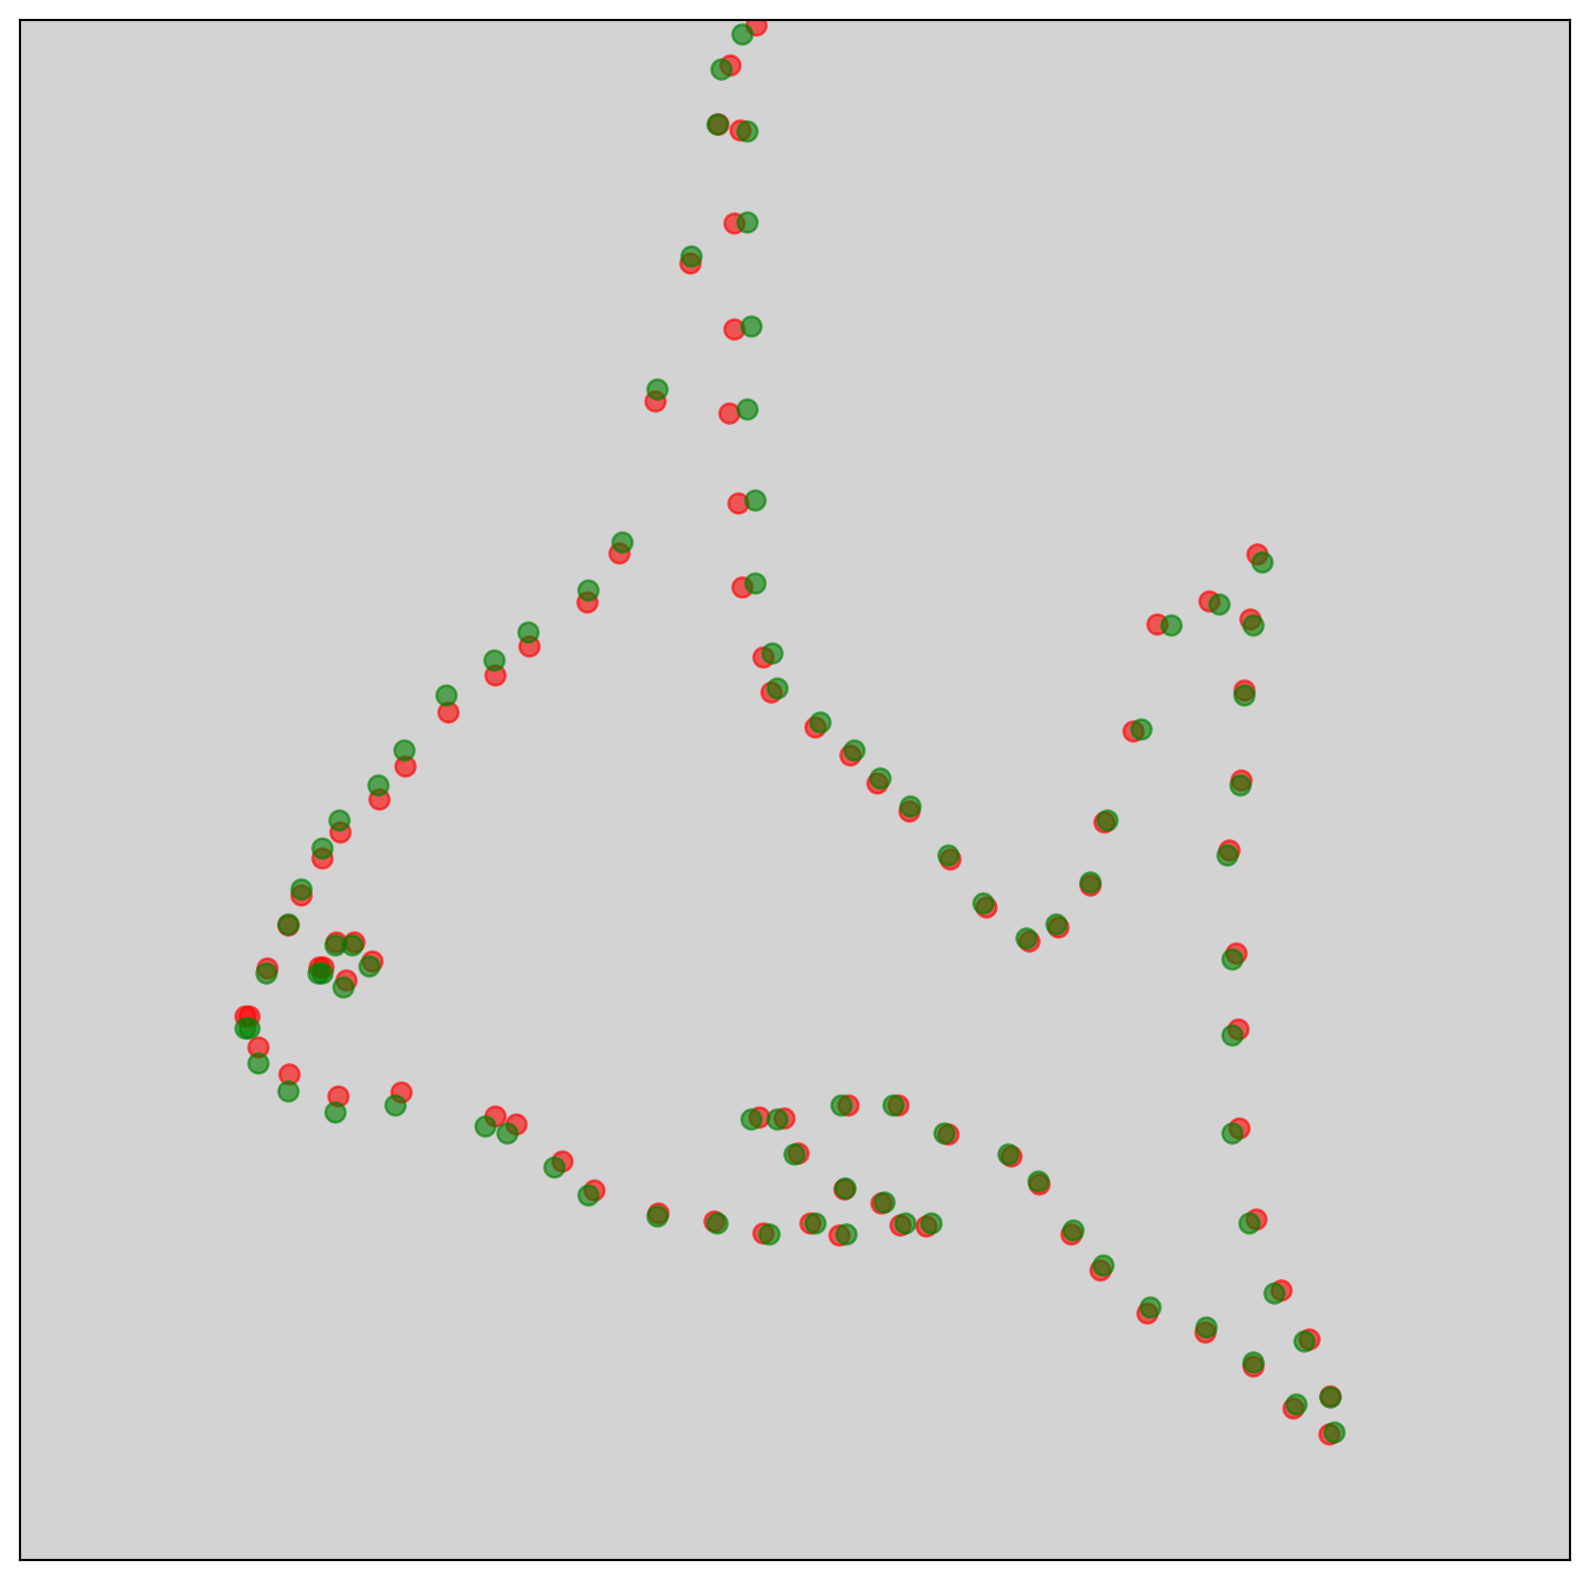

last error is 0.03089802309795191


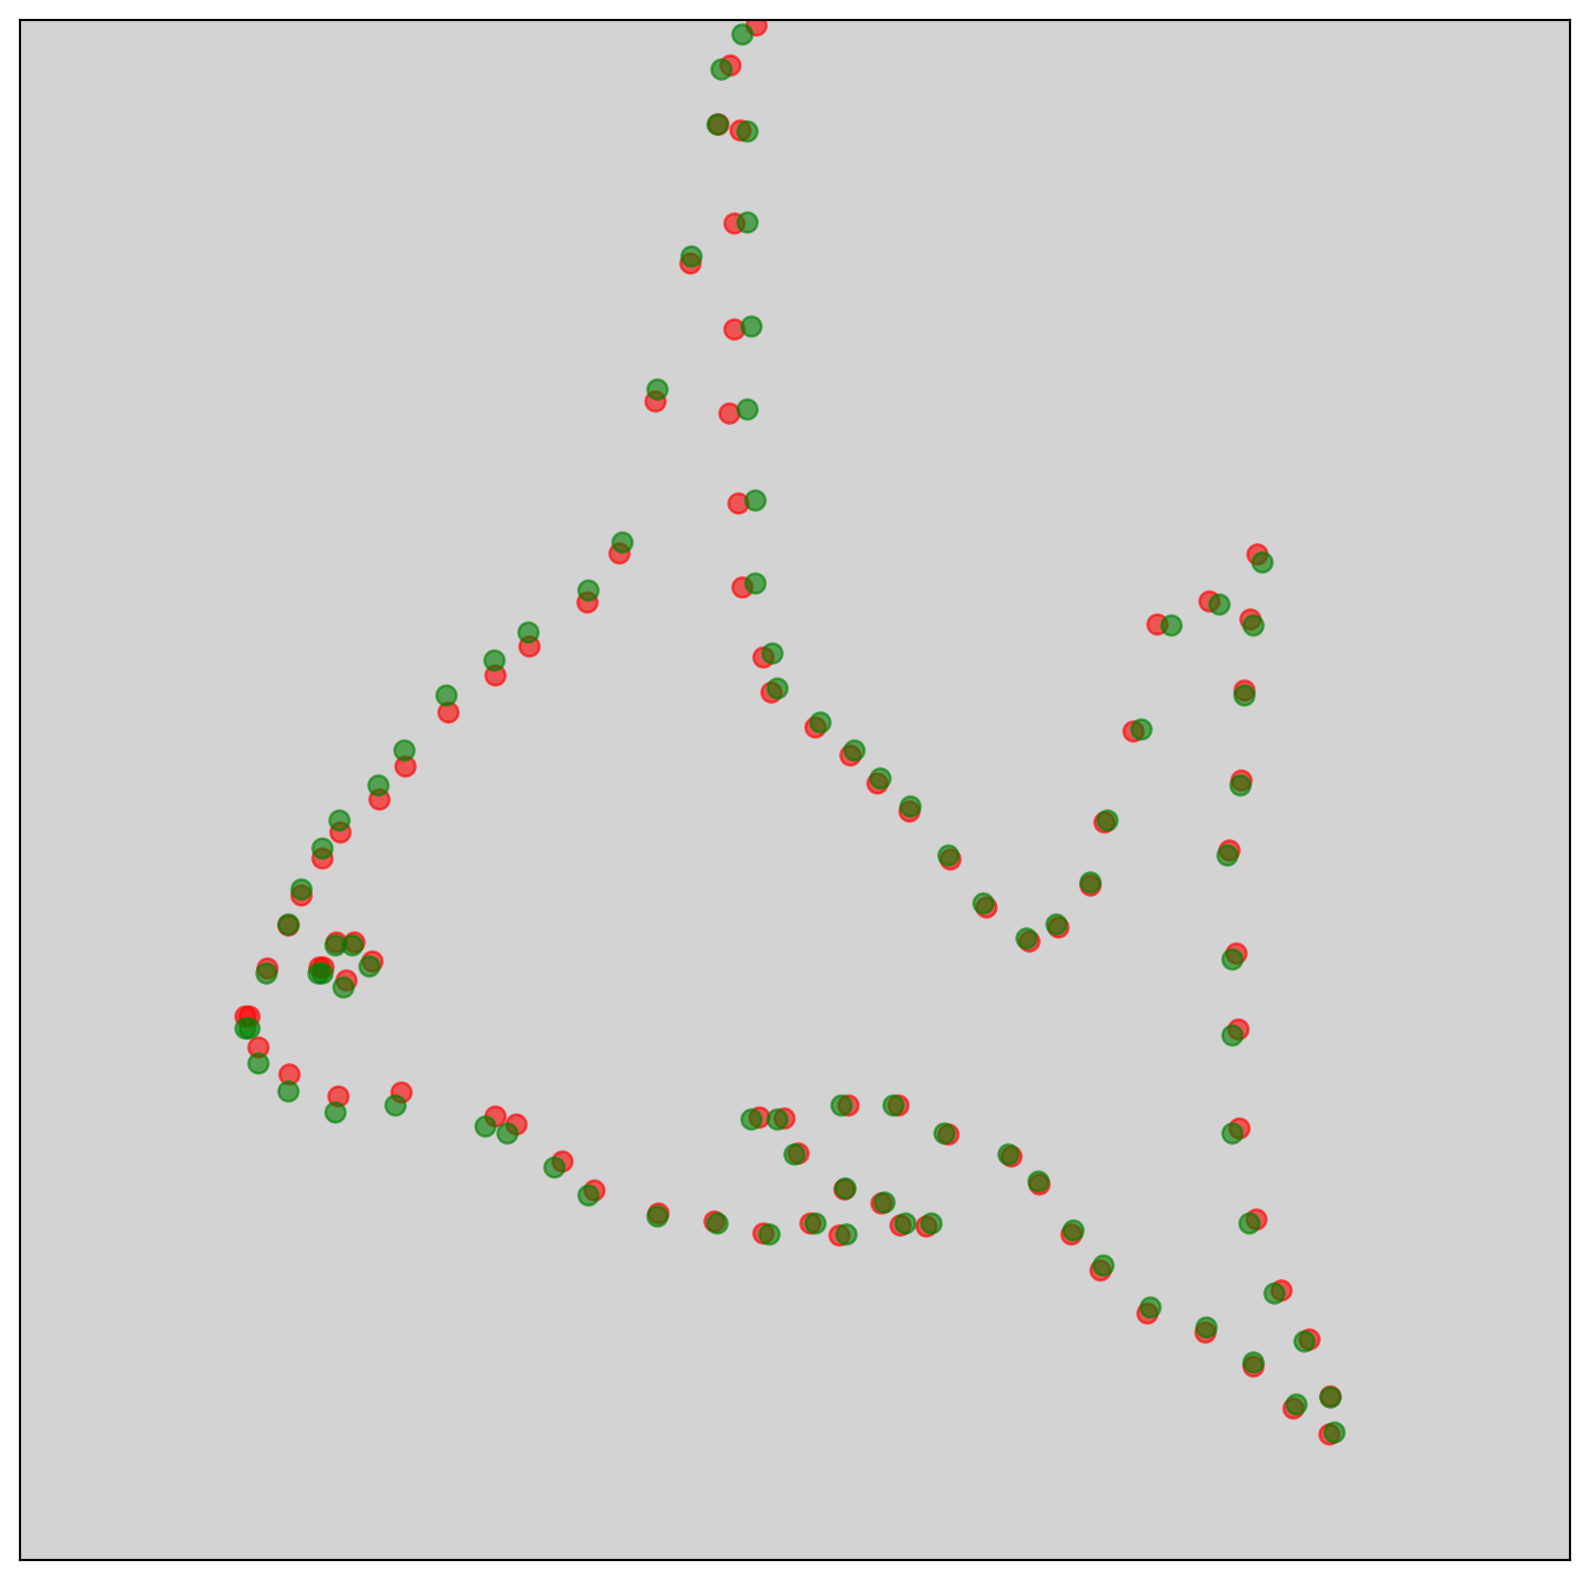

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.10/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is OT-TPS, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


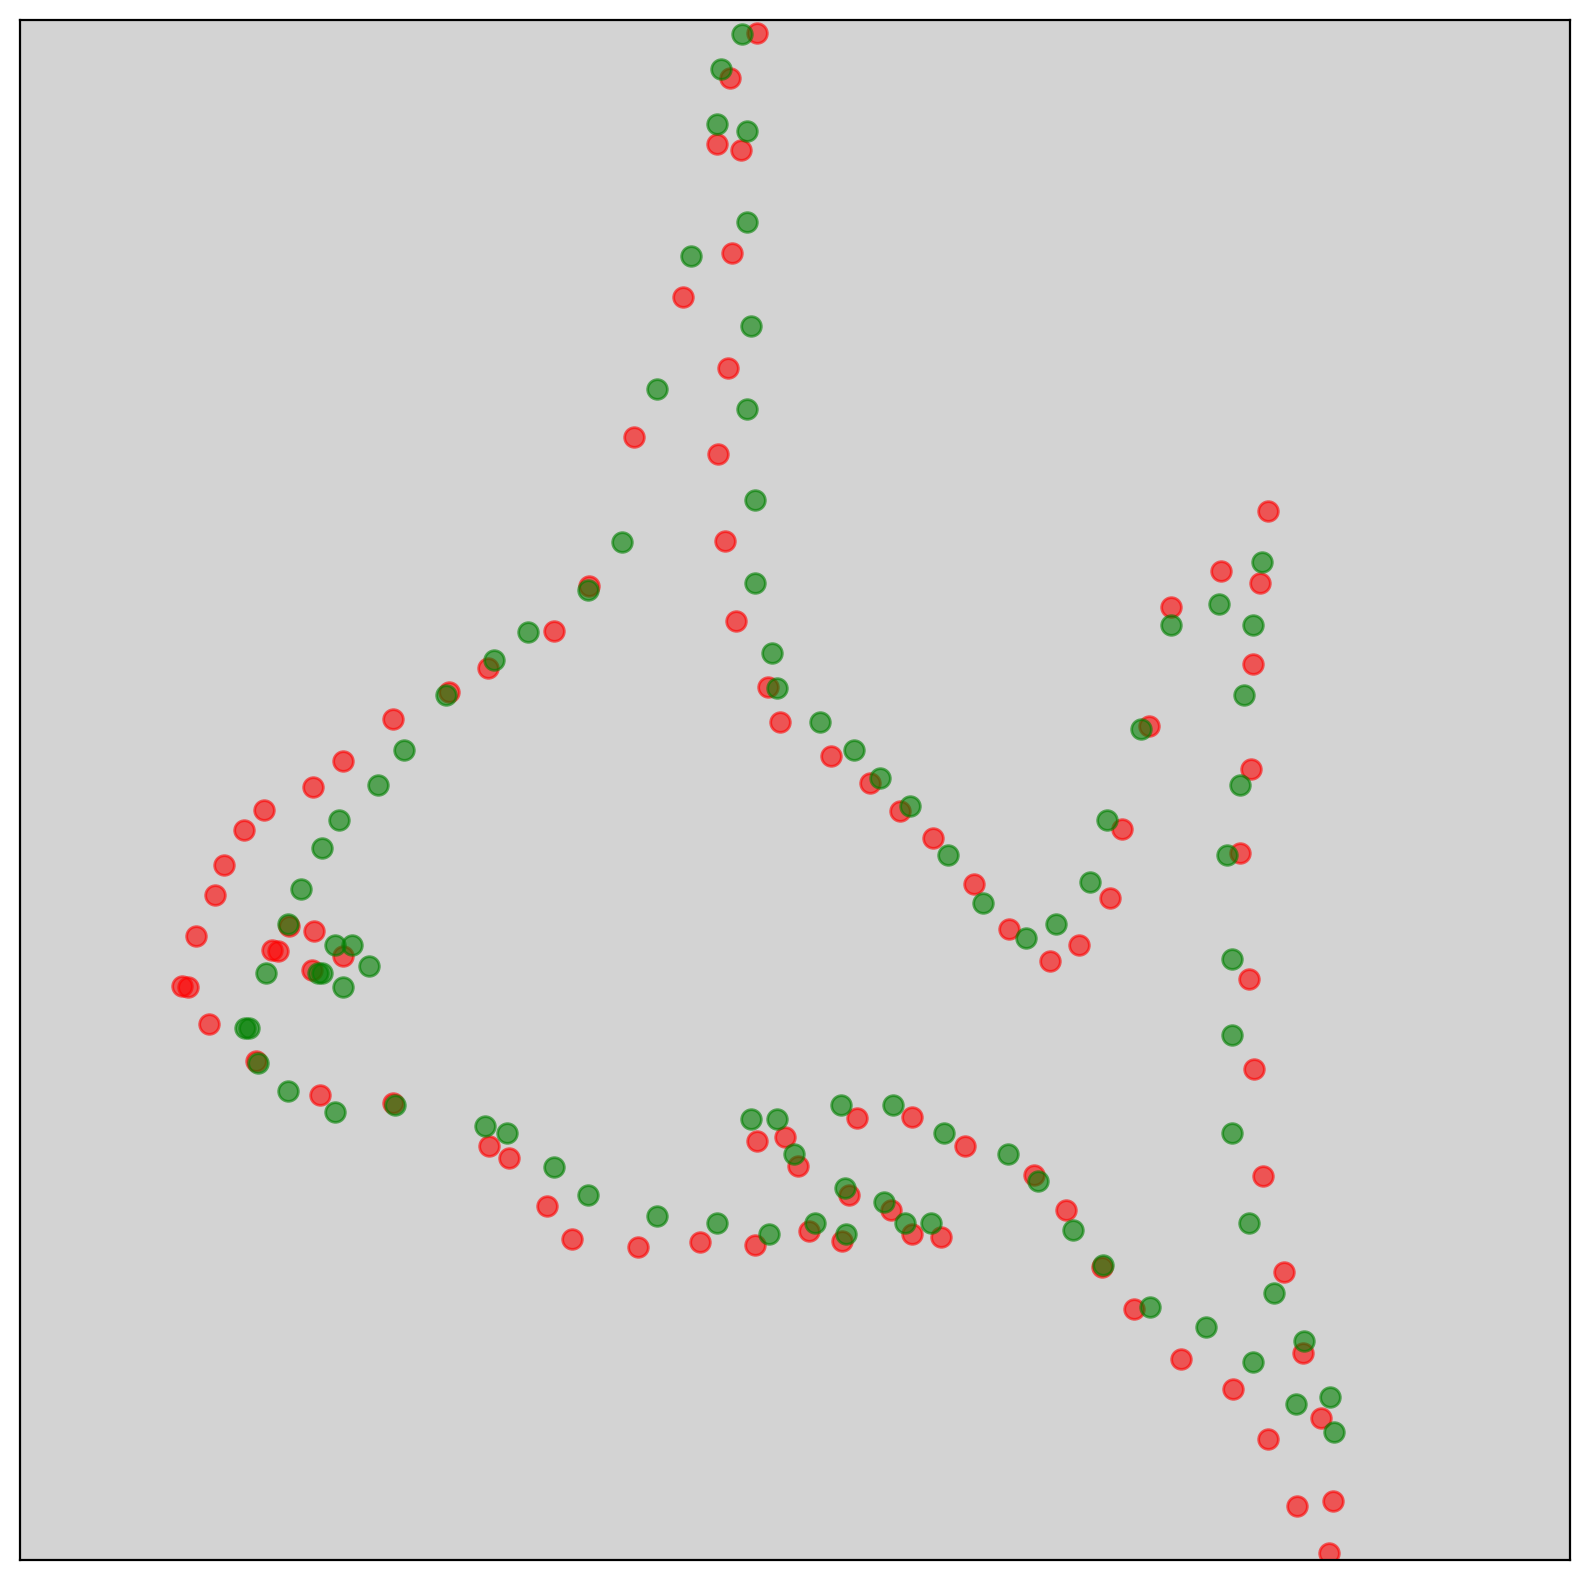

last error is 0.14573308363578197


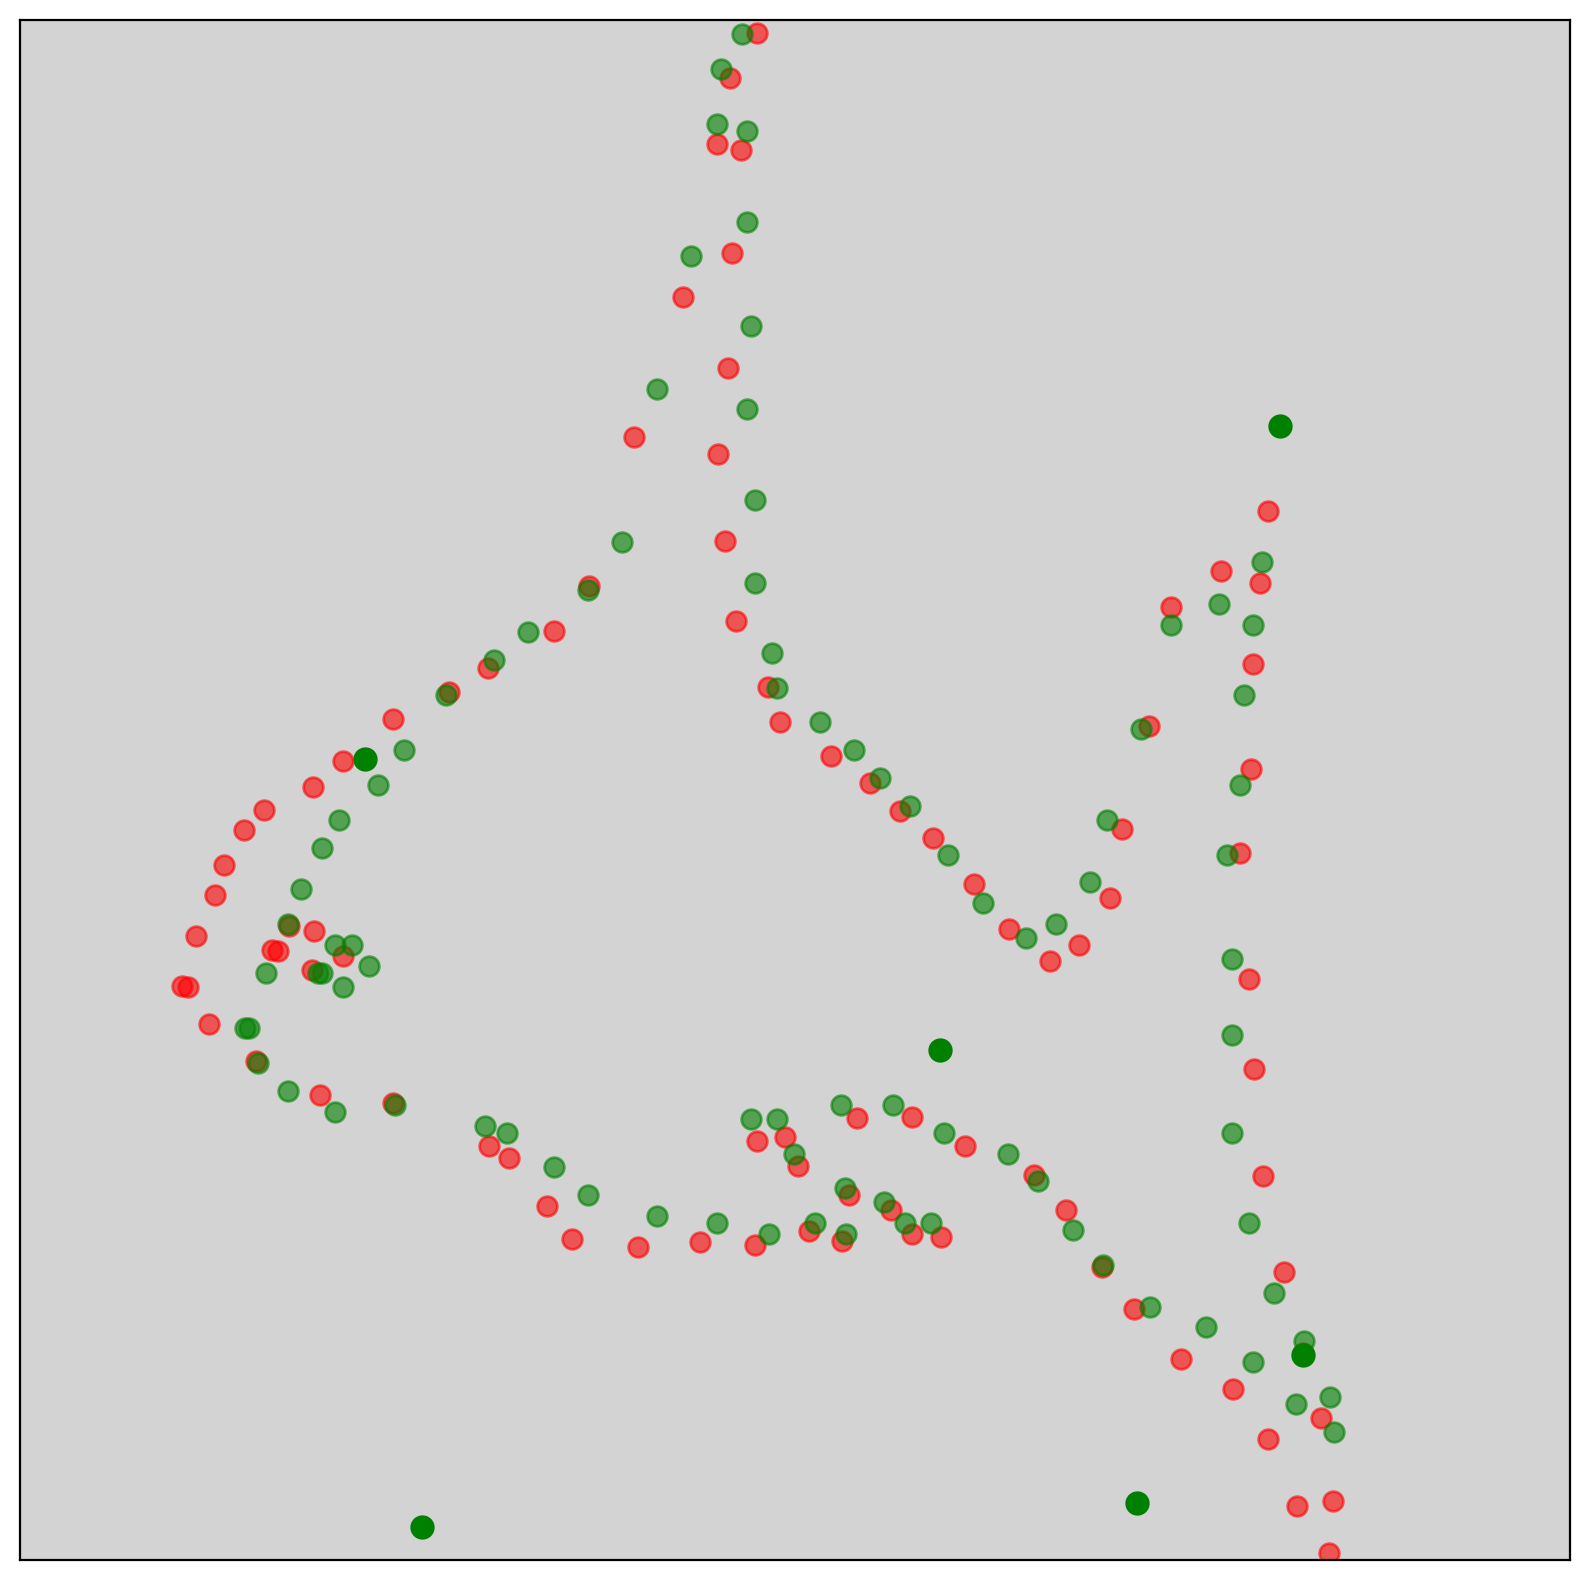

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.20/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is OT-TPS, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


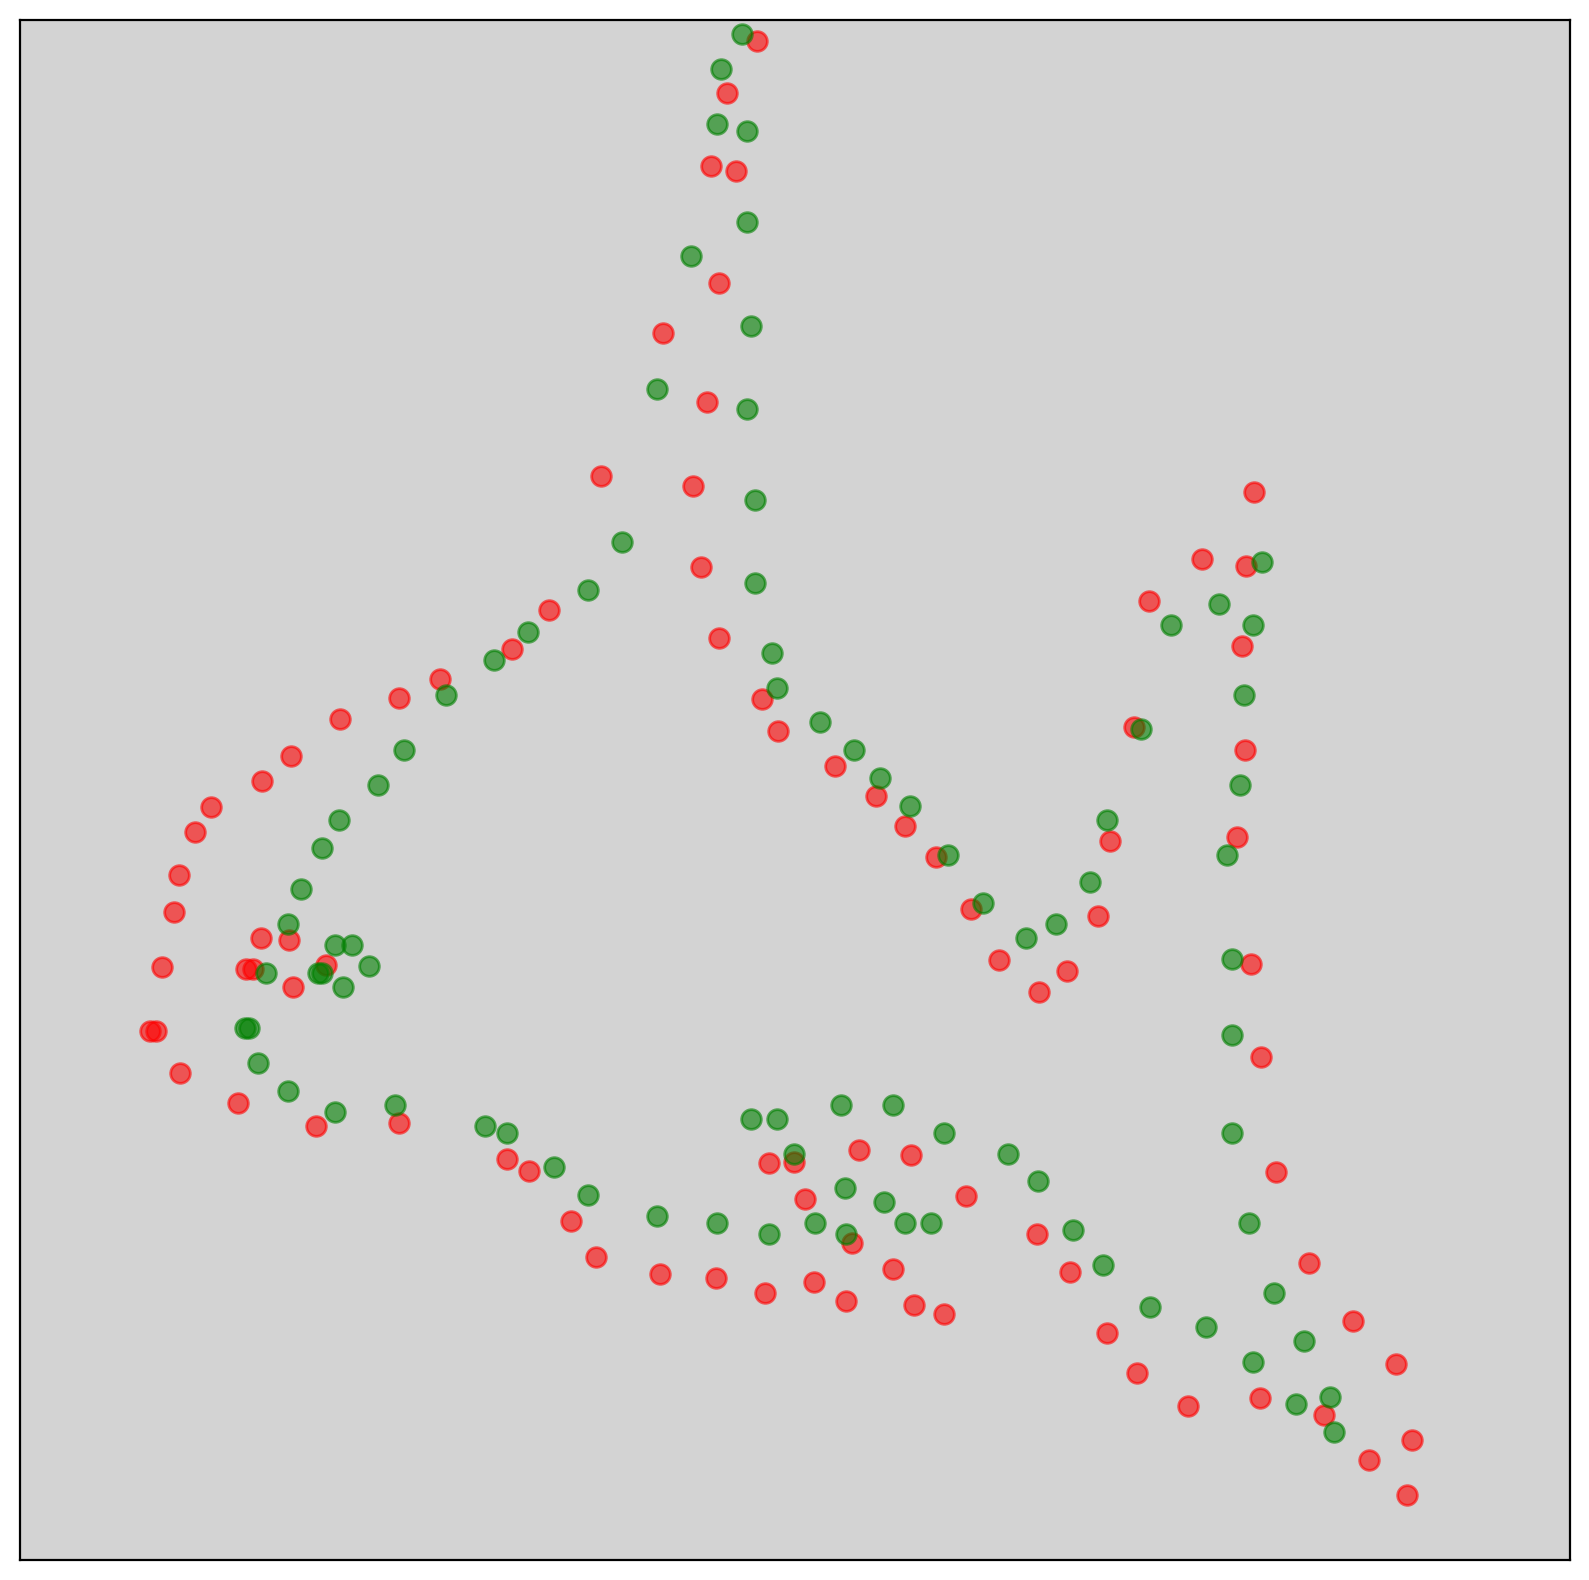

last error is 0.21813460053268682


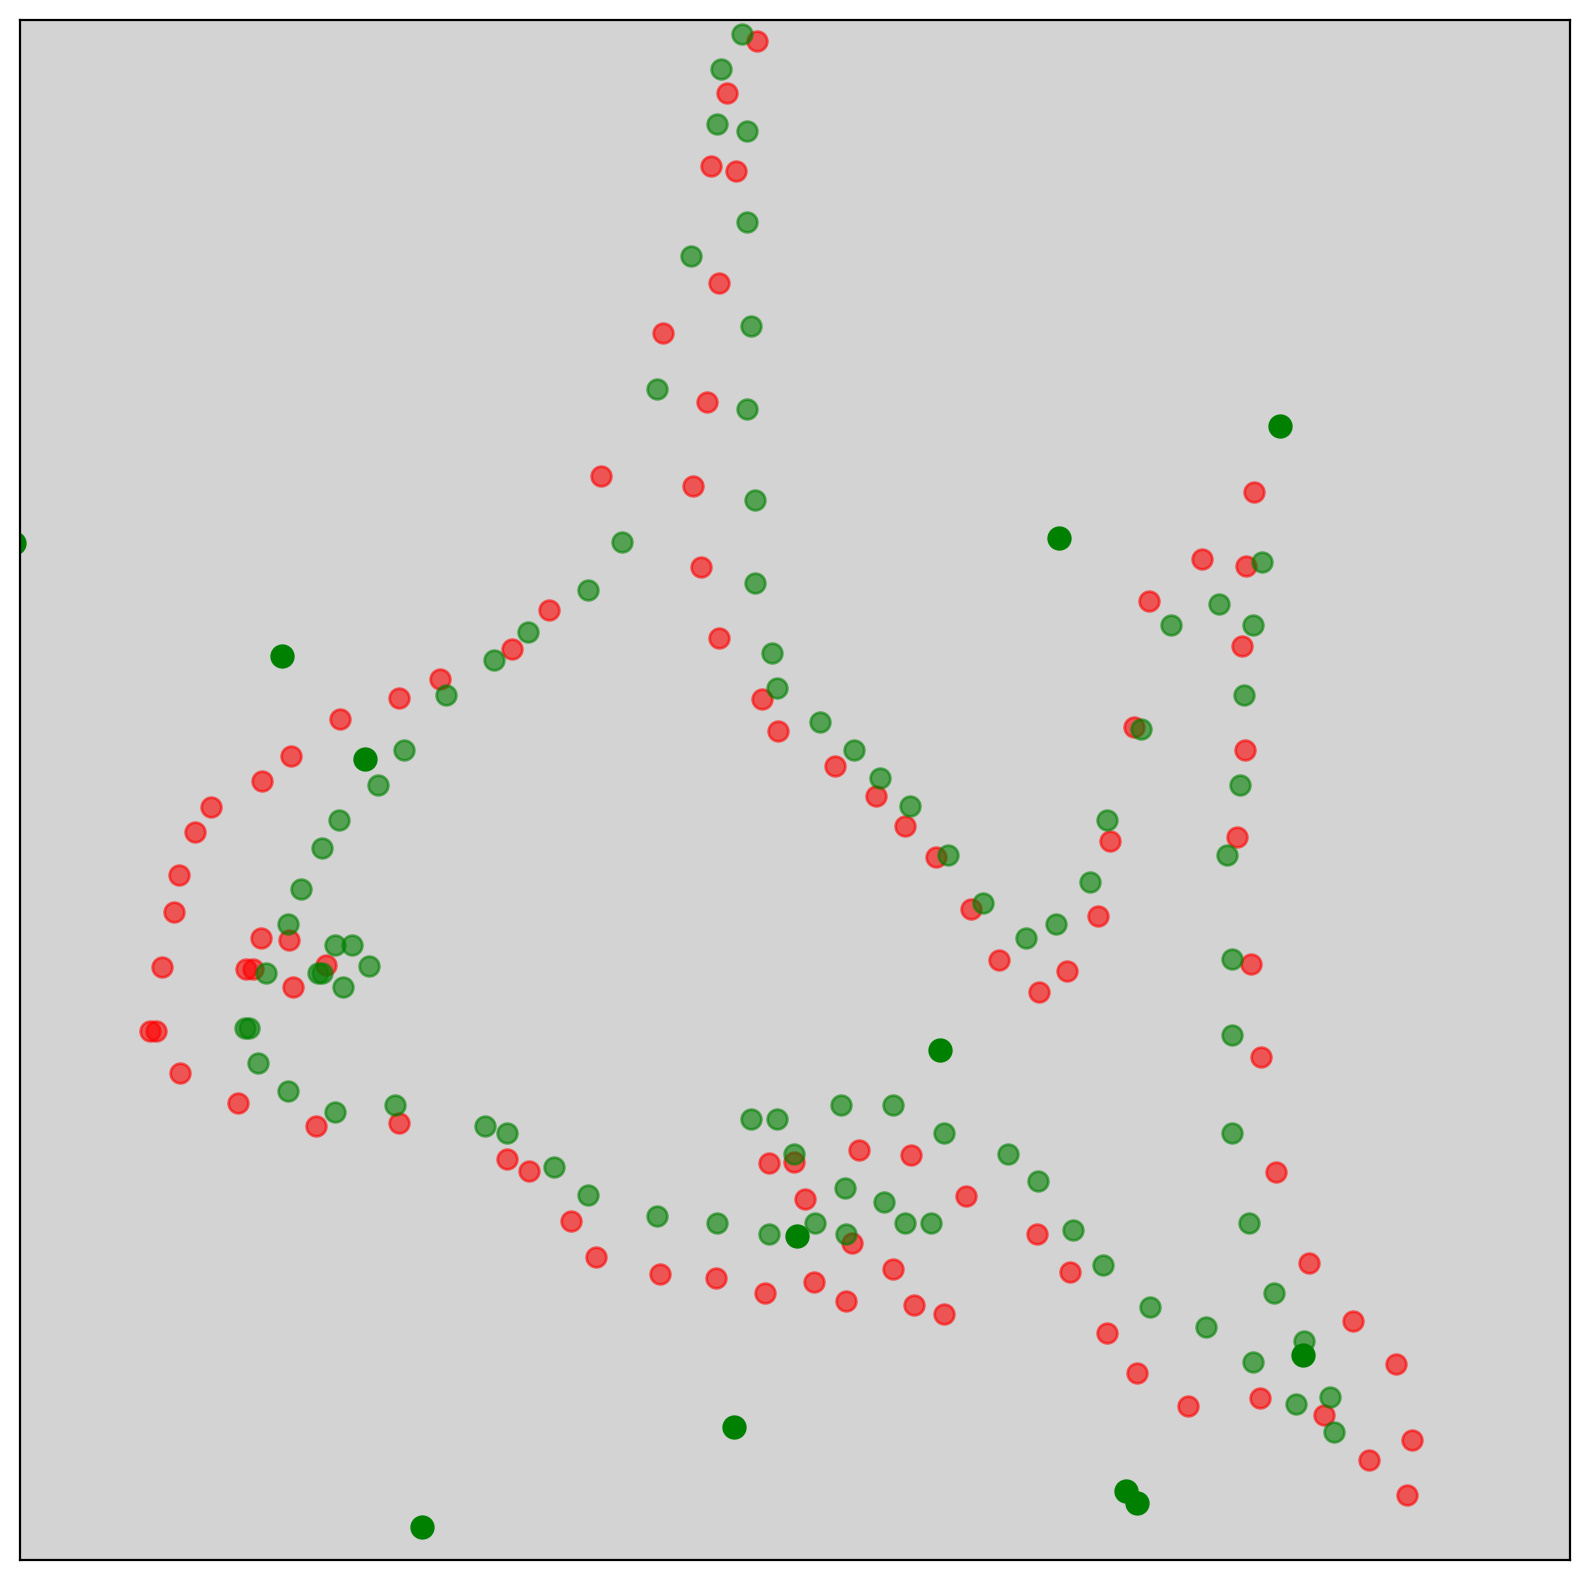

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.30/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is OT-TPS, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


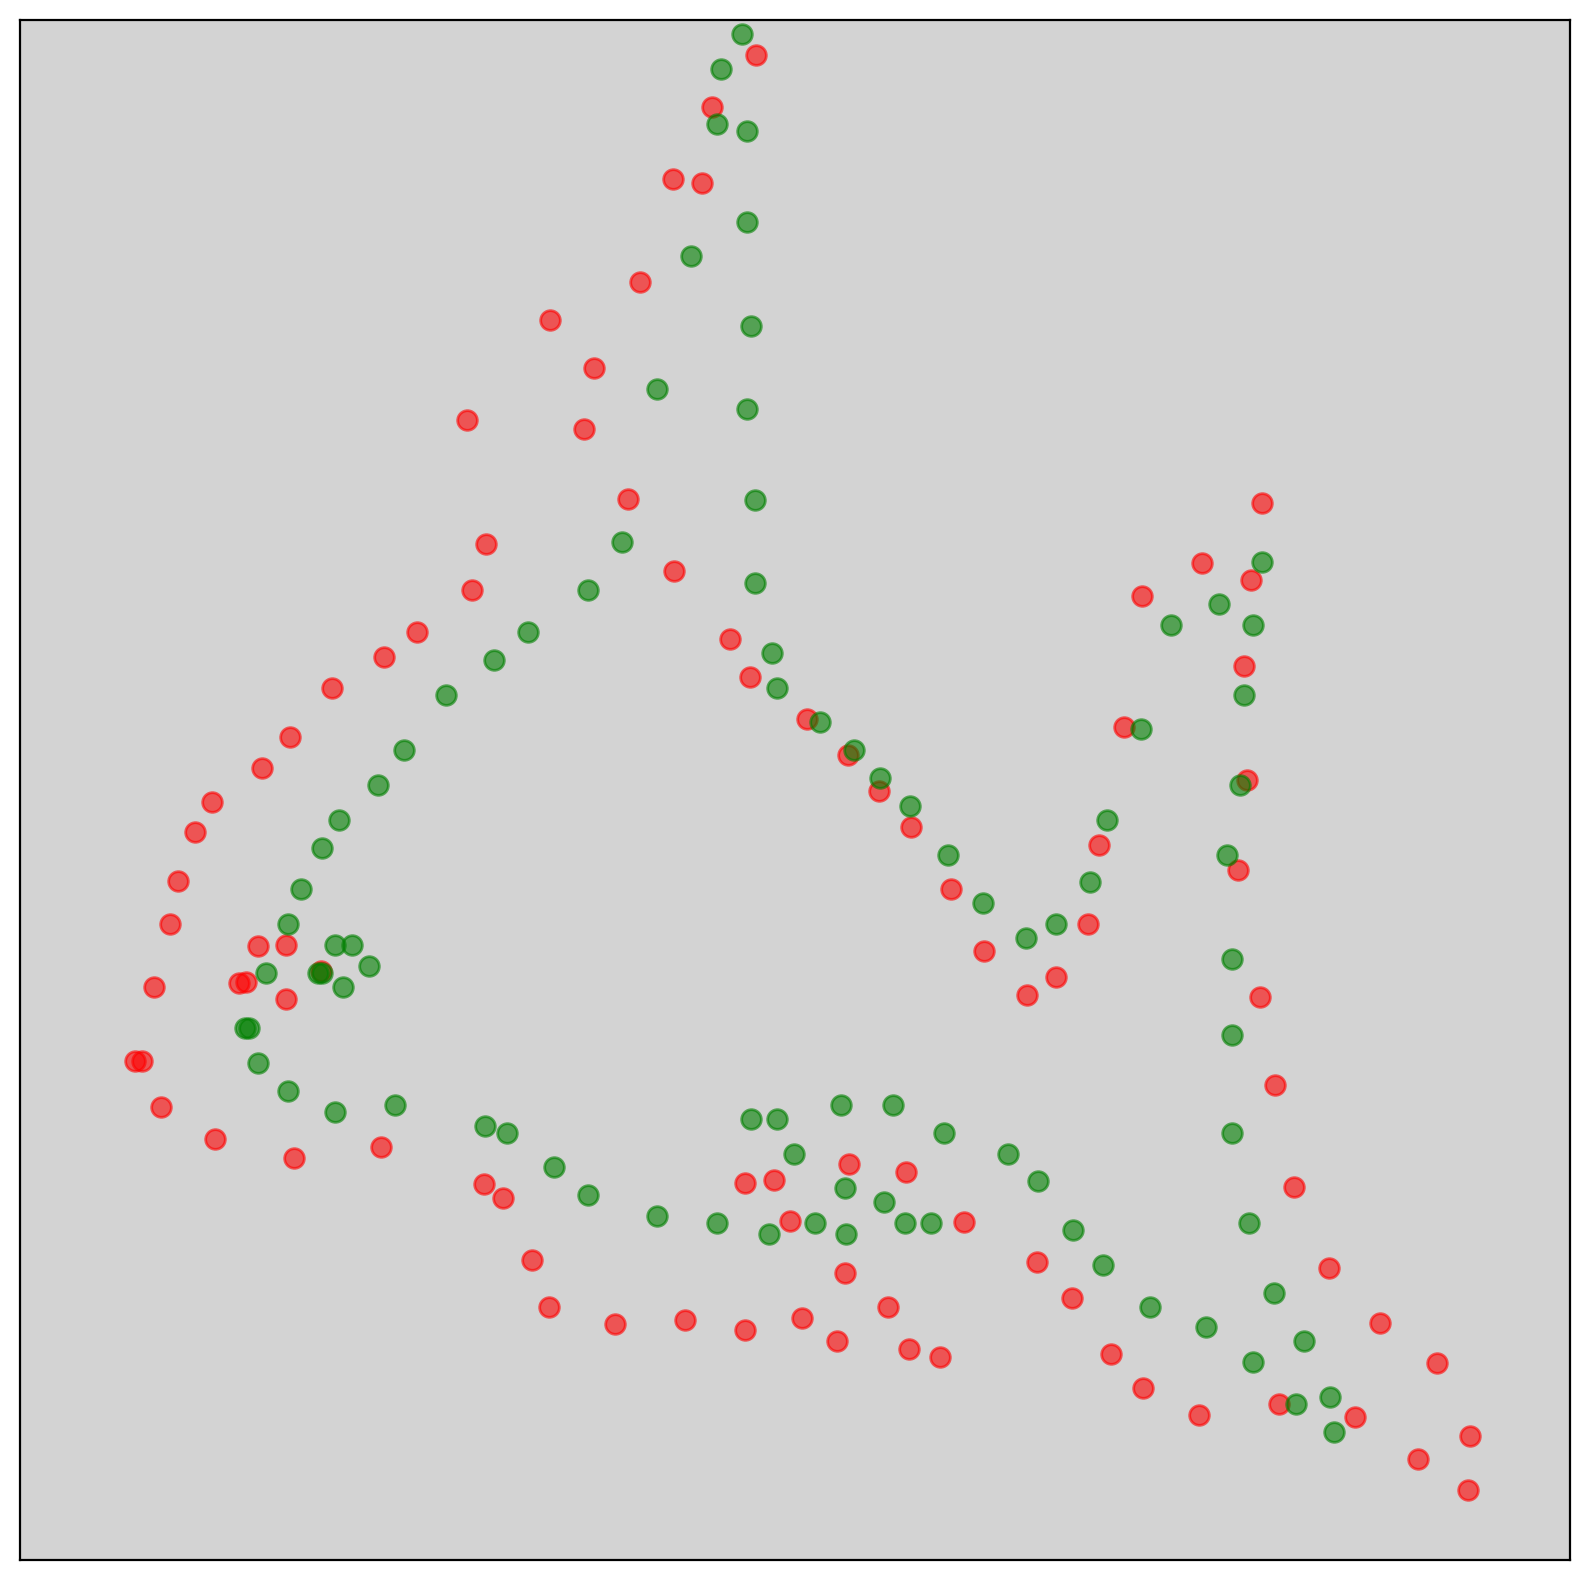

last error is 0.277951303260441


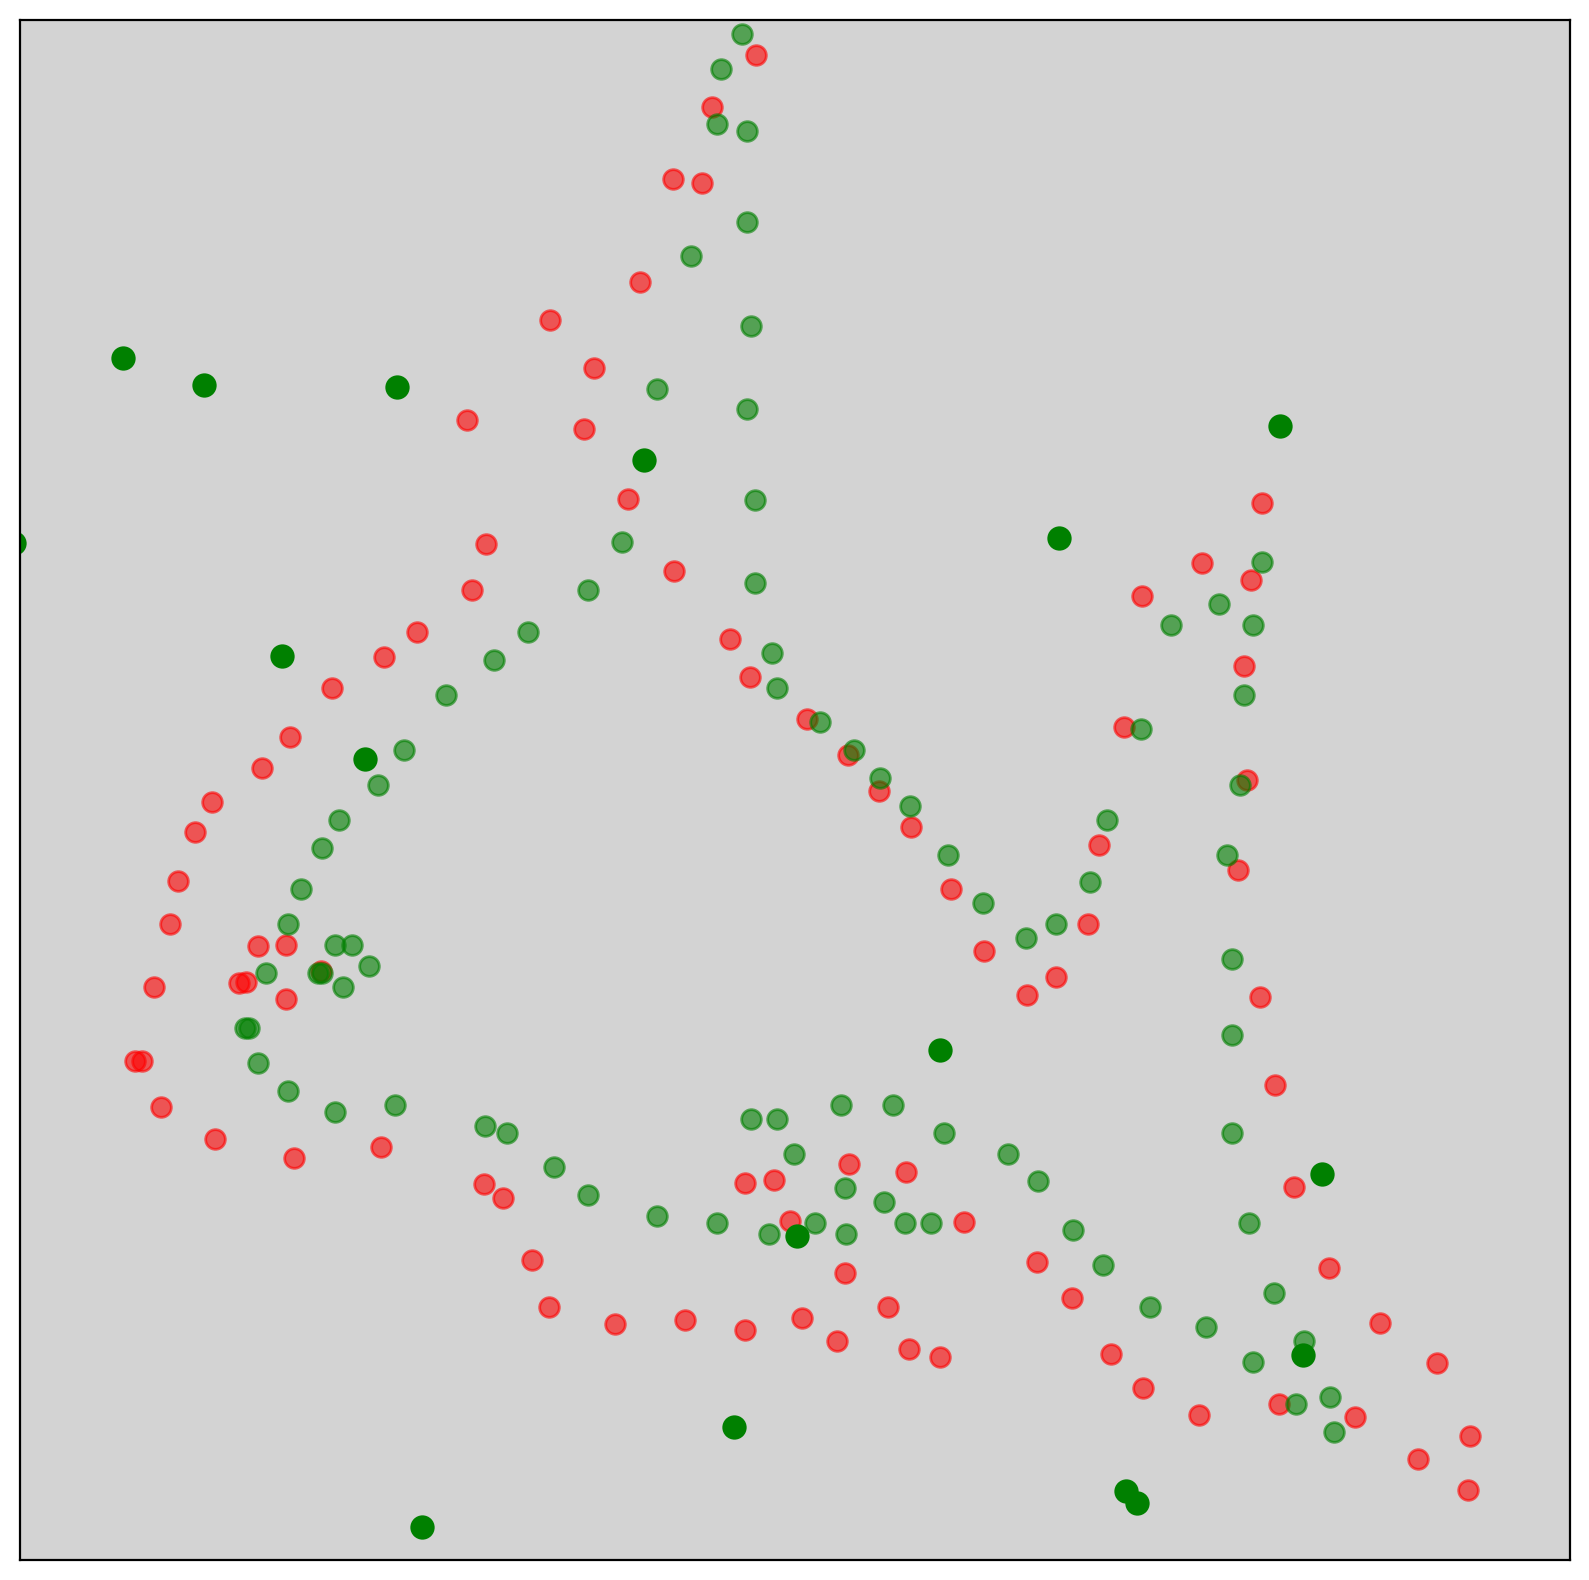

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.00/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is SOT-RBF, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


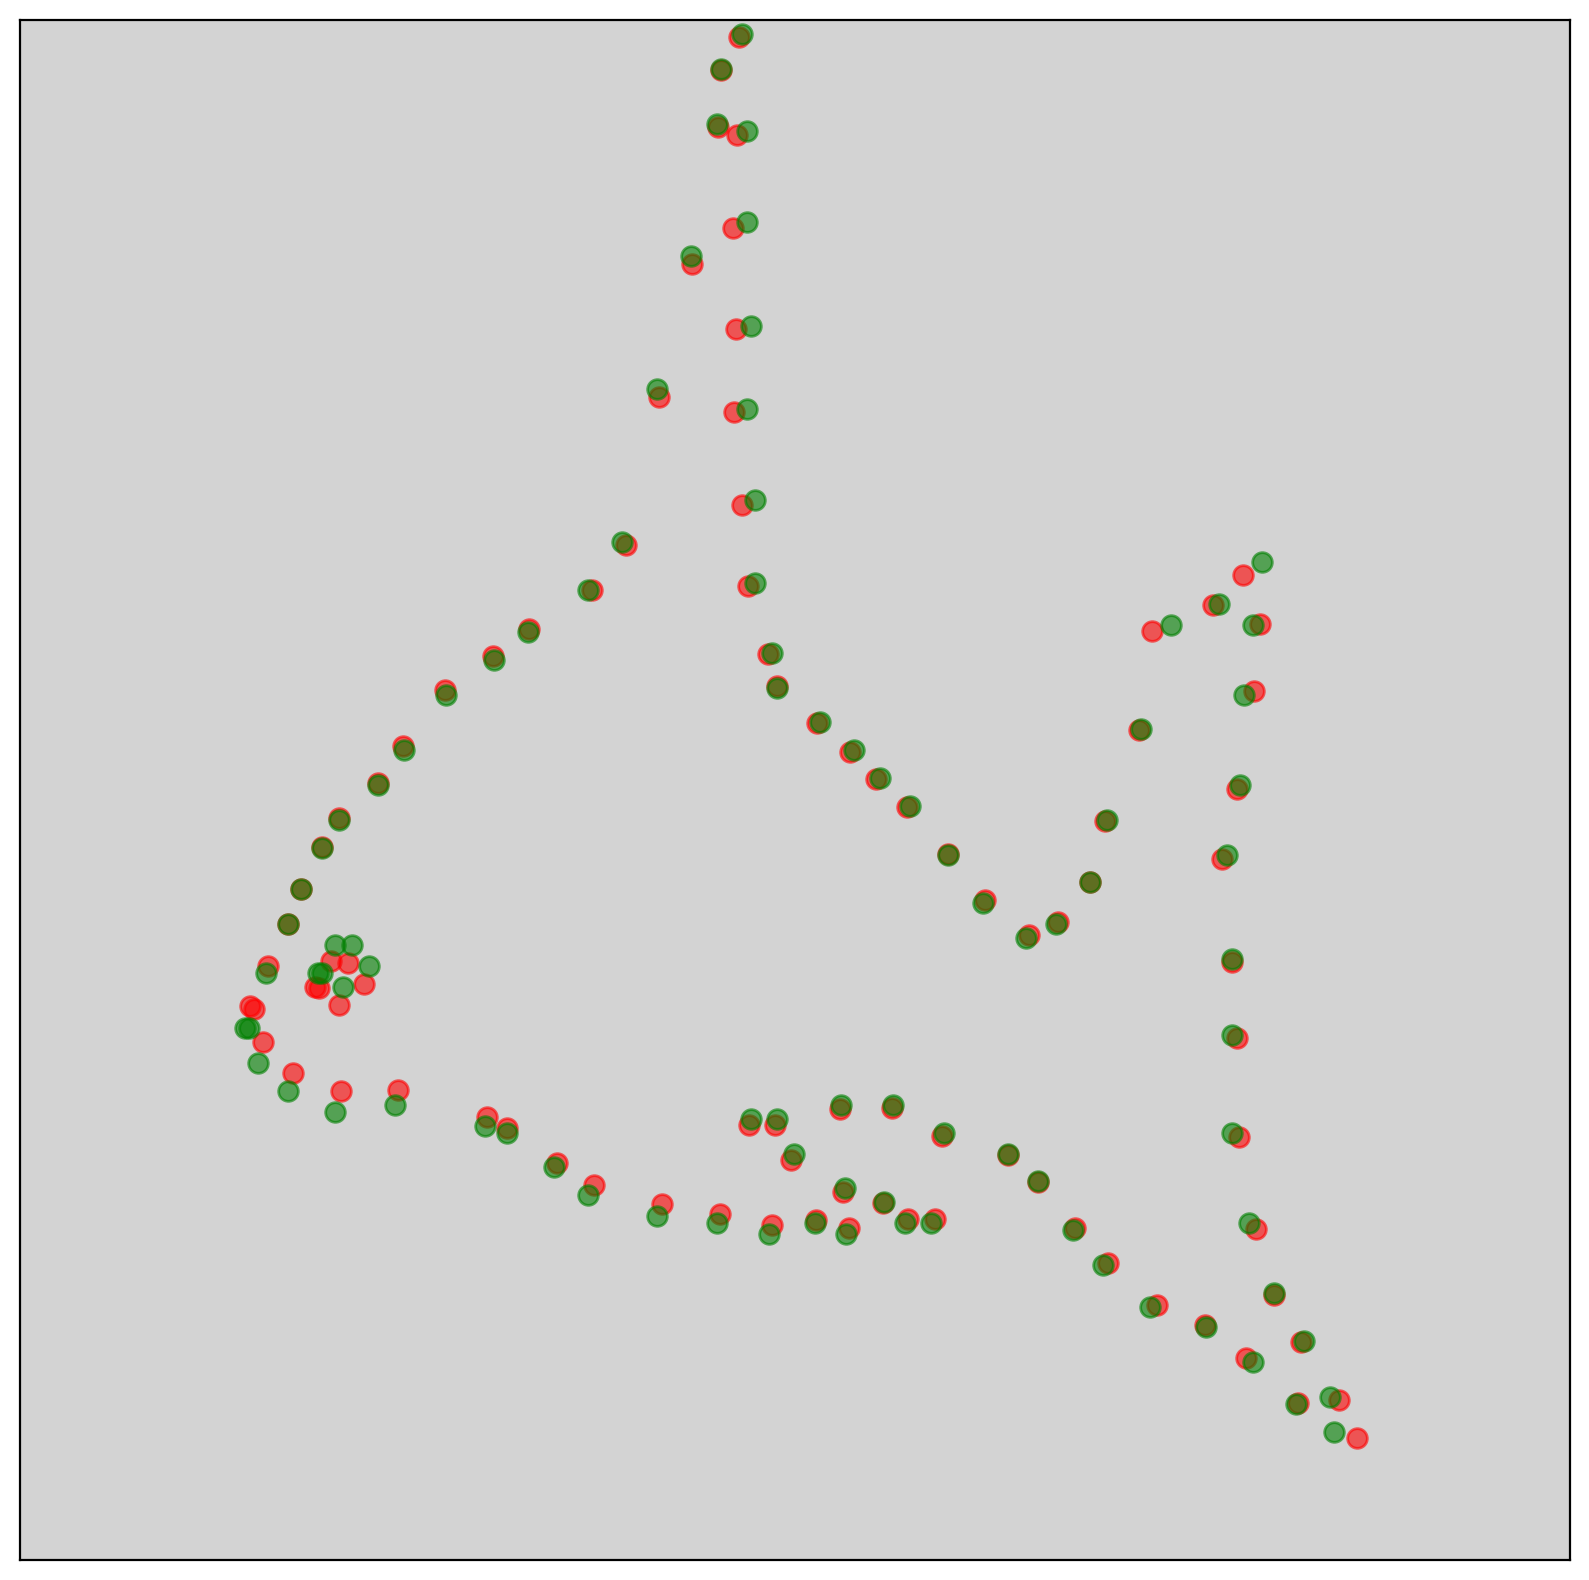

last error is 0.03217072309346027


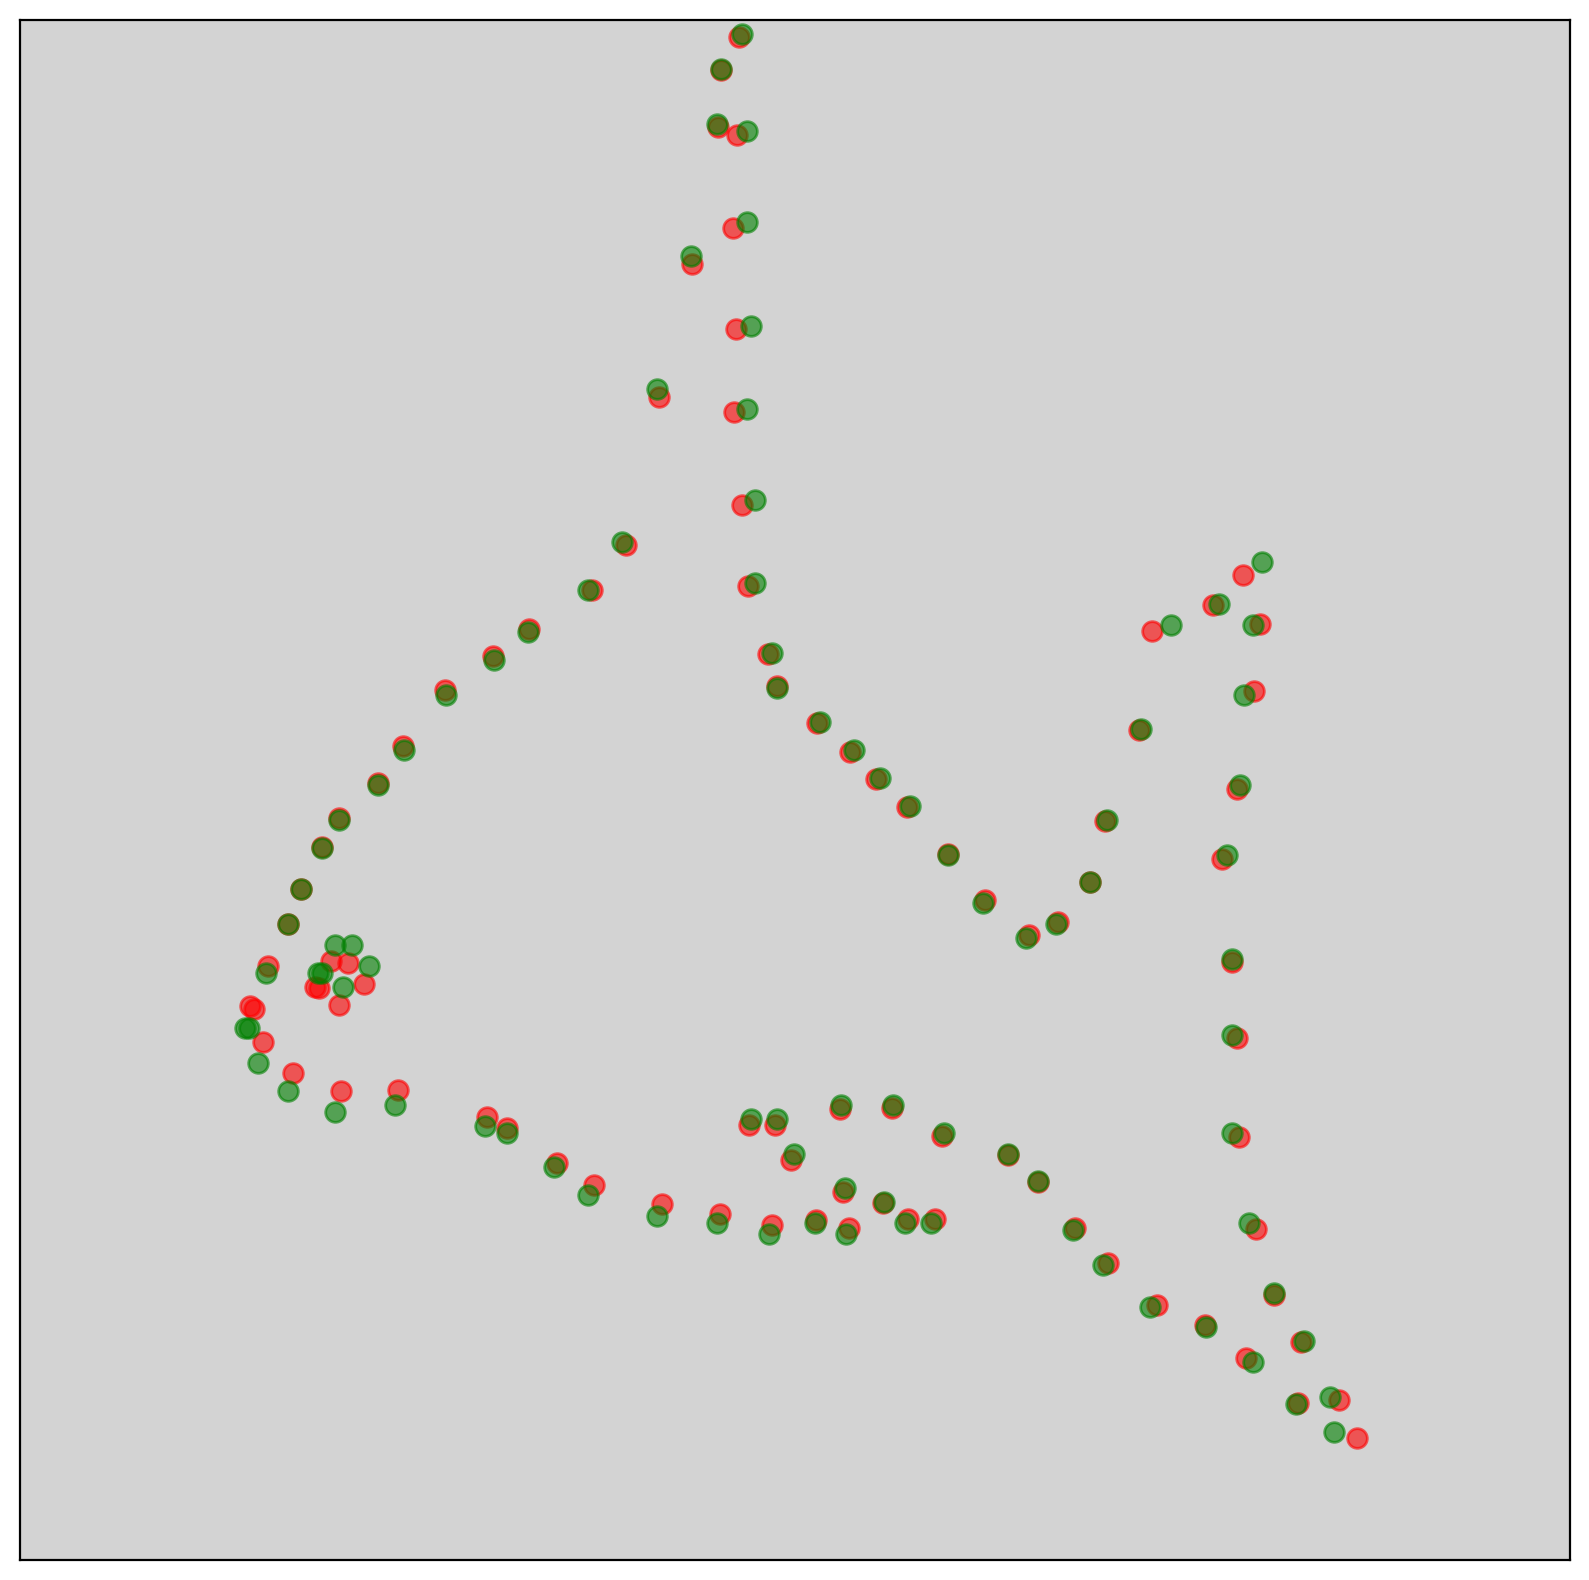

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.10/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is SOT-RBF, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


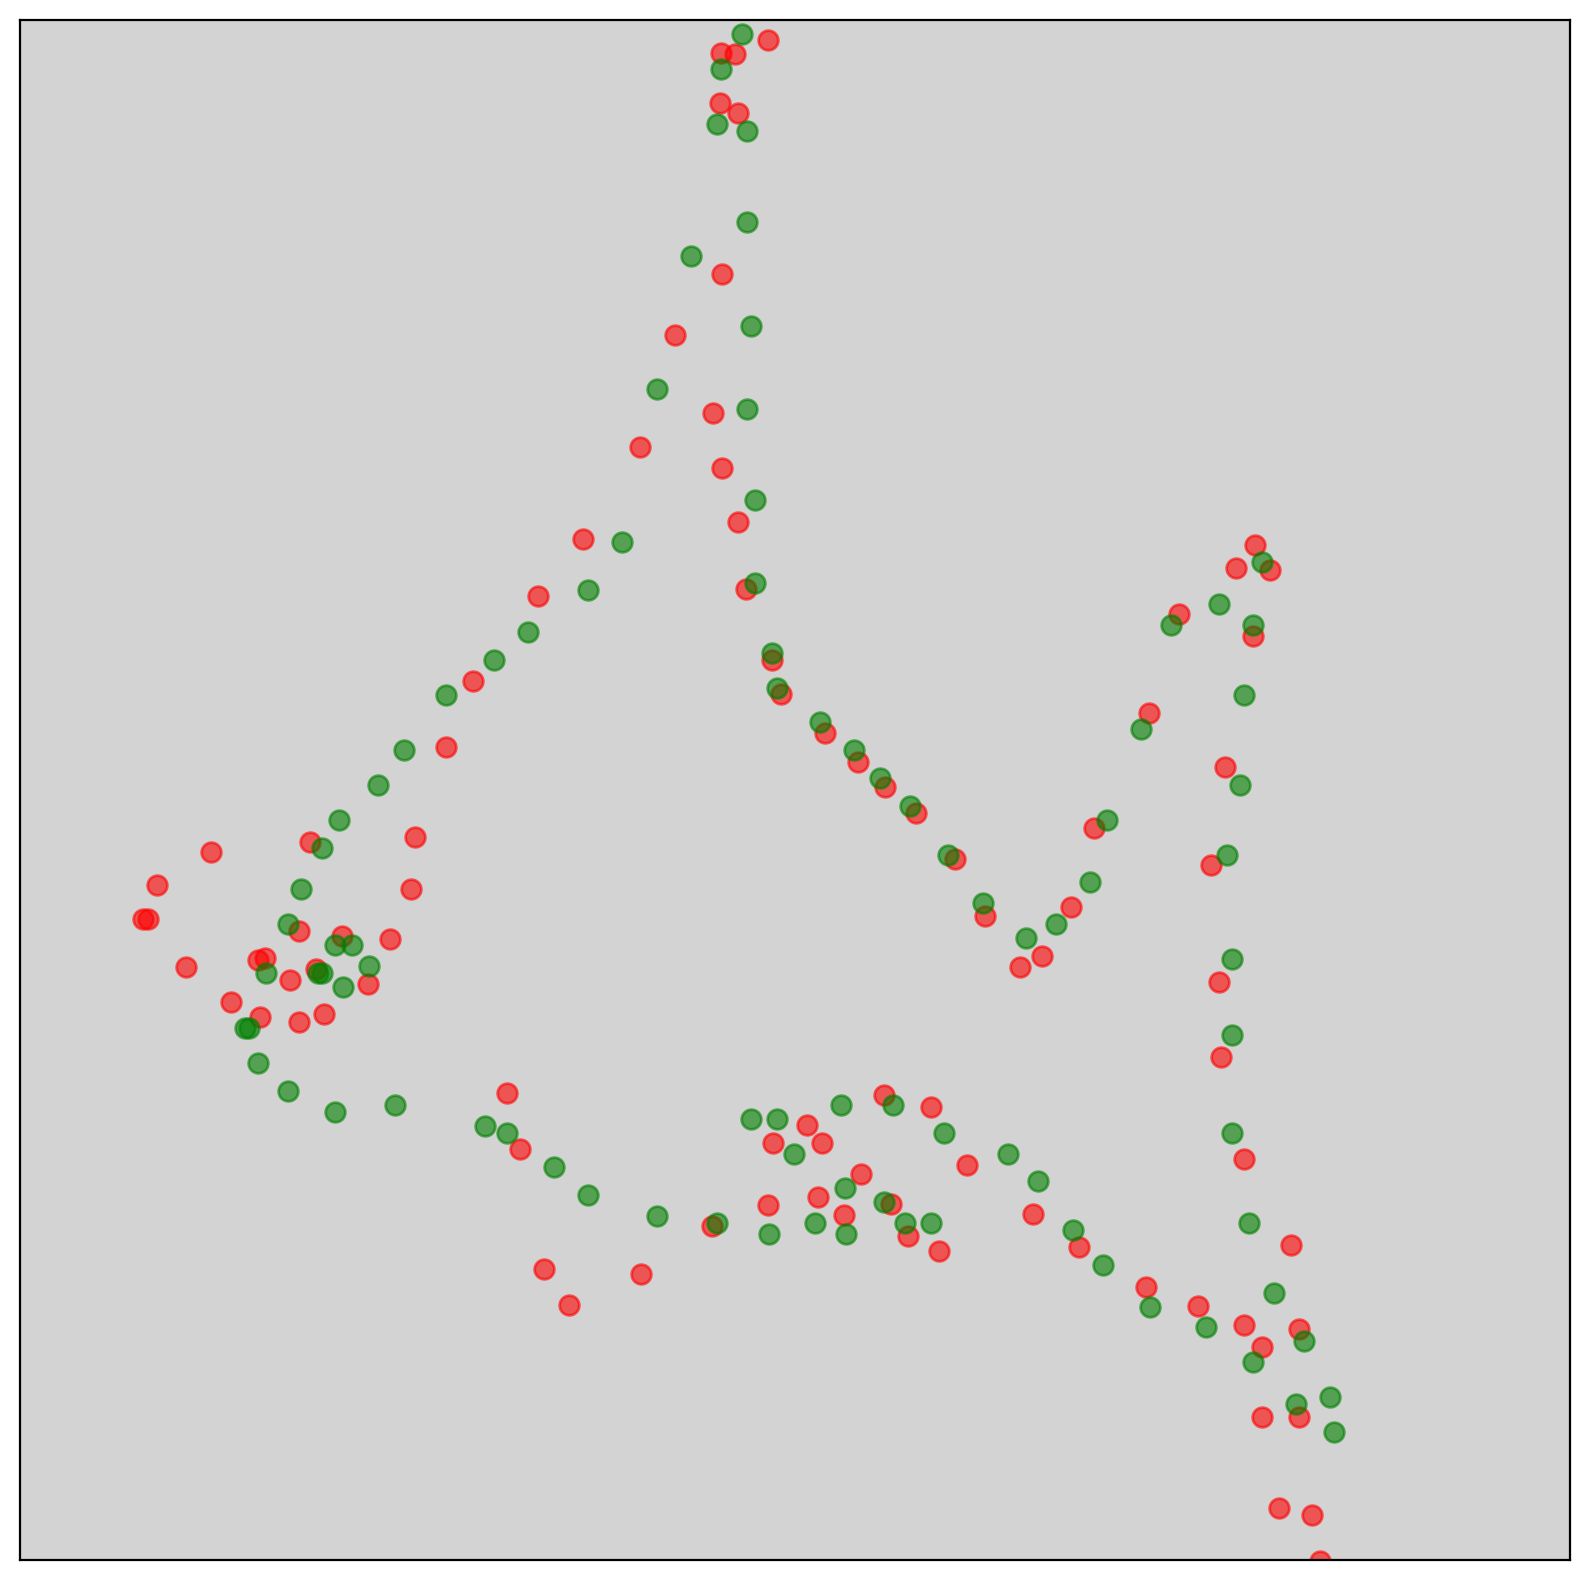

last error is 0.27430641902790753


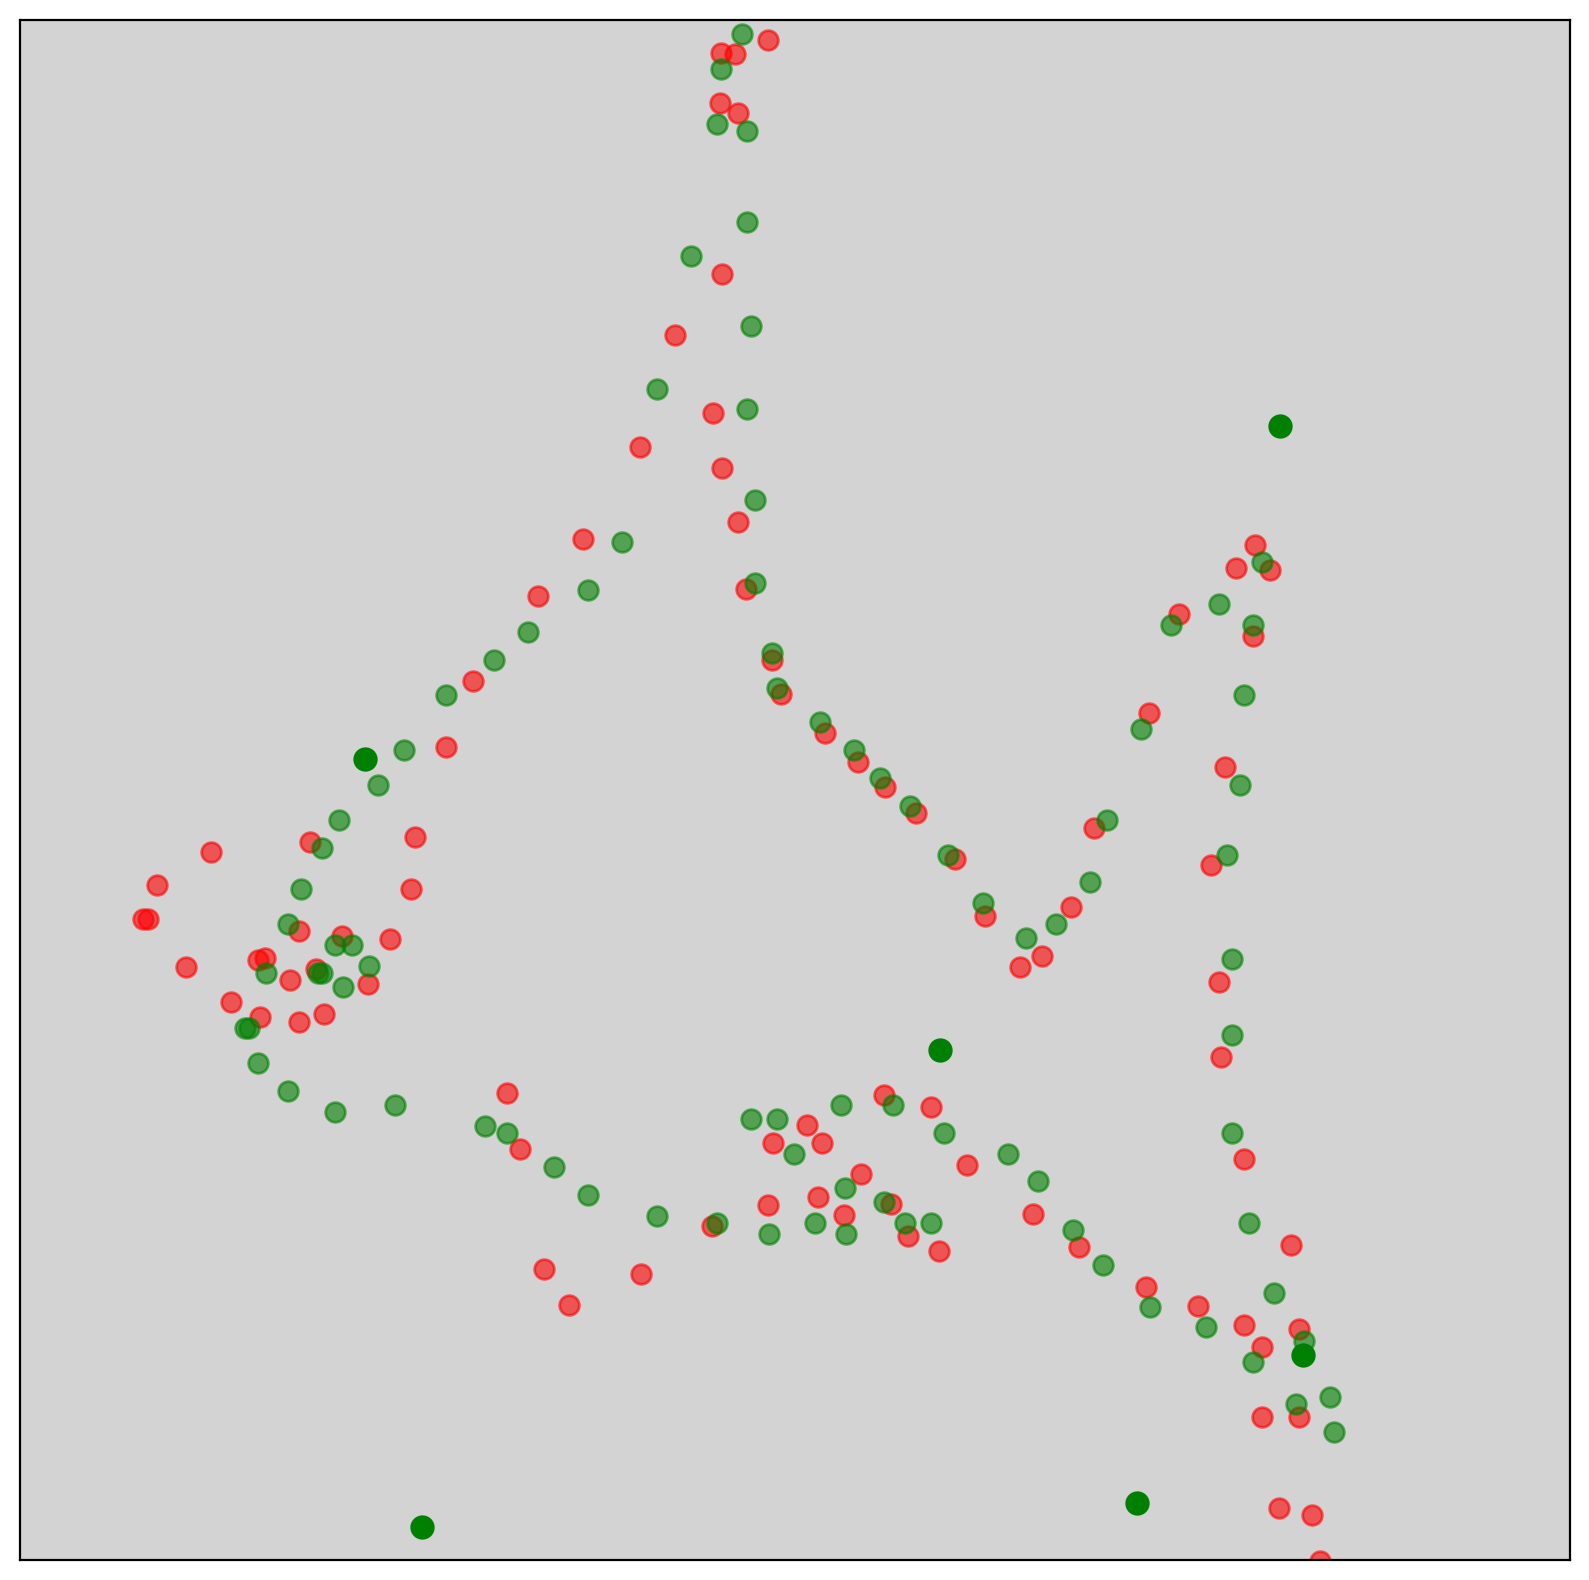

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.20/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is SOT-RBF, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


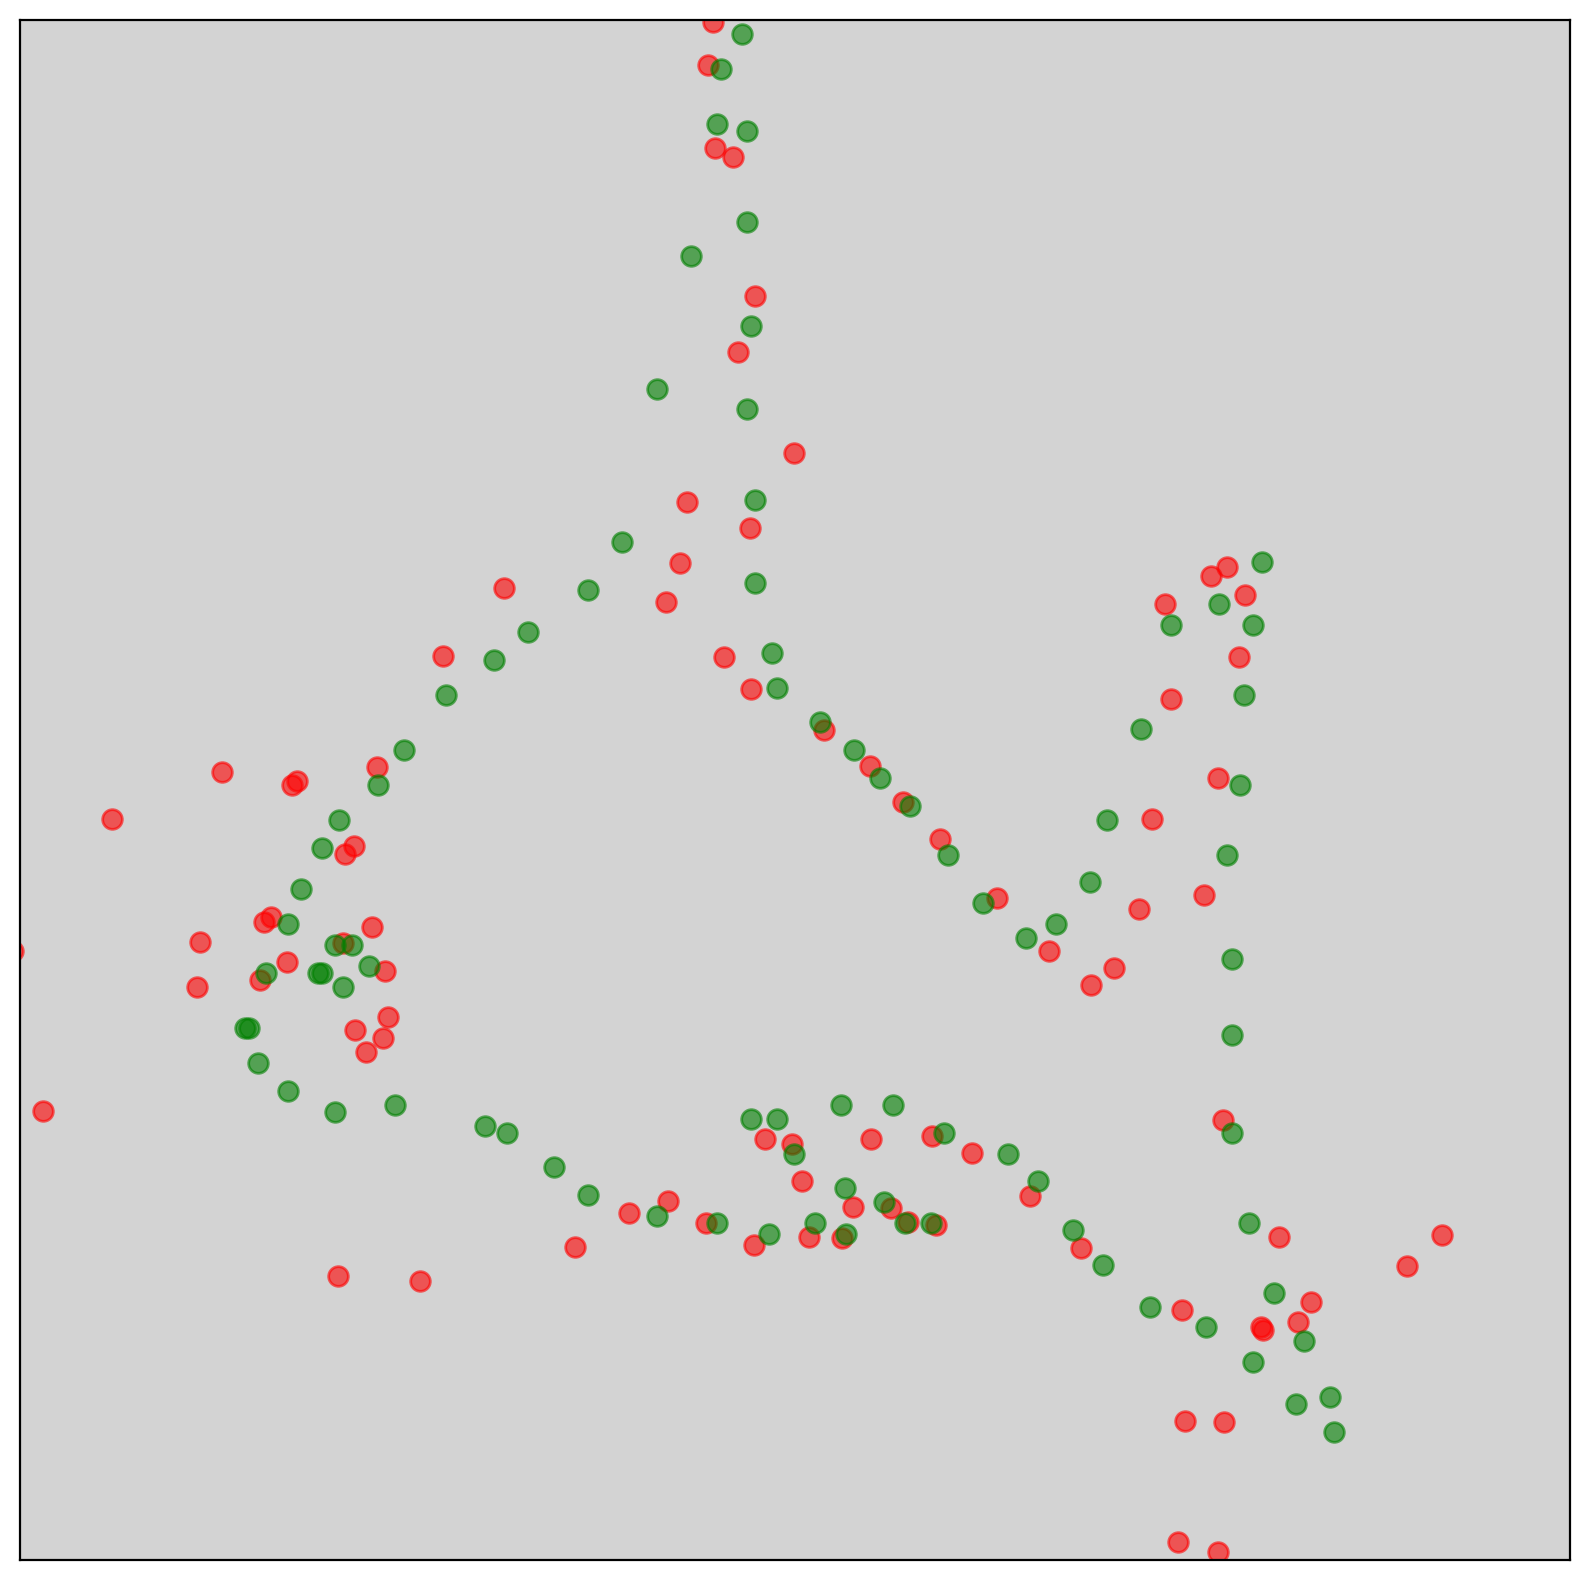

last error is 0.4157205412159221


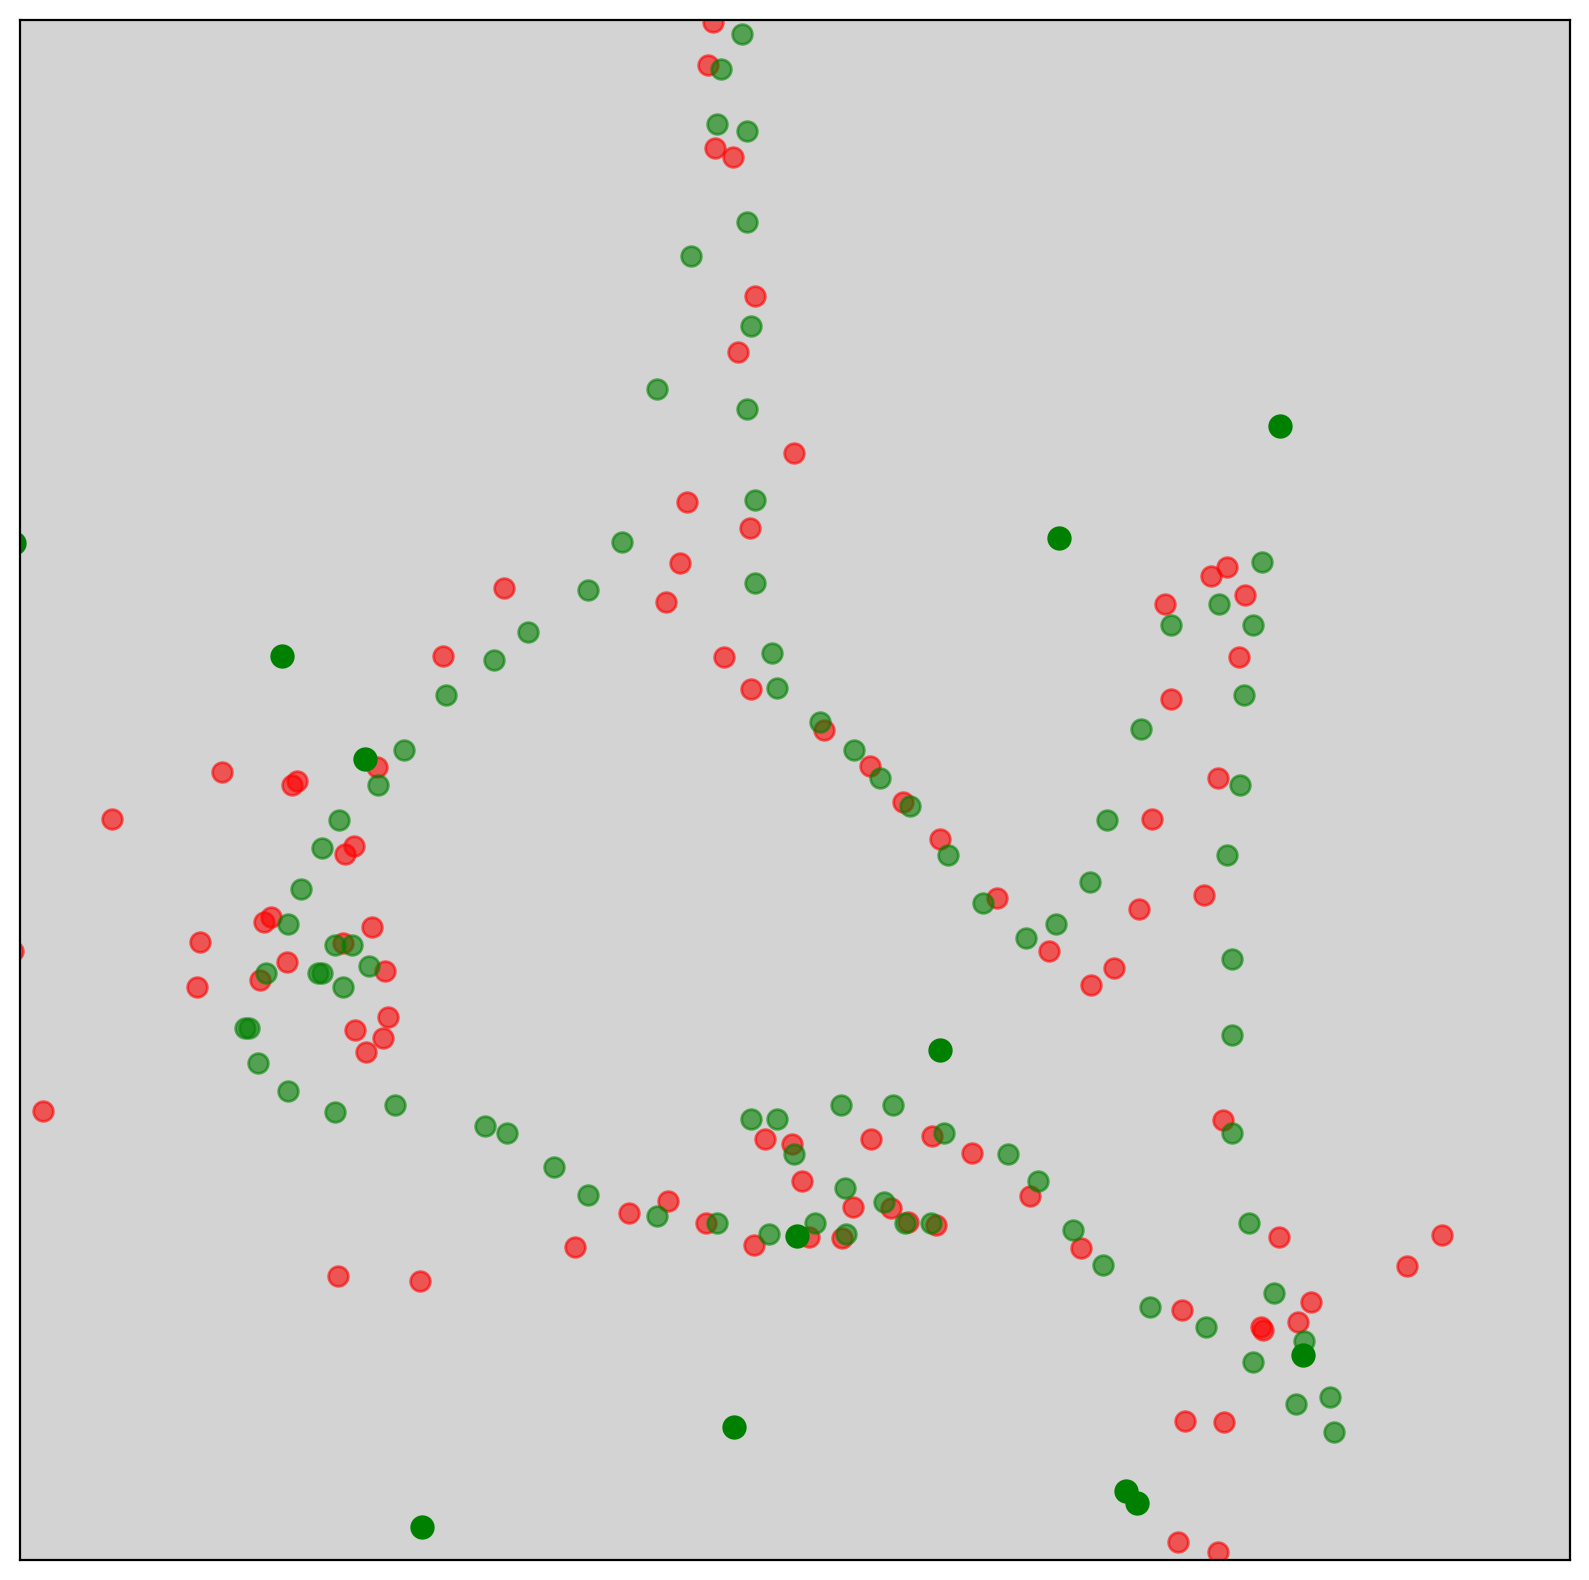

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.30/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is SOT-RBF, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


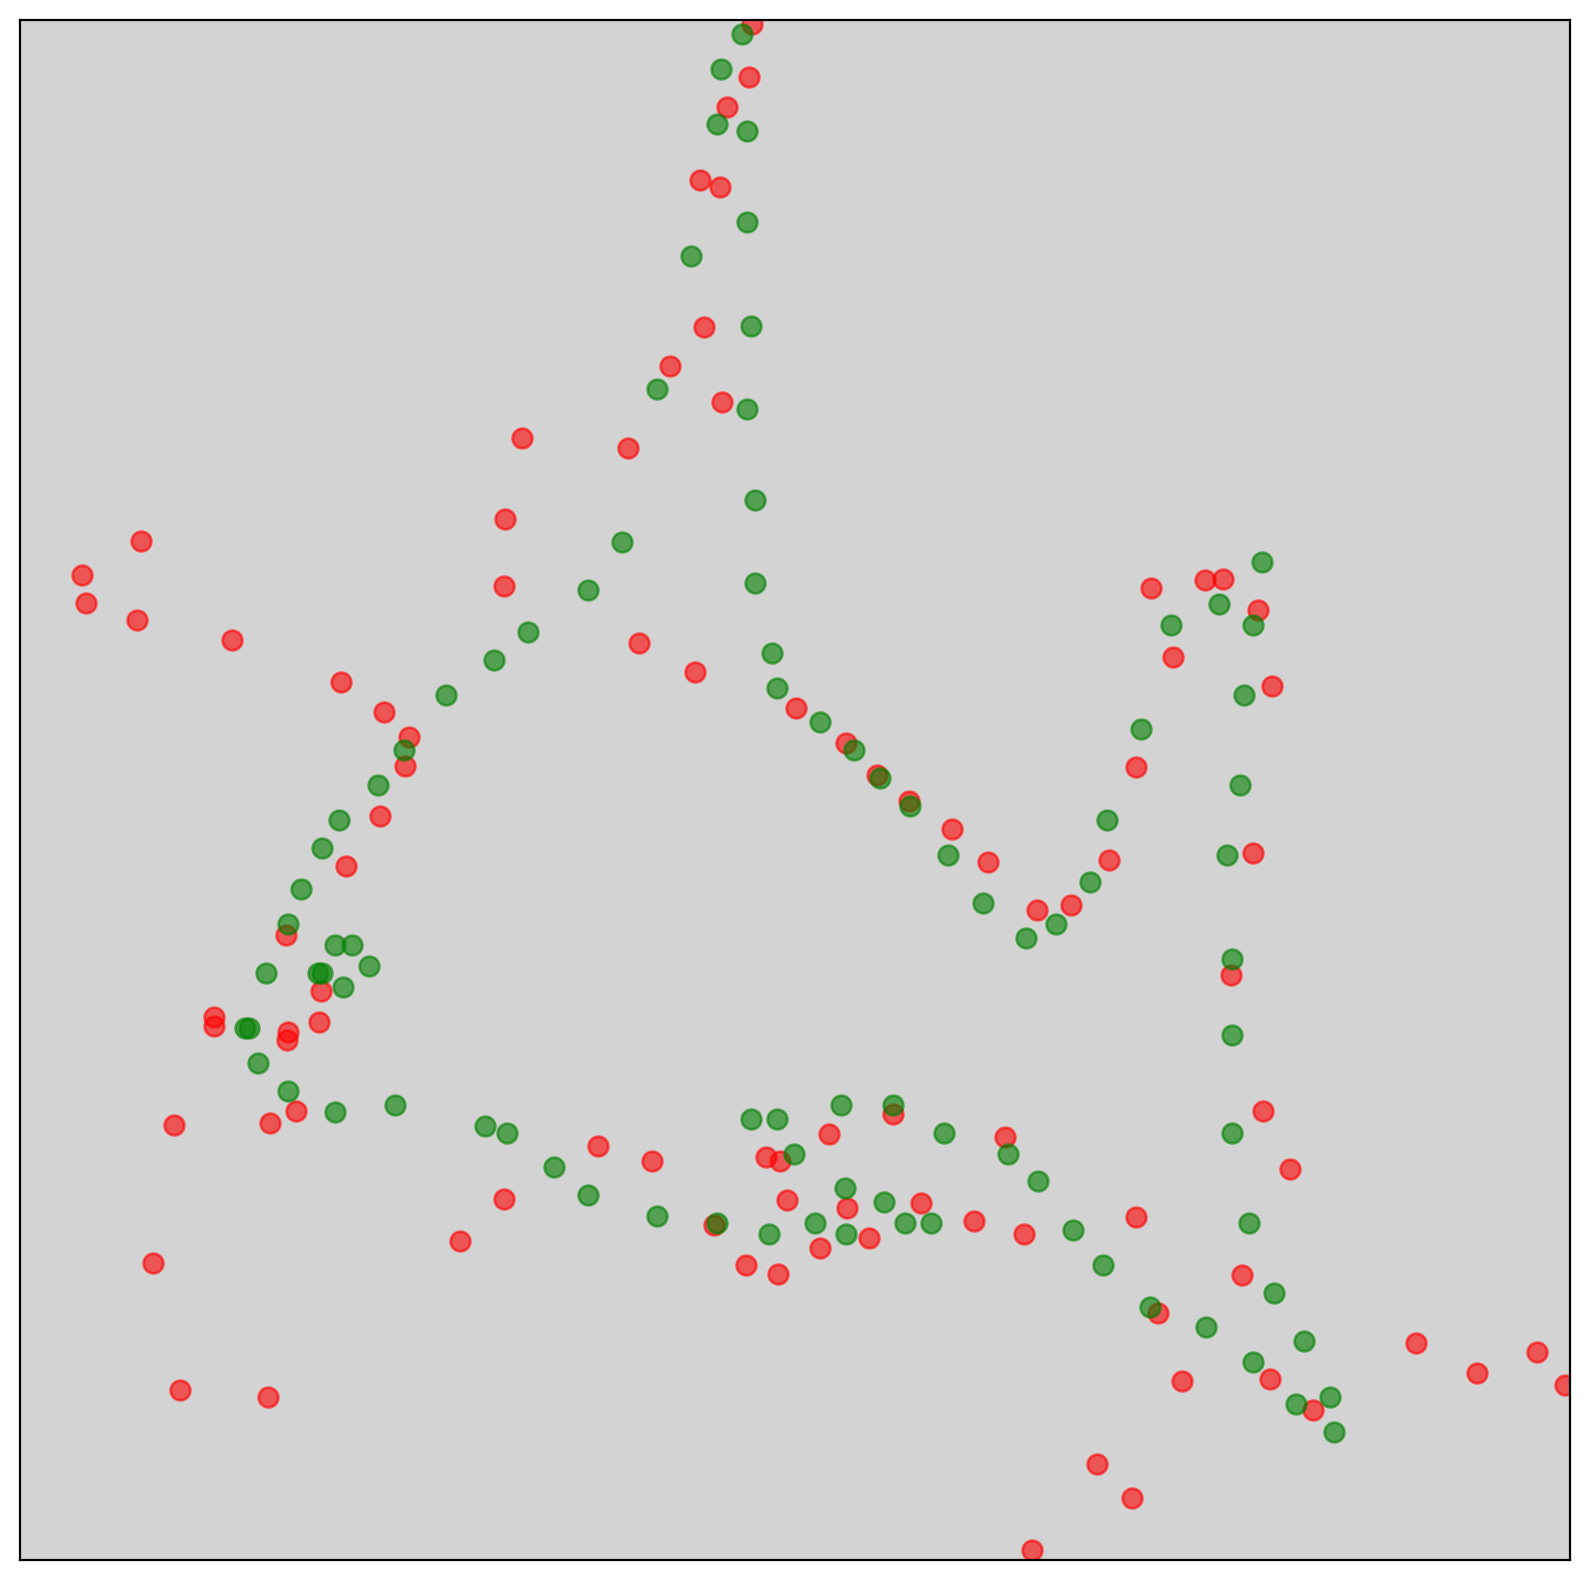

last error is 0.4488443380675282


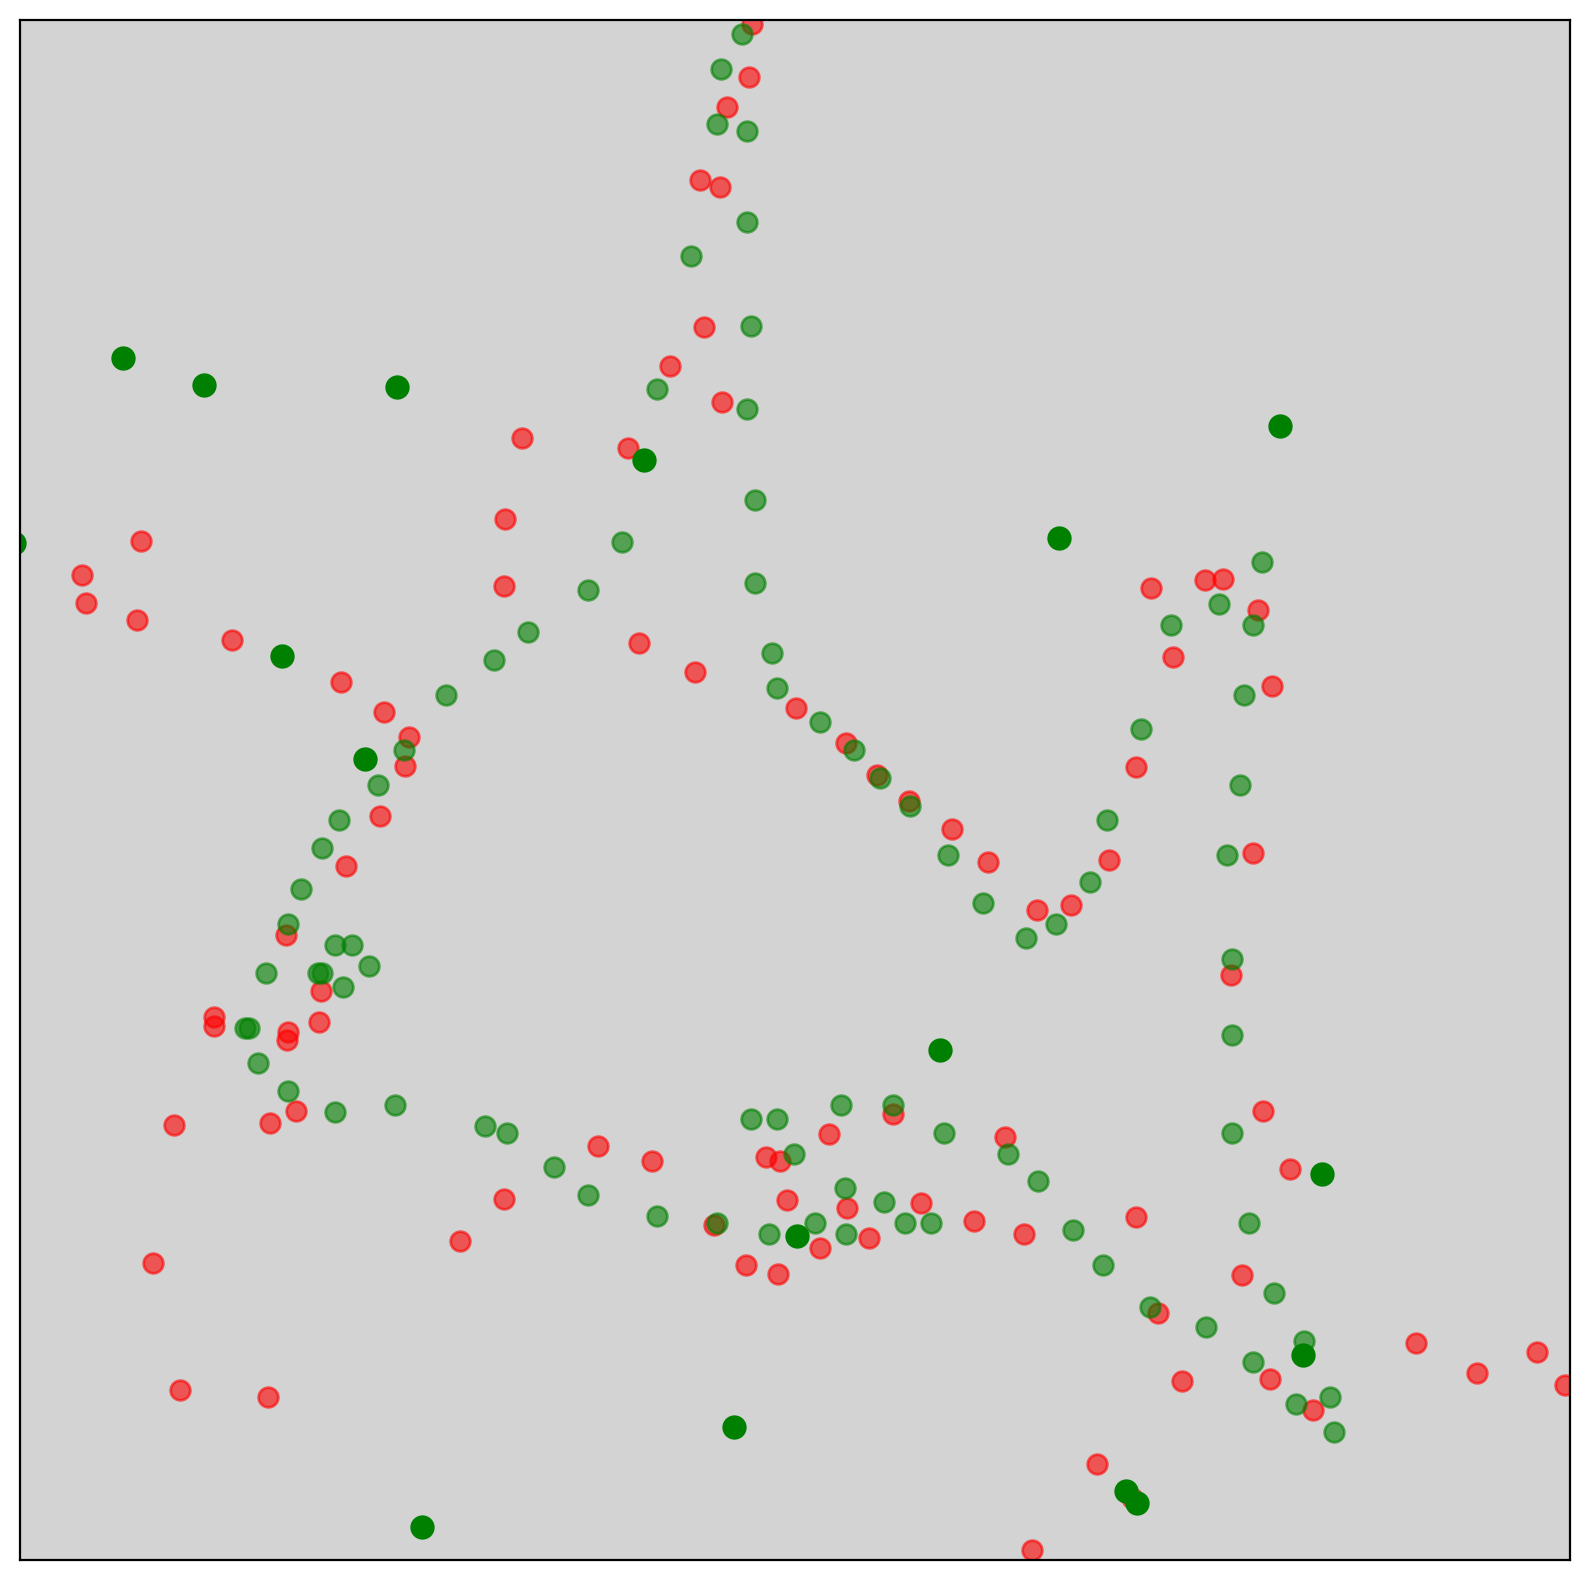

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.00/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is SOT-TPS, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


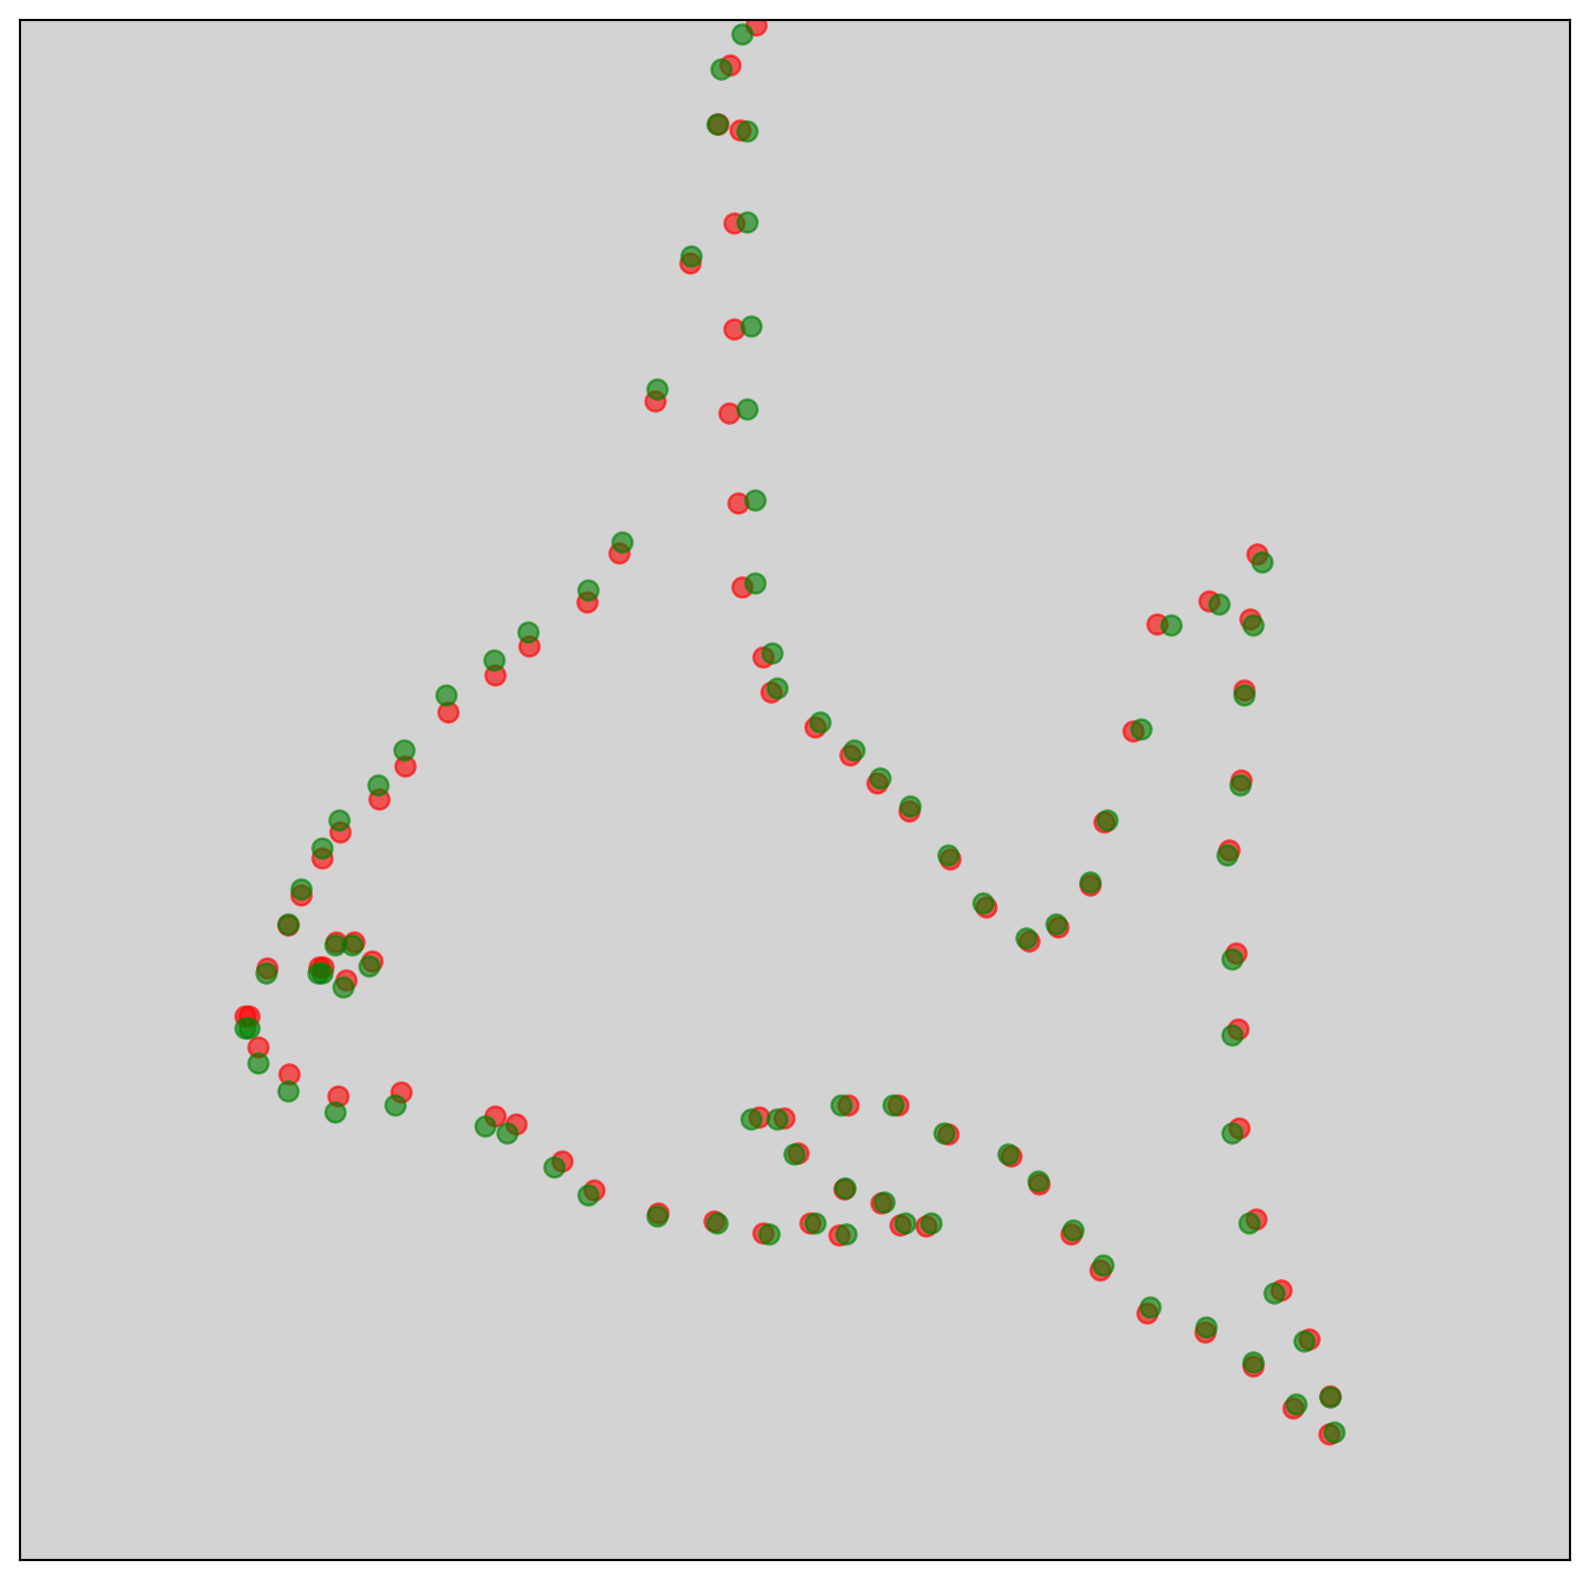

last error is 0.03089802309795201


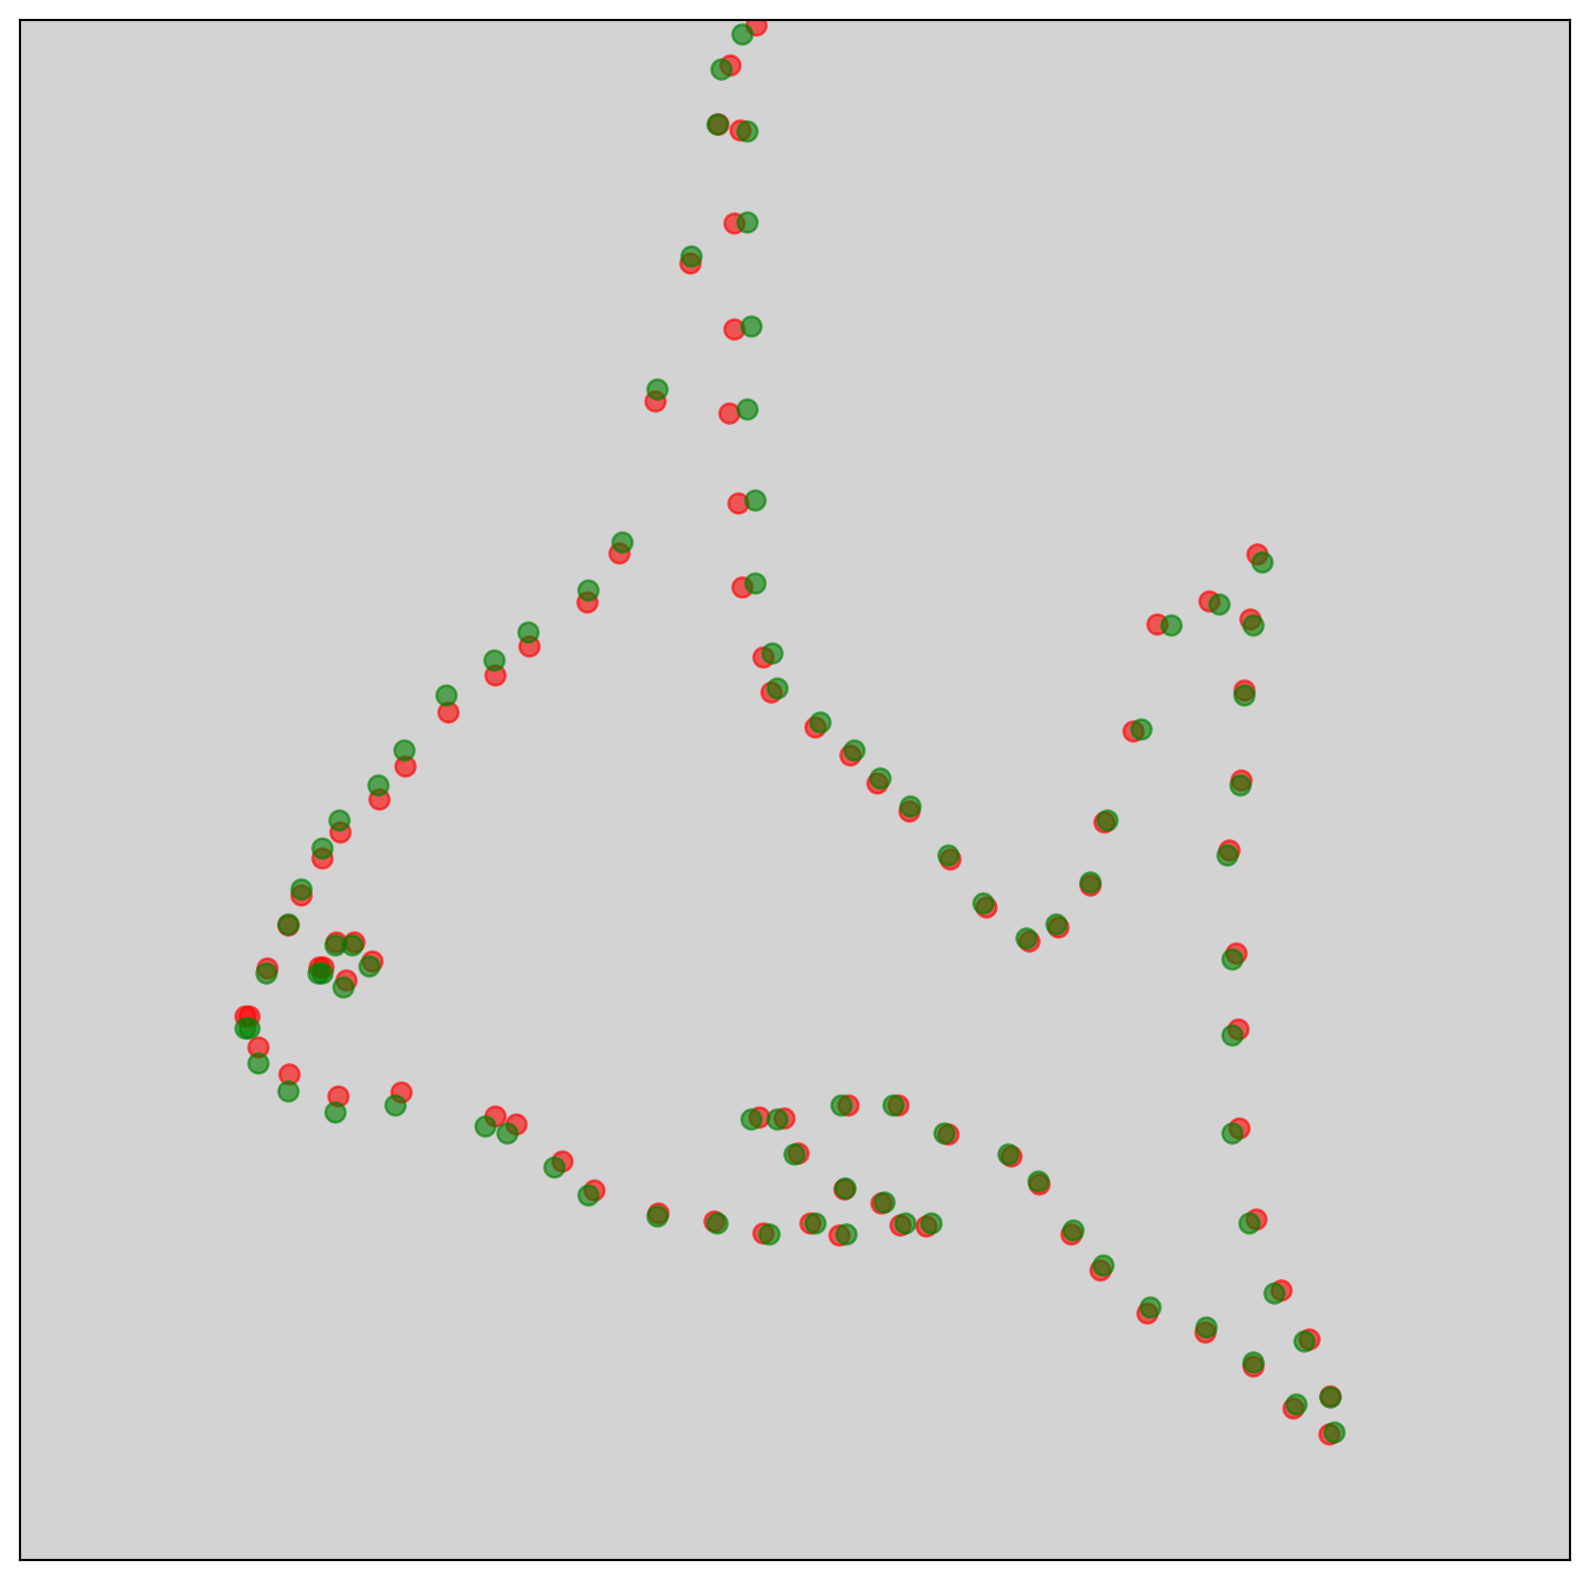

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.10/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is SOT-TPS, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


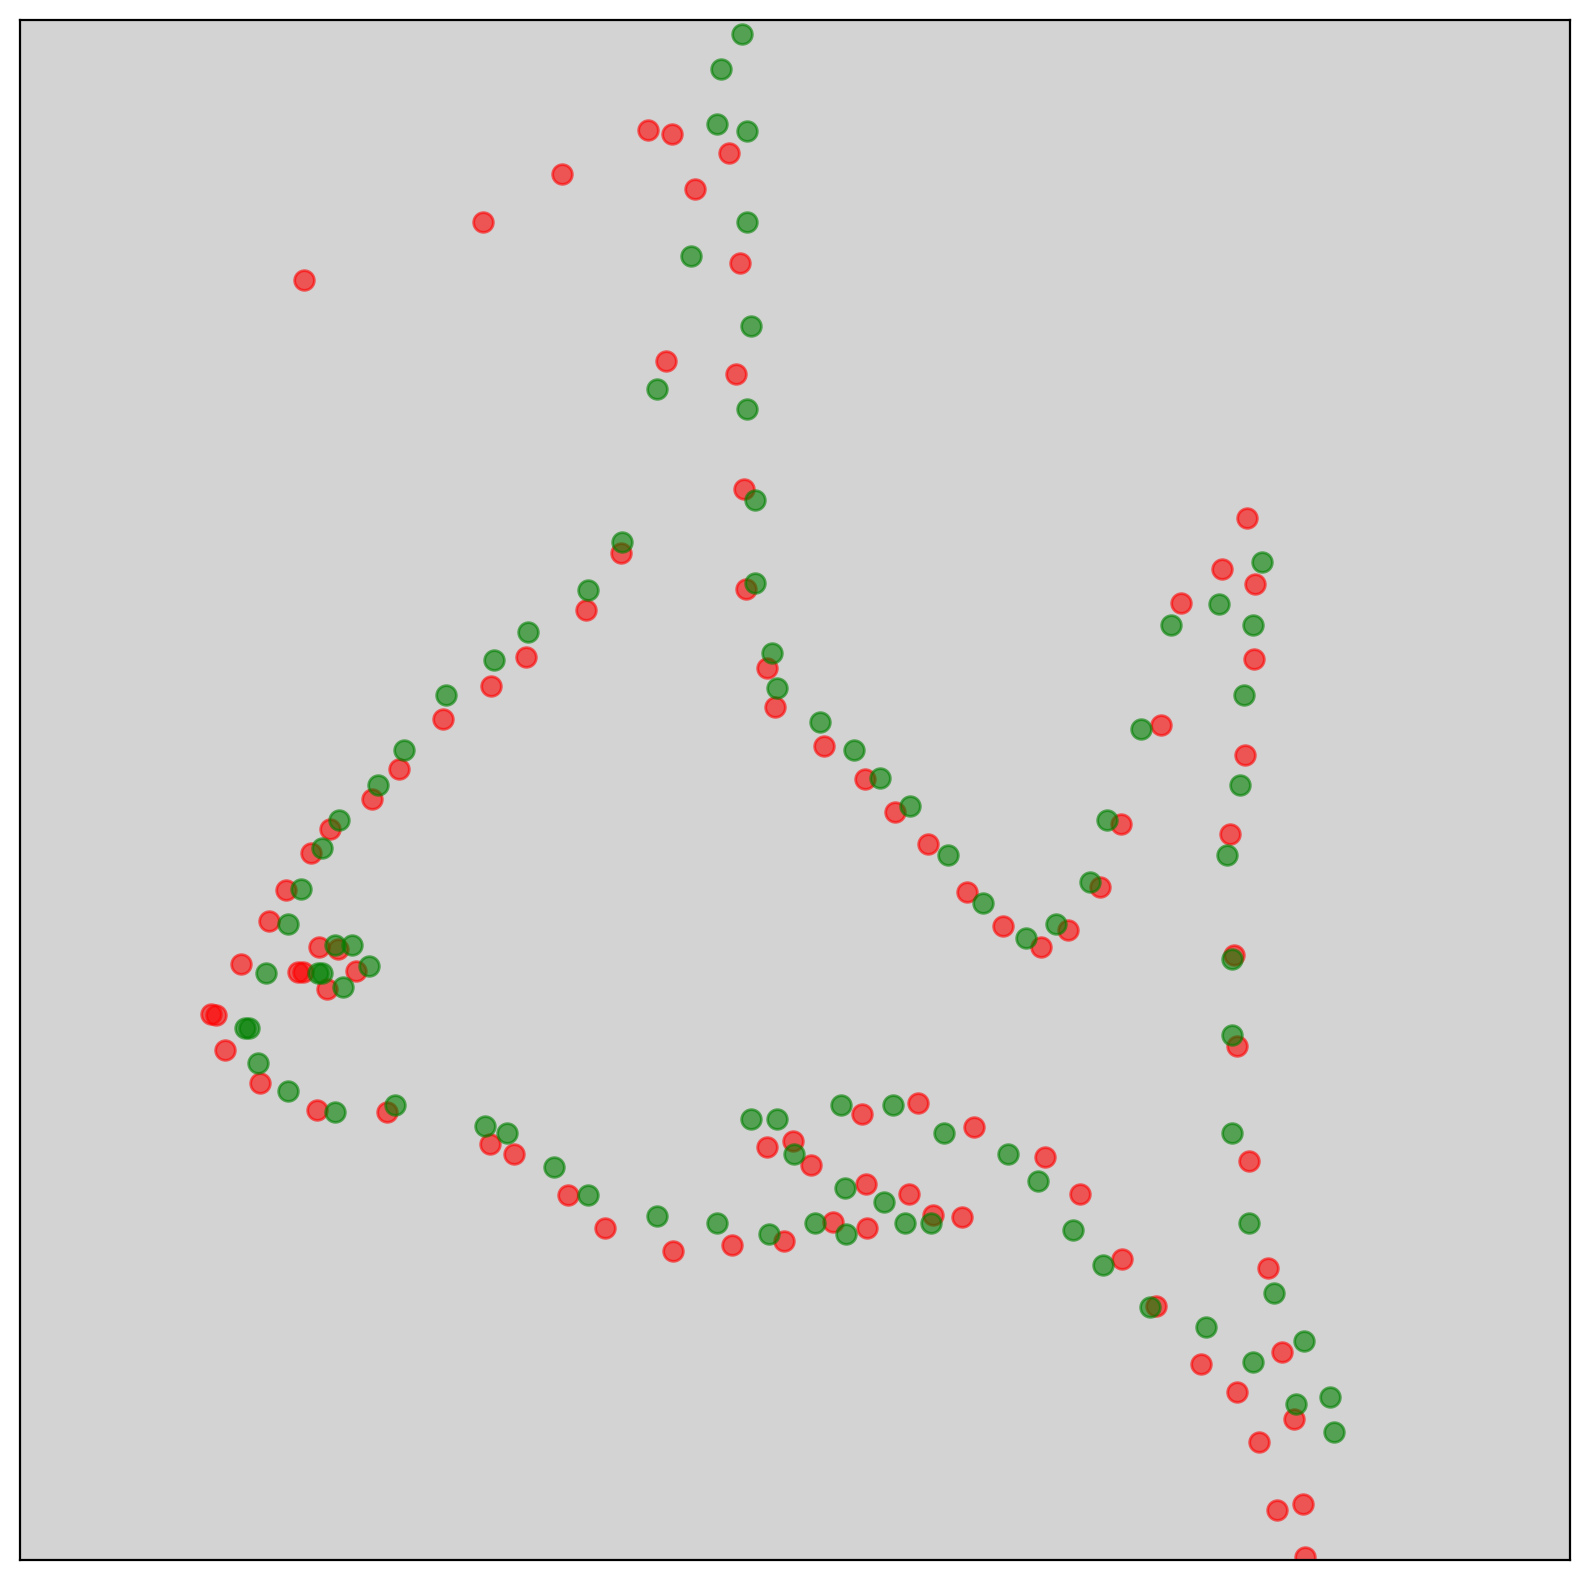

last error is 0.2341019338150061


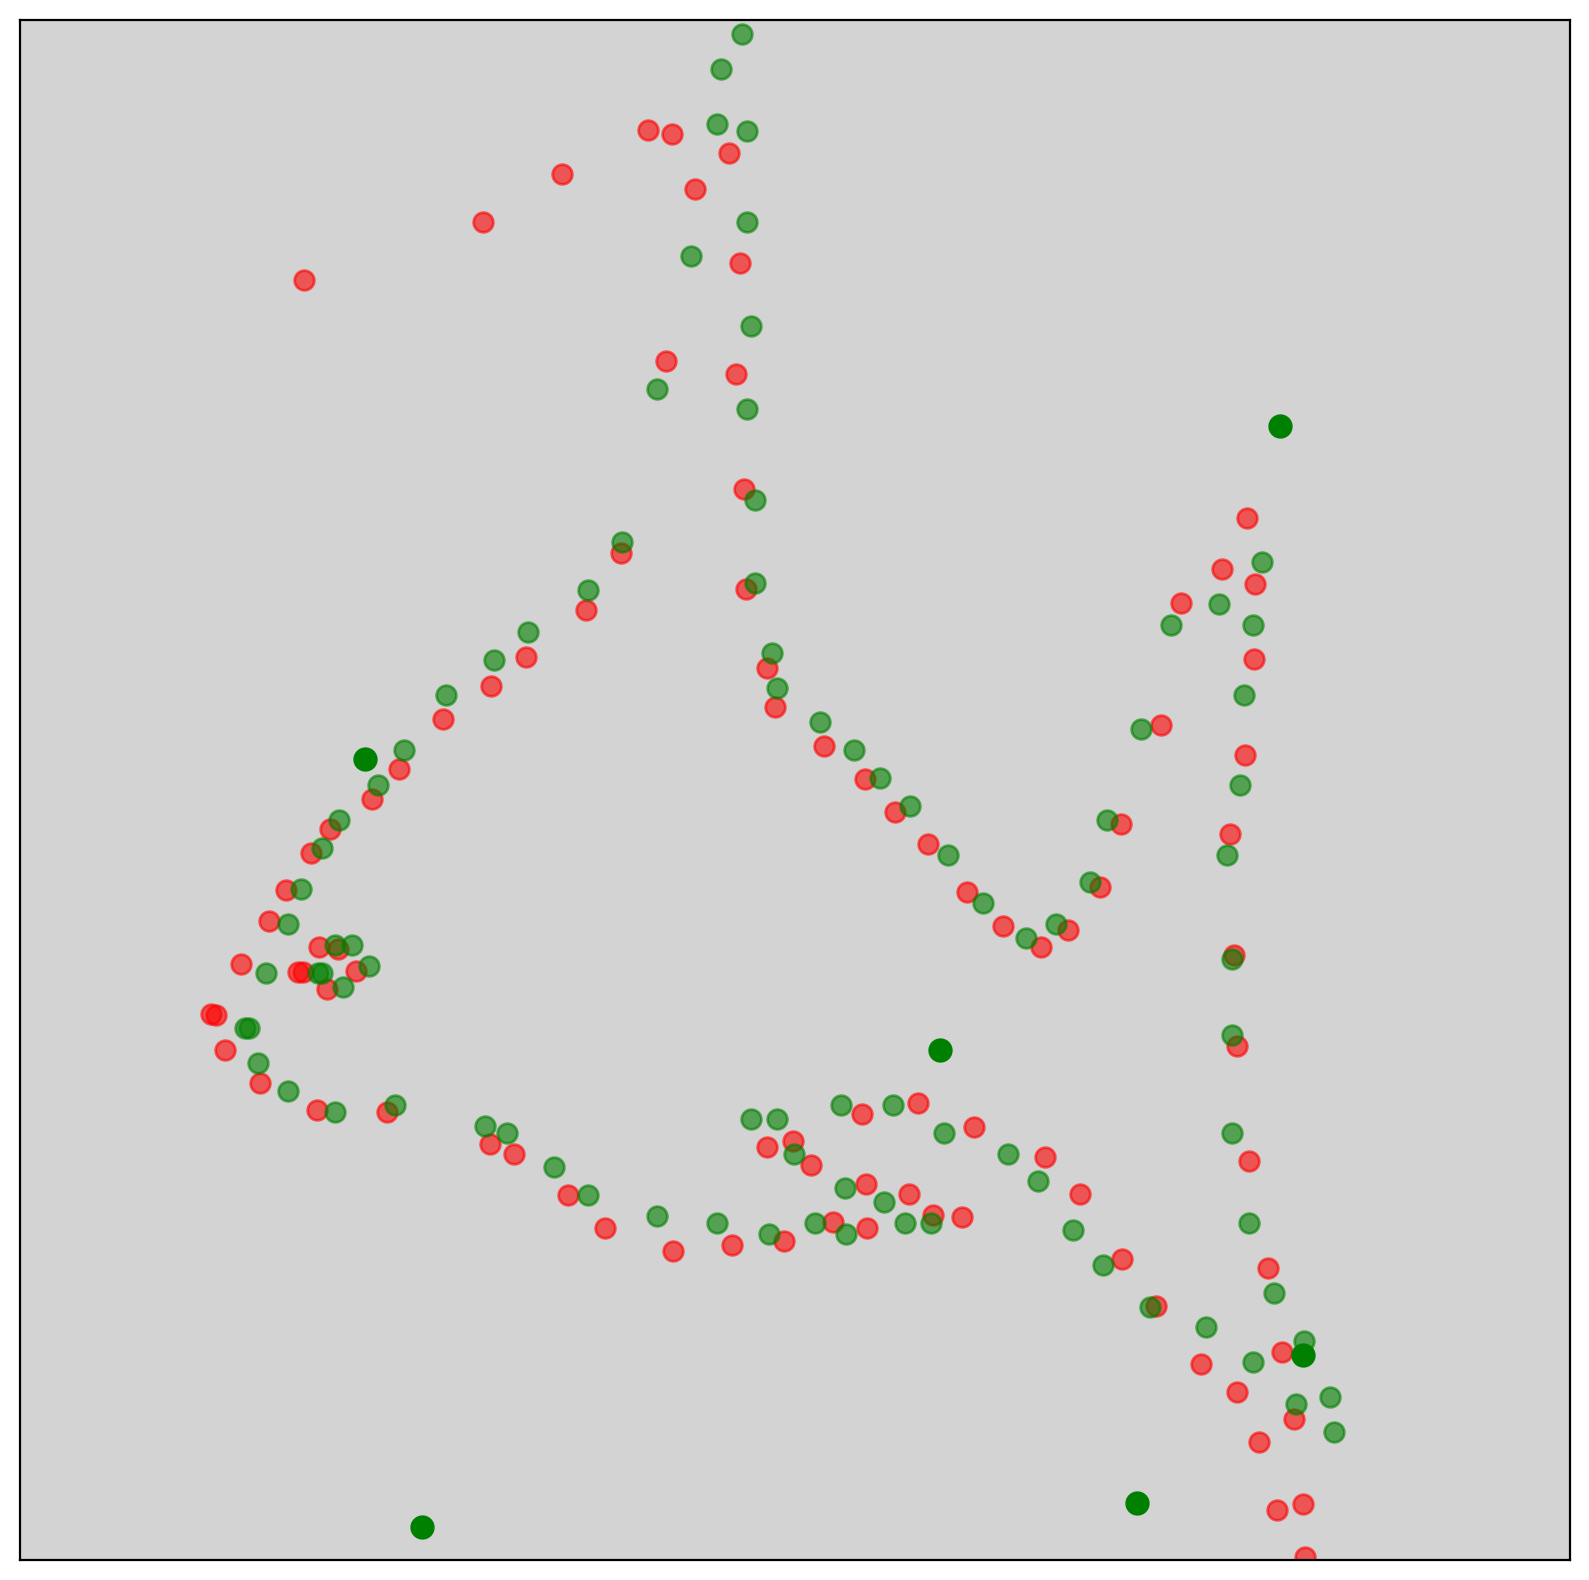

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.20/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is SOT-TPS, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


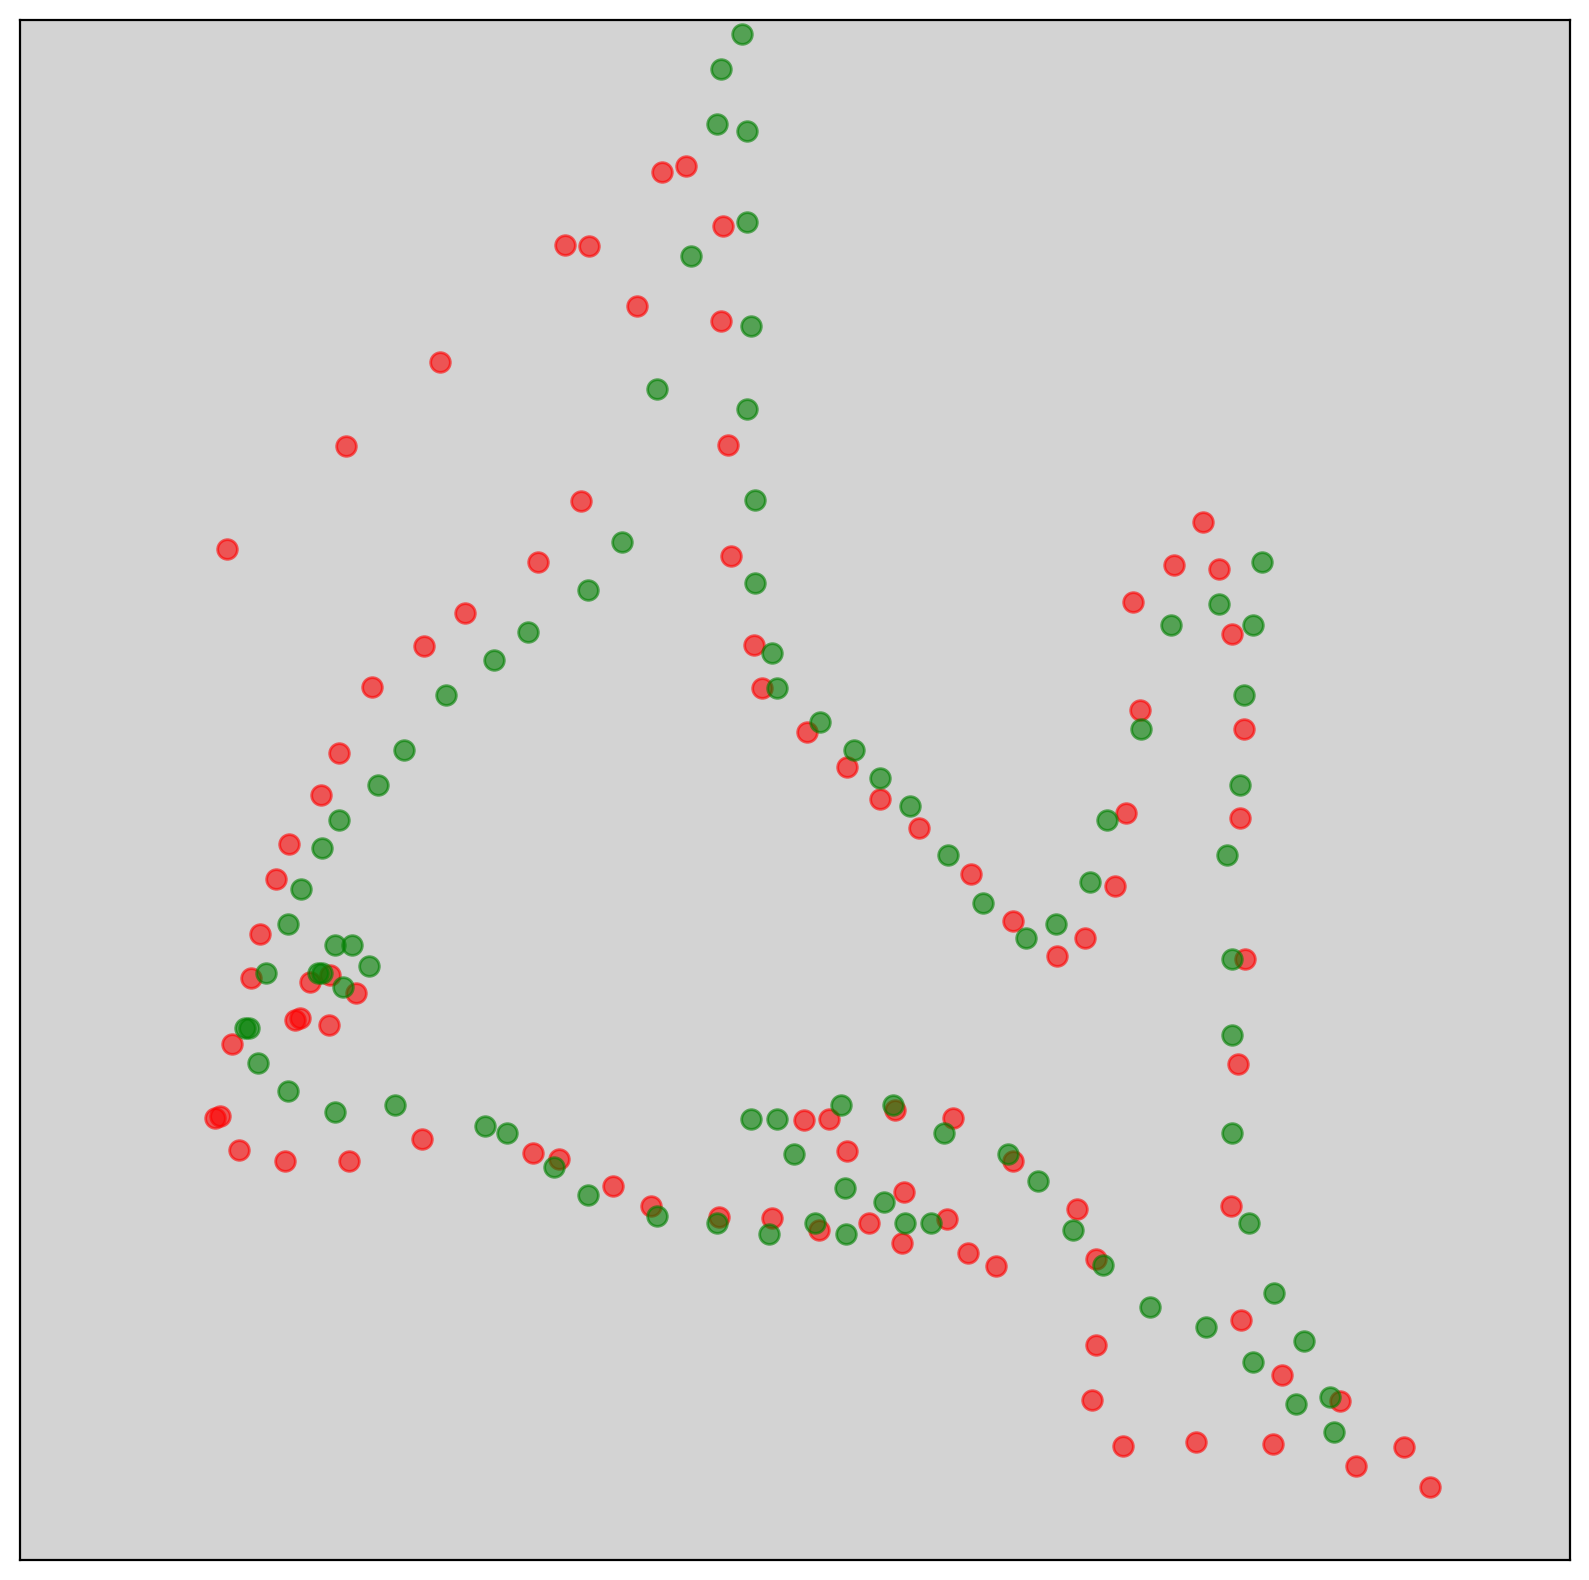

last error is 0.39216421482518155


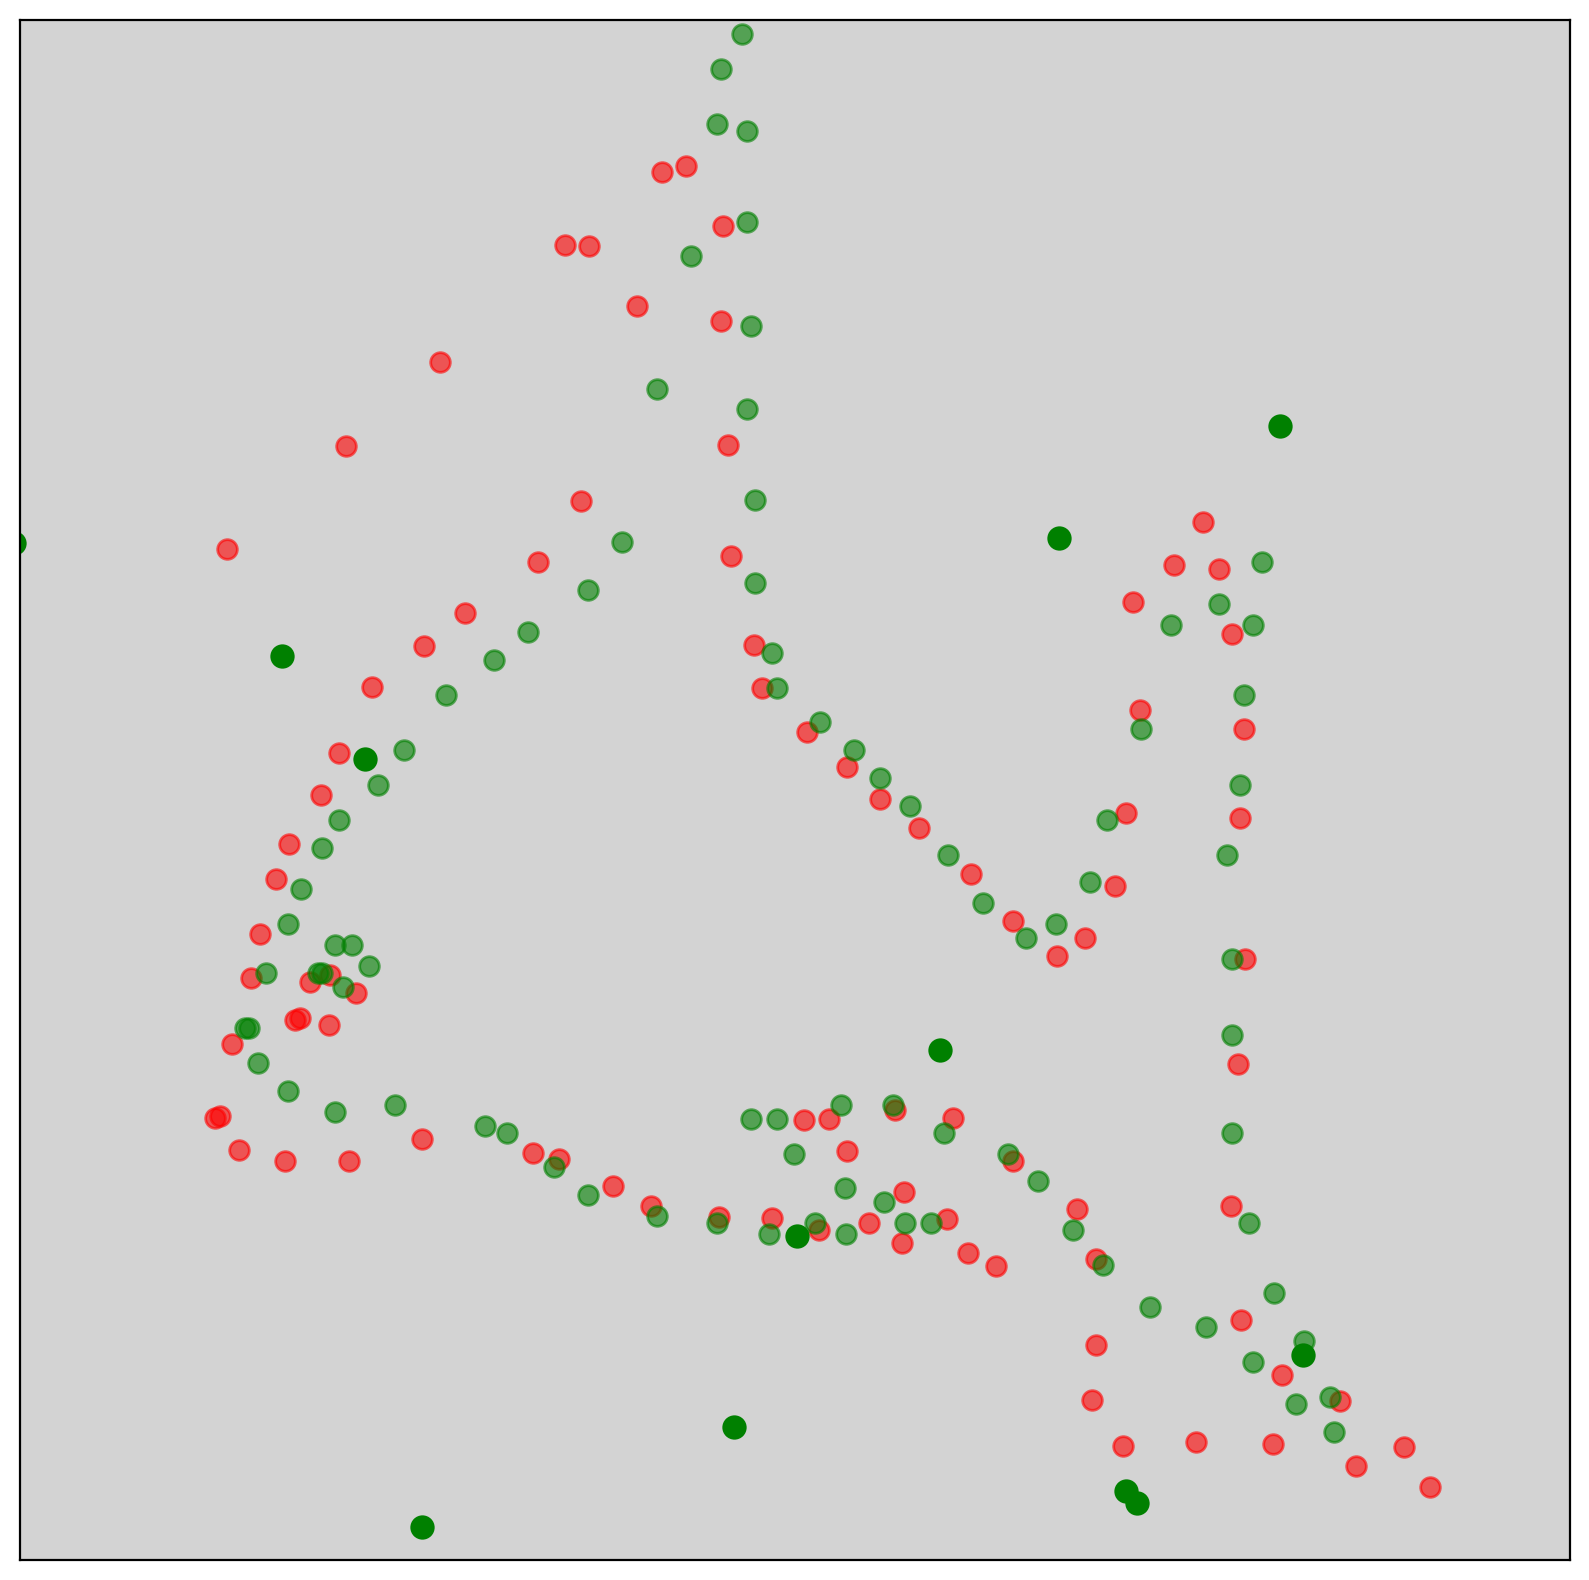

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.30/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is SOT-TPS, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


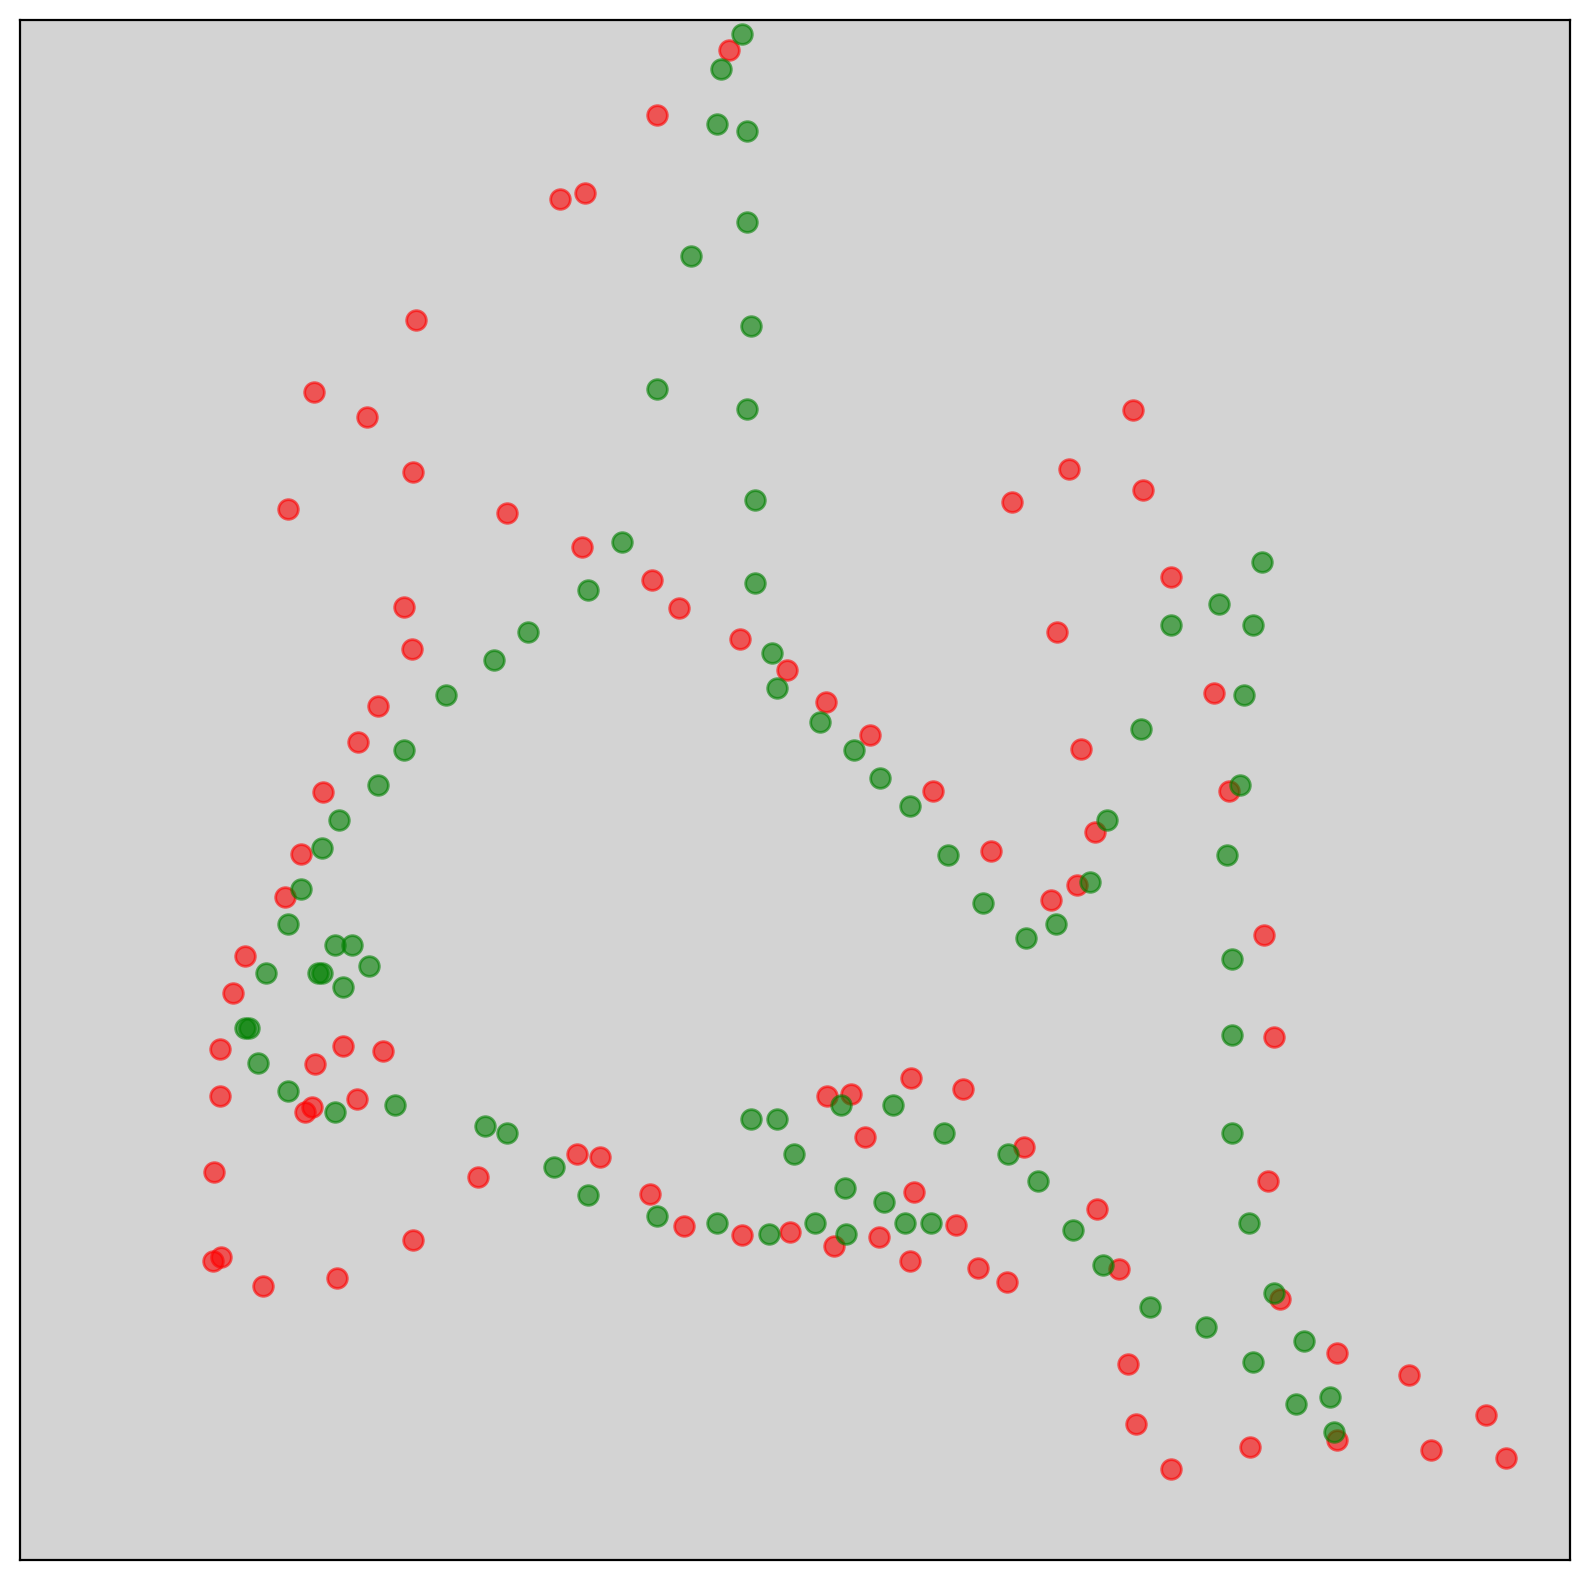

last error is 0.4563897249068404


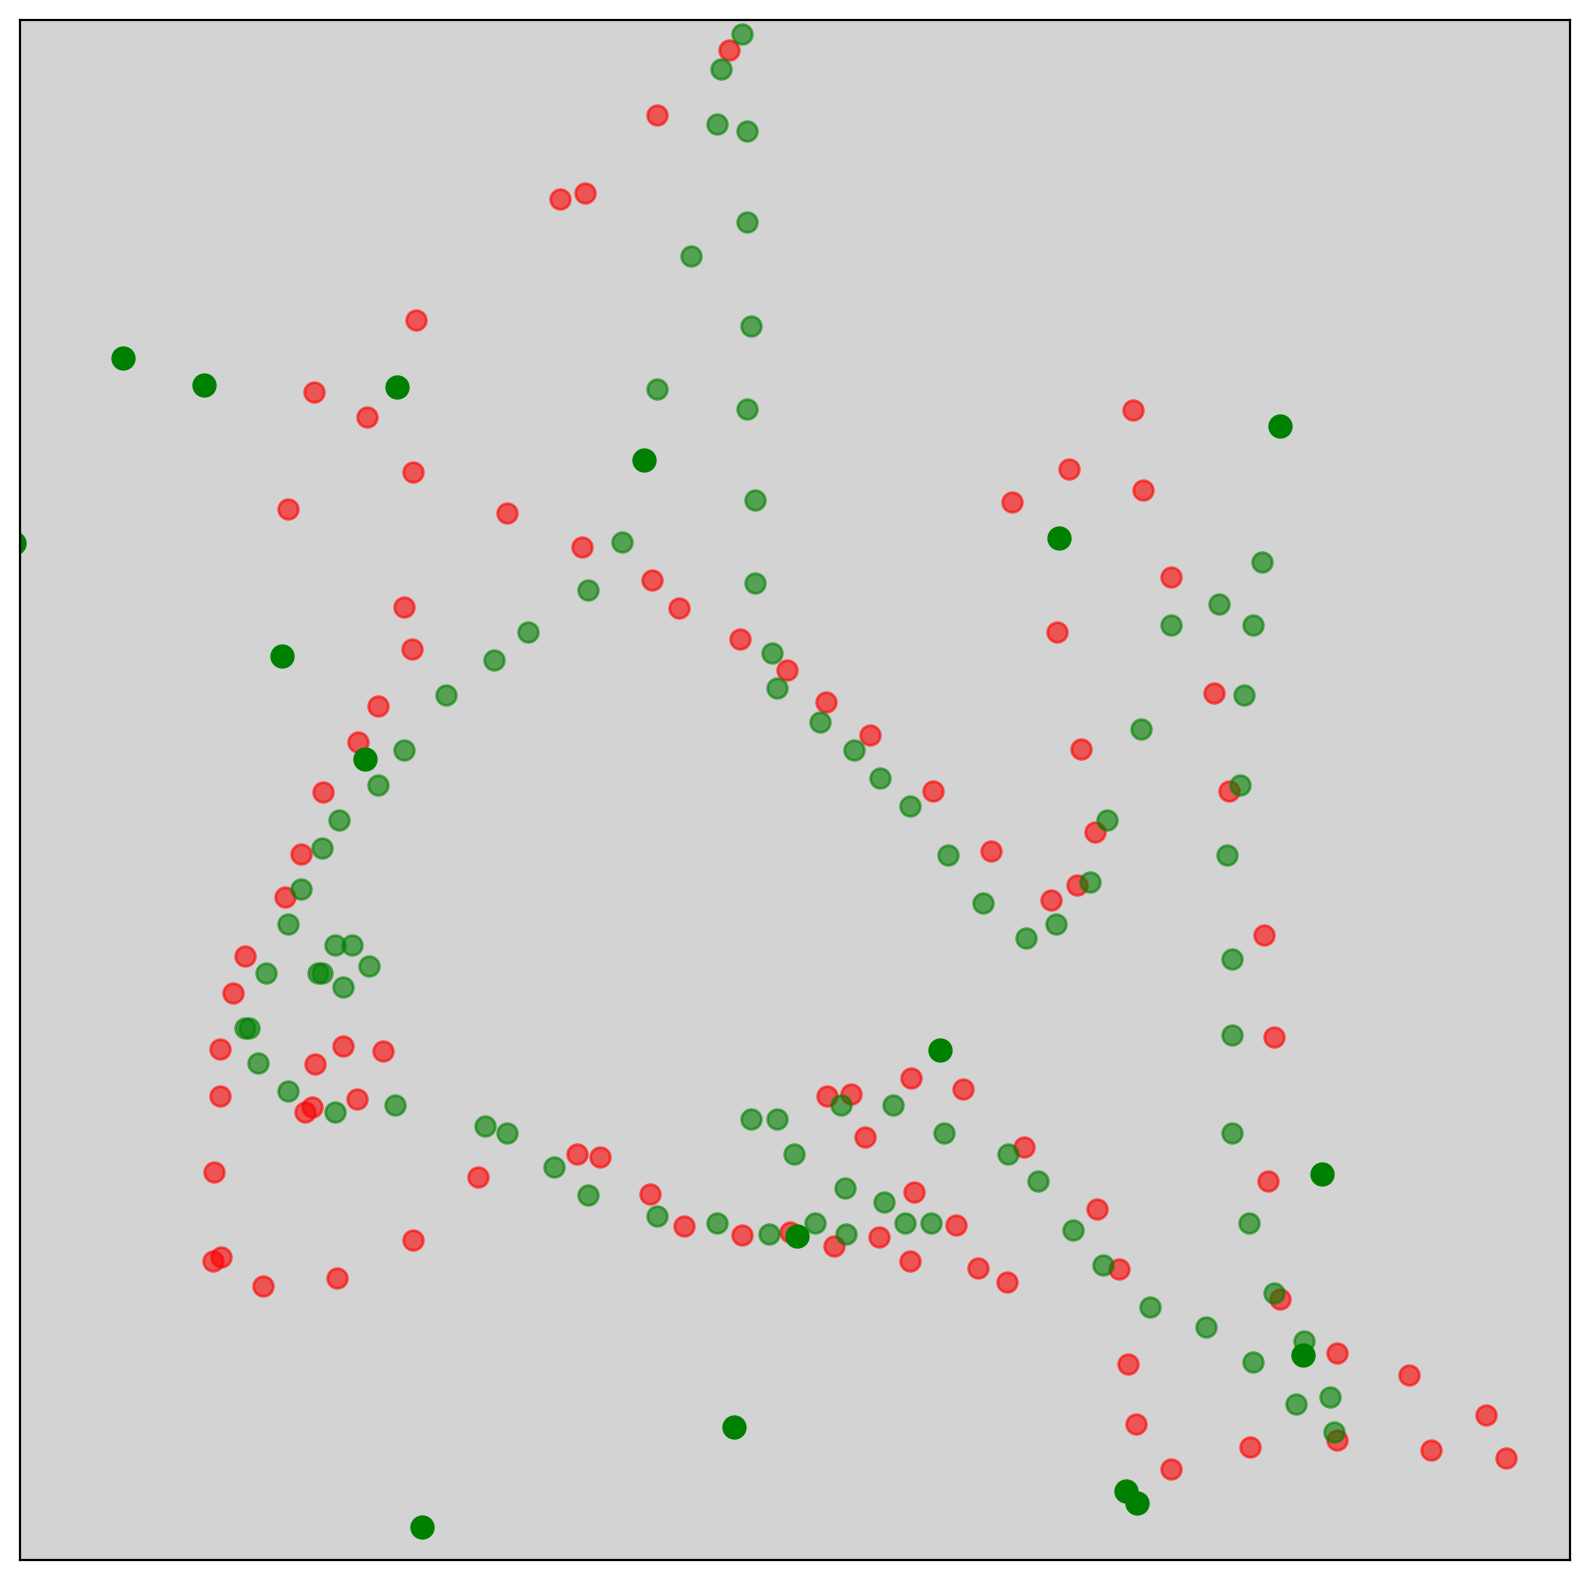

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.00/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is TPS-RPM, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


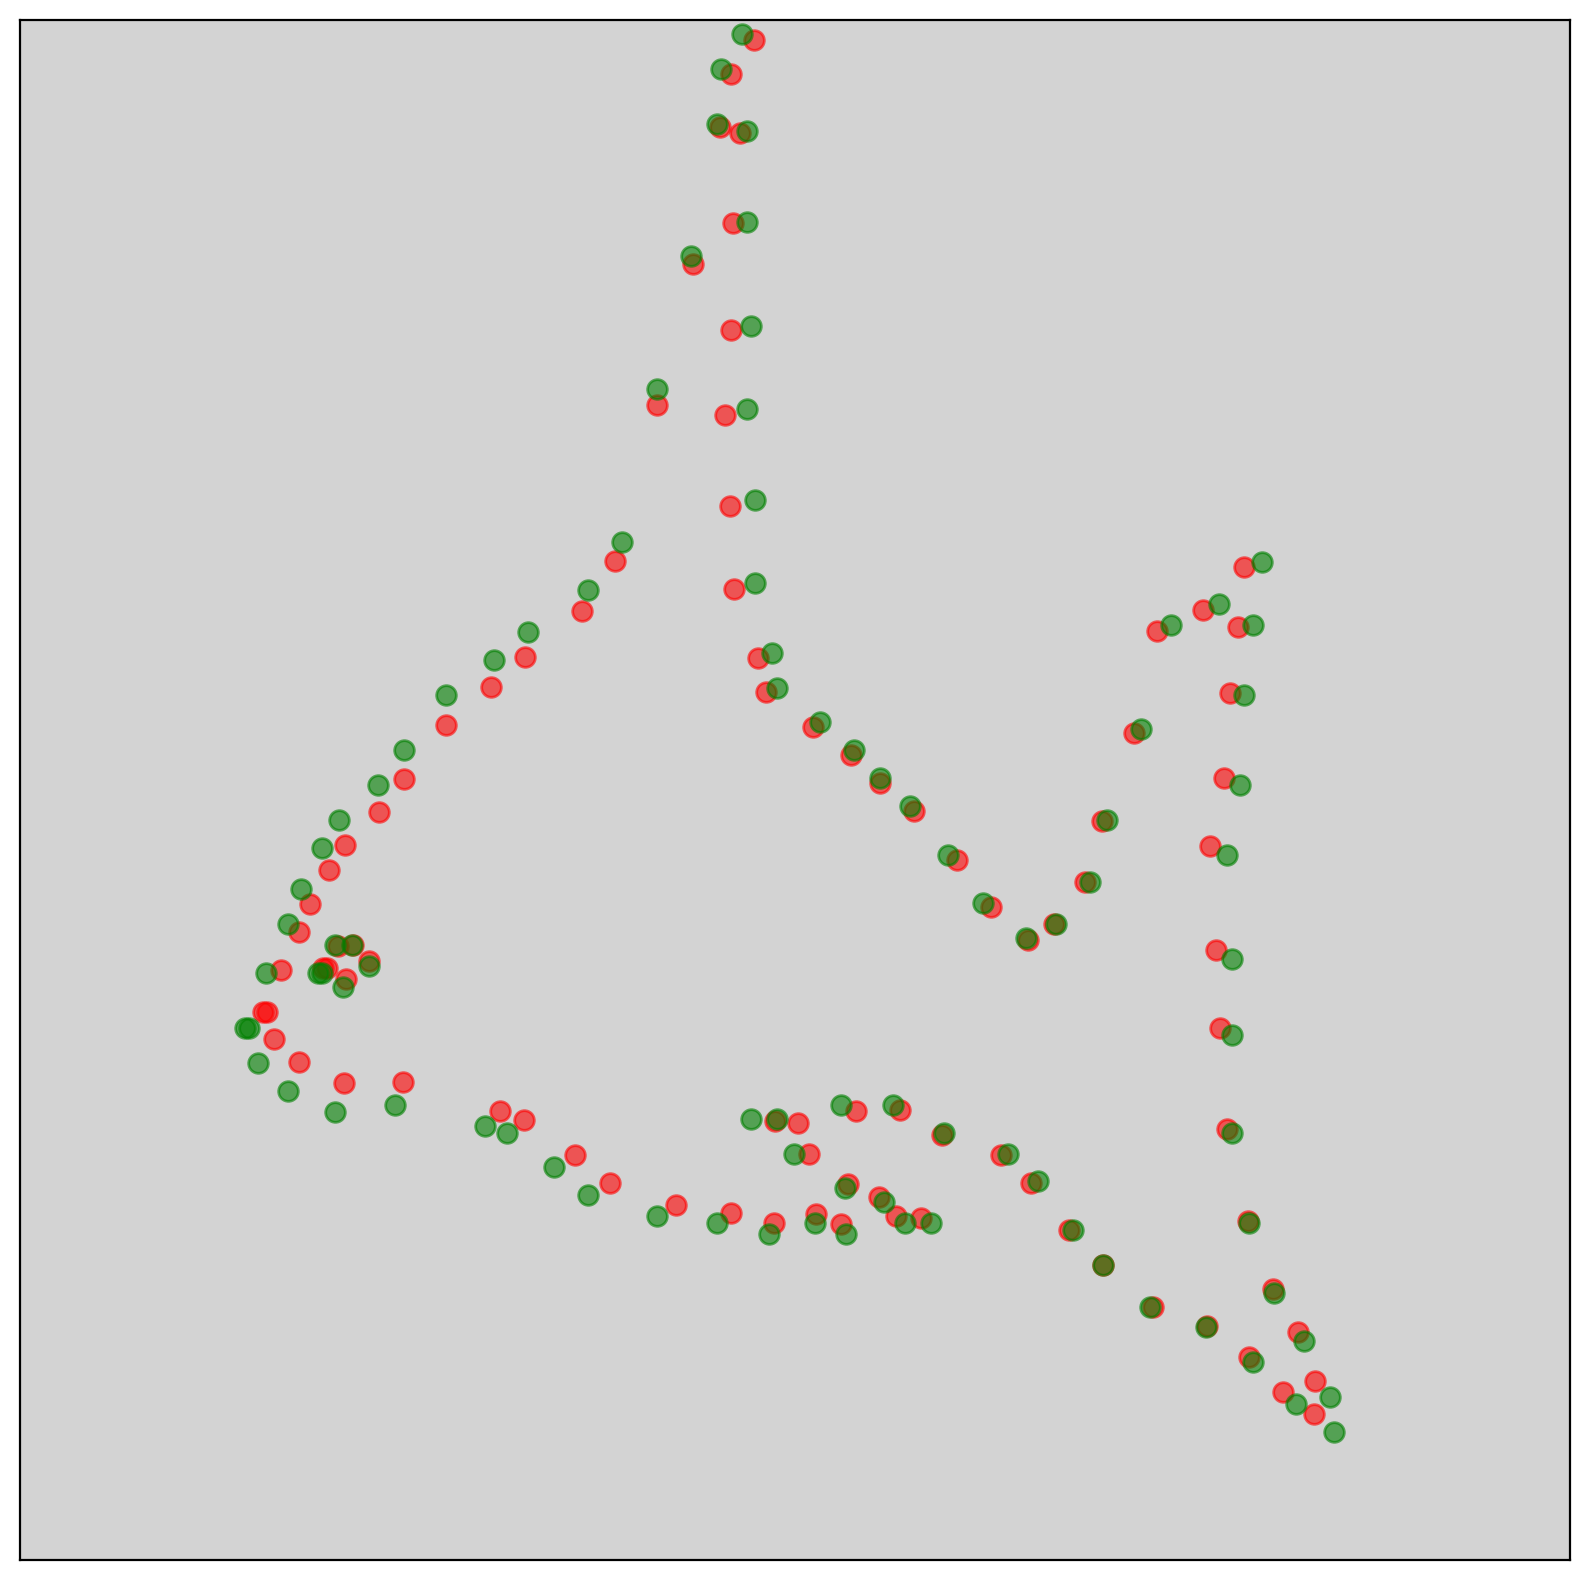

last error is 0.05070960312792106


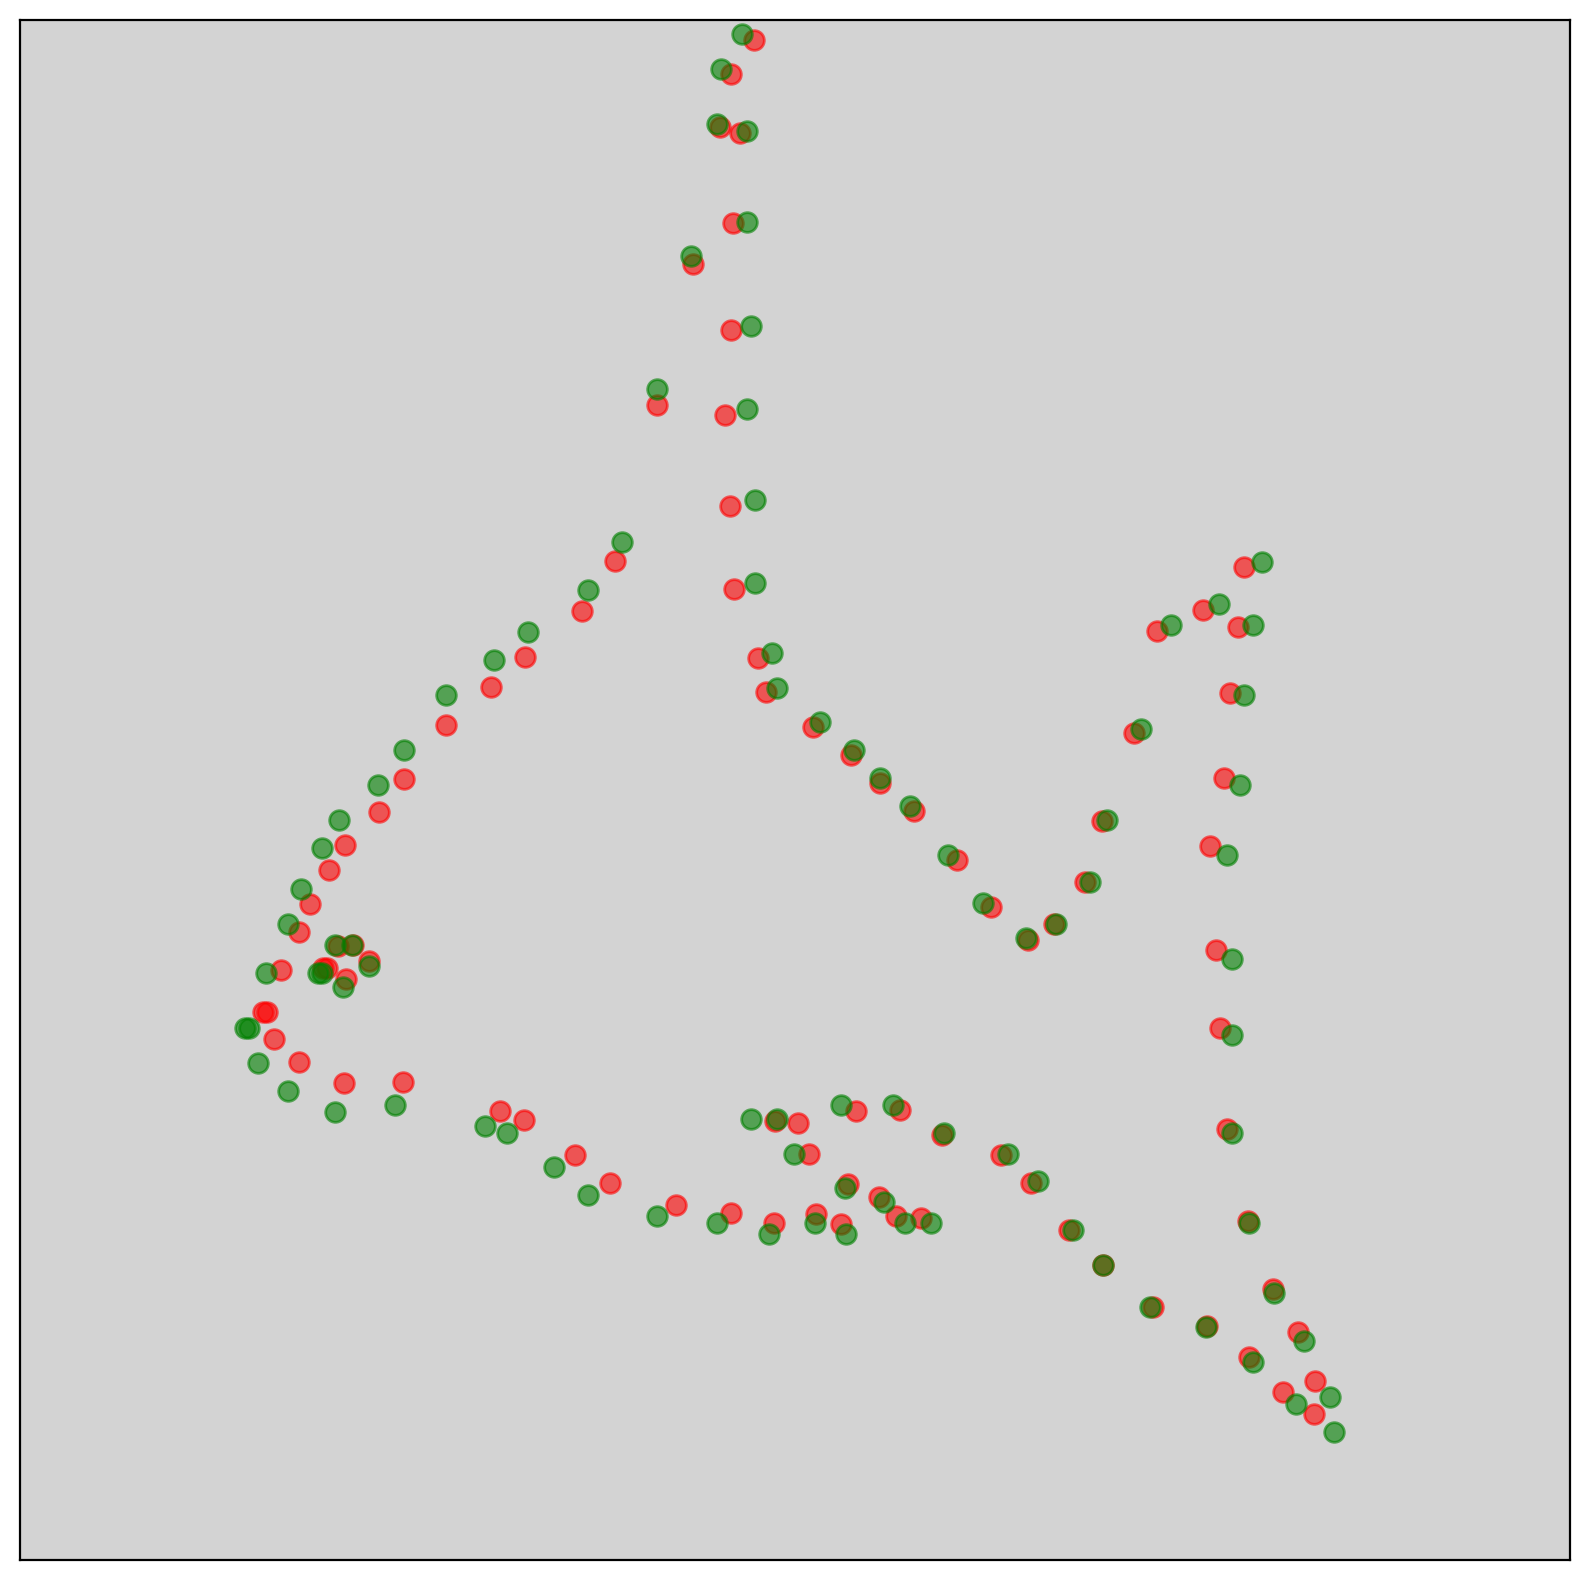

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.10/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is TPS-RPM, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


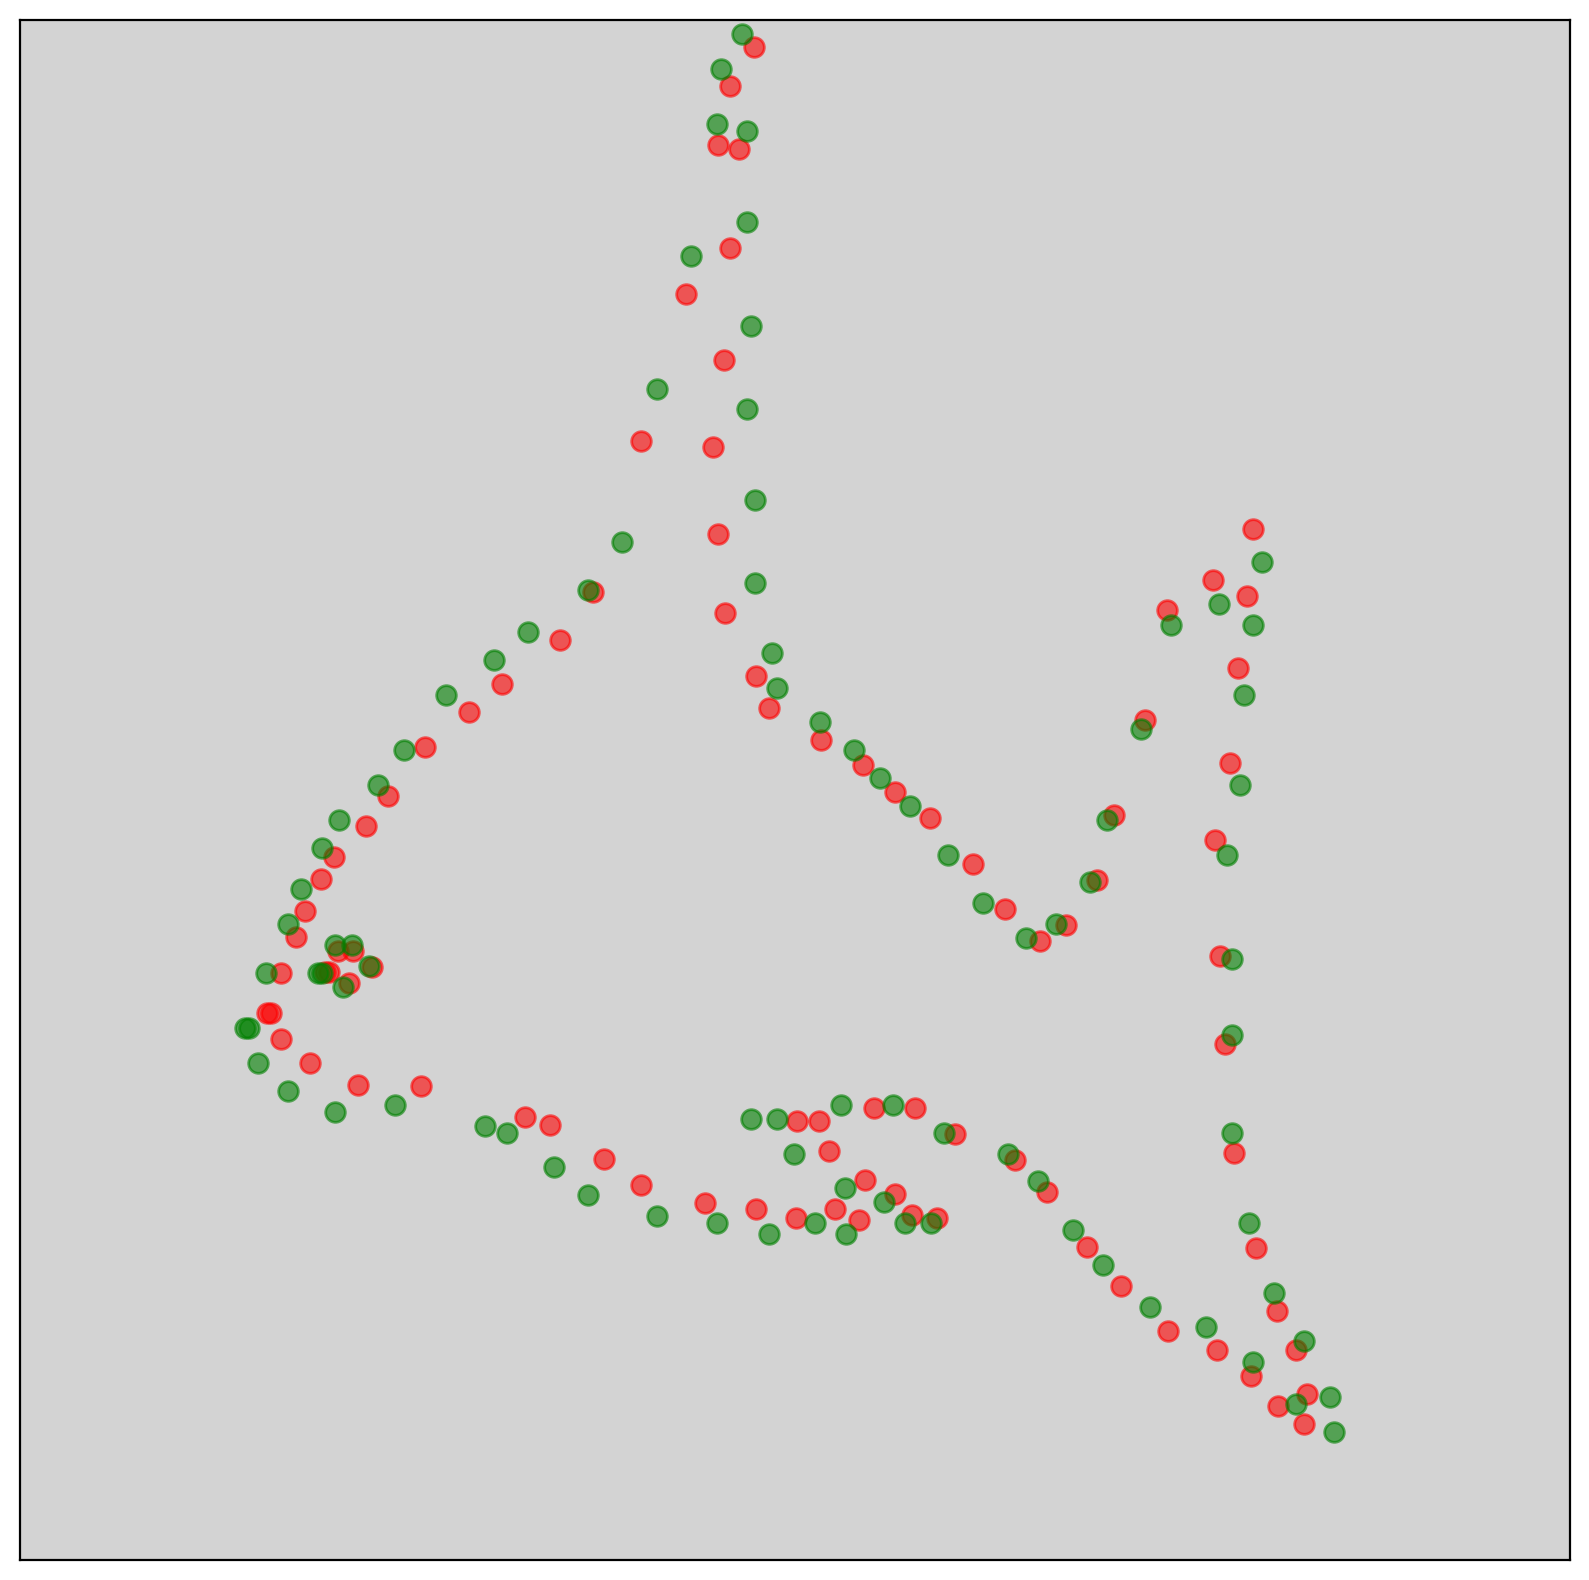

last error is 0.0923436298907223


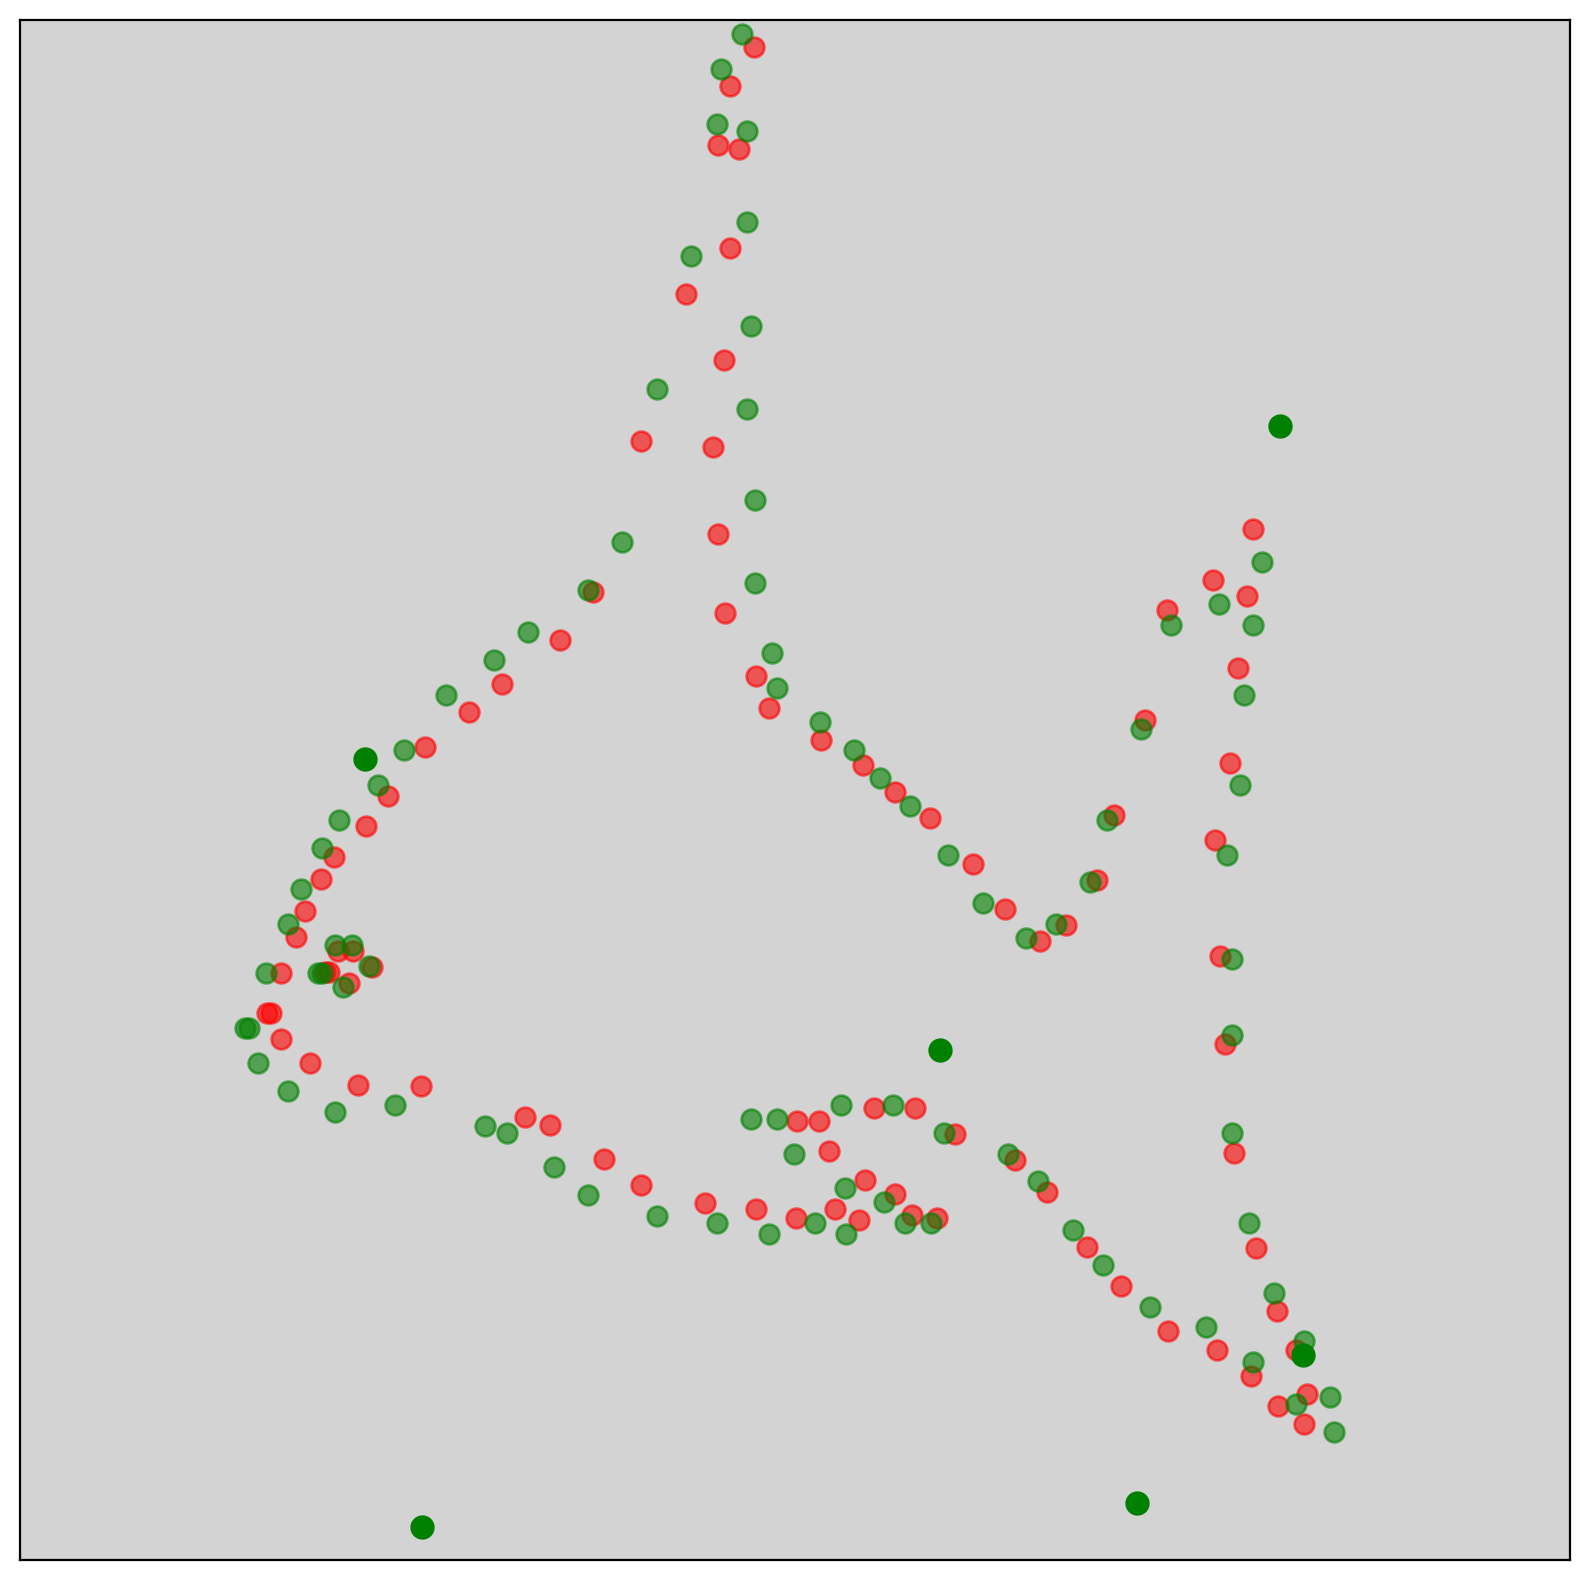

<<<<<<<end<<<<<<<<<<<<
results/2D_fish_0.20/
<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<
method is TPS-RPM, record_idx is [ 0 11 22 33 44 55 66 77 88 99]


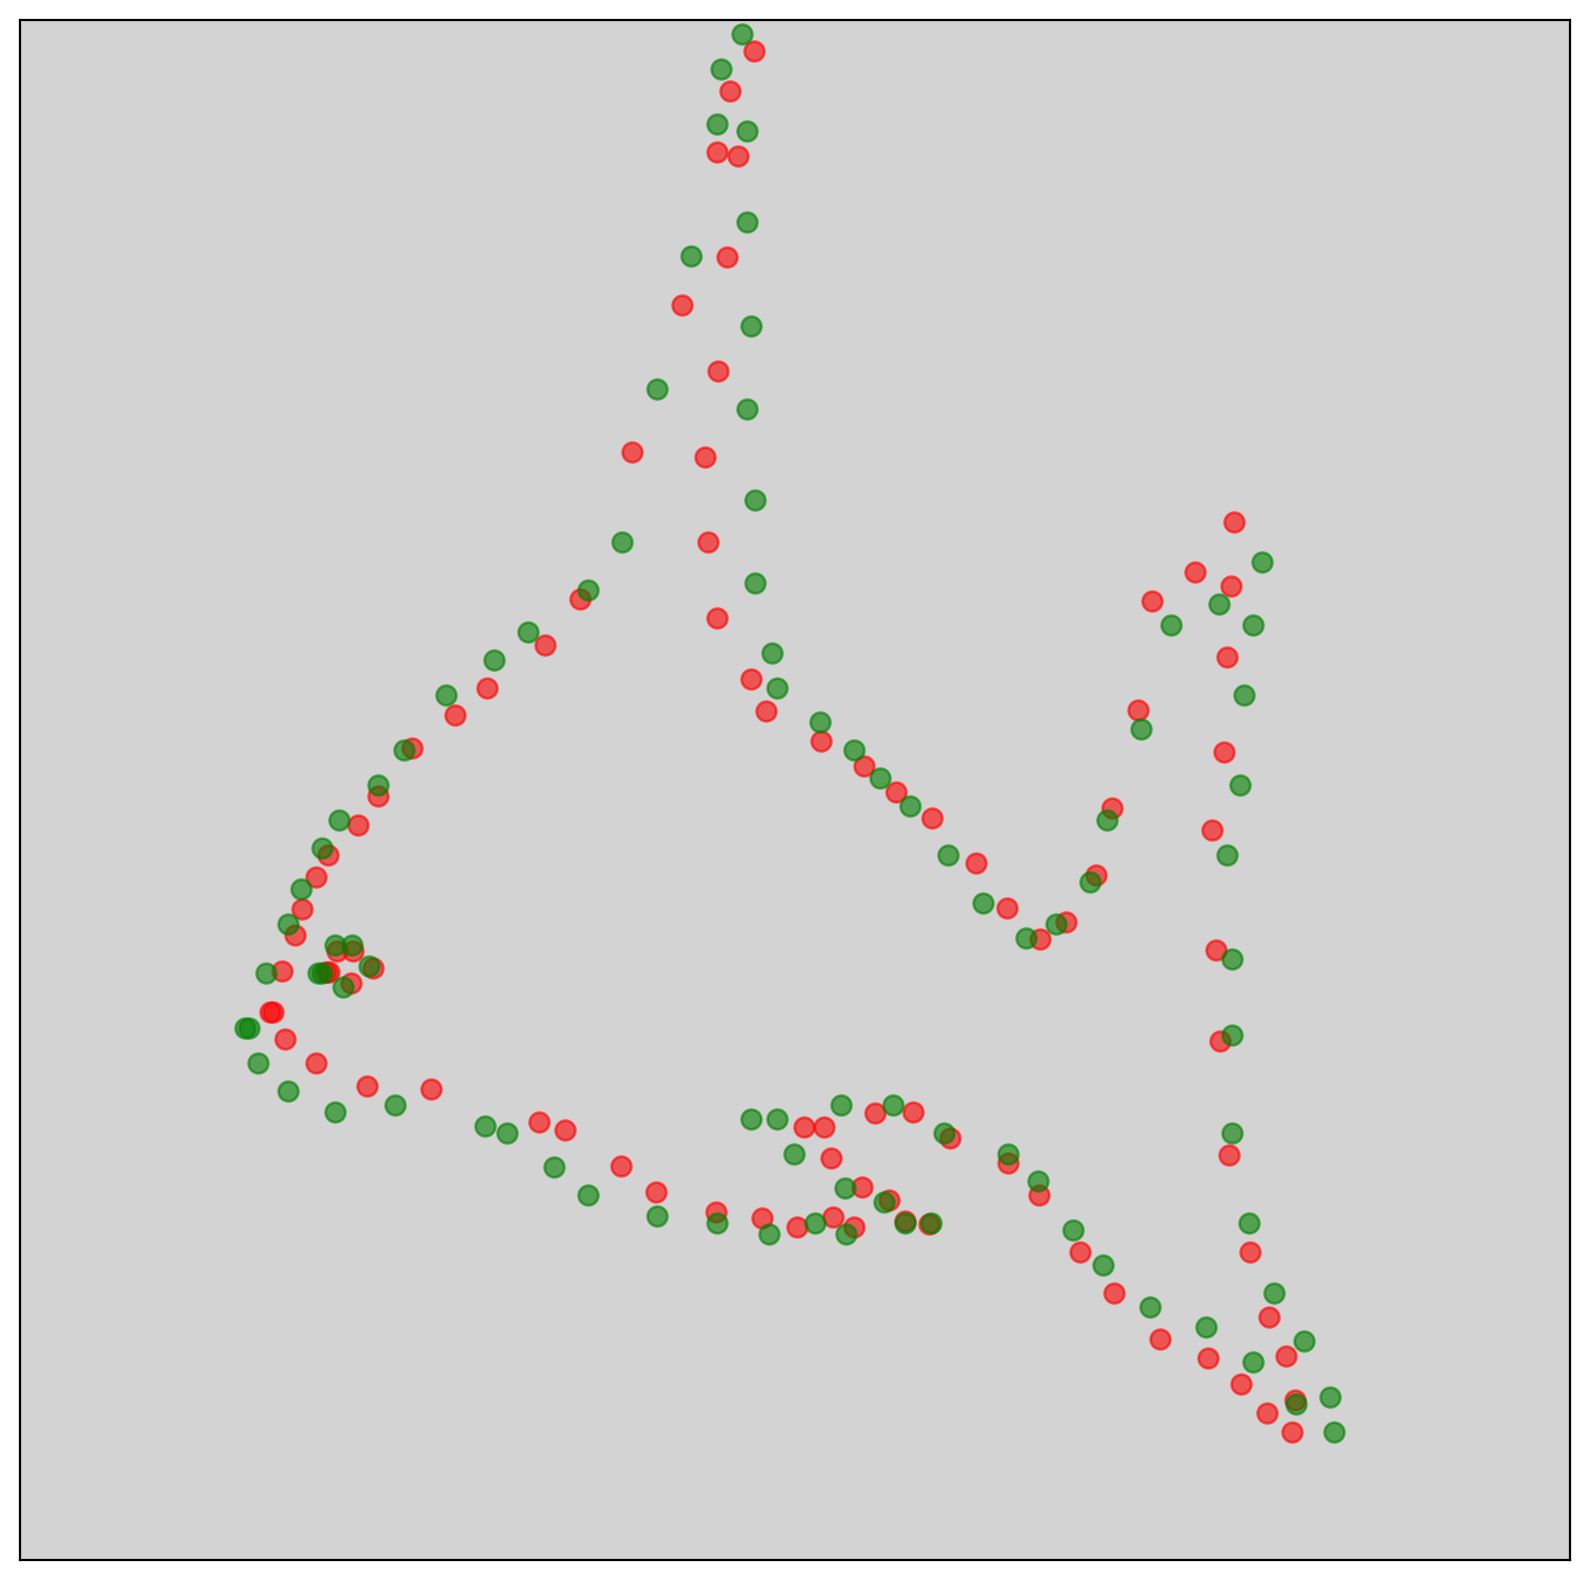

last error is 0.1101576989096567


In [ ]:
label='2D_fish'
data=torch.load('data/%s.pt'%(label))

for method in method_list[1:]:
    for eta in eta_list:
        save_path='results/%s_%0.2f/'%(label,eta)
        print(save_path)

        X0=data['X0']
        N0=X0.shape[0]
        permutation=data['permutation%s'%eta]
        X=data['X'+str(eta)].copy()[0:N0]
        Y=data['Y'+str(eta)].copy()

        model,Yhat_list1,record_idx,runing_time=torch.load(save_path+'%s.pt'%(method))
        print('<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<')      
        print('method is %s, record_idx is %s'%(method,record_idx))
        error_list=compute_error(X=X.copy(),Y=Y.copy(),N0=N0,permutation=permutation,model=model,method=method,plot_func=make_plot_fish)
        torch.save((record_idx,error_list),save_path+'%s_error.pt'%(method))
        
        Yhat_list=model_to_Yhat(model,X,method)
        path=save_path+'pic/'+method
        visual(Yhat_list,Y,N0,path,record_idx,make_plot_fish,log=False)
        print('<<<<<<<end<<<<<<<<<<<<')

In [ ]:
eta_list=[0.00,0.10,0.20,0.30]
label_list=['2D_fish']
for method in method_list[1:]:
    for eta in eta_list:
        print('<<<<<<<<<<<<<<<begin<<<<<<<<<<<<<<<<<<<<')    
        print('eta=%s,method=%s'%(eta,method))
        error=[]
        for label in label_list:
            print('label is',label)
            save_path='results/%s_%0.2f/'%(label,eta)
            record_idx,error_list=torch.load(save_path+'%s_error.pt'%method)
            error.append(error_list[-1])
        error=np.array(error)
        #print(error)
        print('mean of error is %s, standard deviation is %s'%(error.mean(),error.std()))
        print('<<<<<<<<<<<<<<end<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')



In [ ]:
method_list=[
    'init',
  'CPD',
'OT-RBF',
'OT-TPS', 
'SOT-RBF',
'SOT-TPS',
 'TPS-RPM',
 'TPS-RPM-new',
  'OPT-RBF',
  'OPT-TPS',
   'SOPT-RBF',
   'SOPT-TPS'
]


import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# List of PNG file paths.
# Replace this with the paths to your own images.


# Number of rows and columns

eta_list=[0.00,0.10,0.20,0.30]

cols = len(method_list)
rows = len(eta_list)



# Index for iterating over filepaths
index = 0

# Iterate over each subplot and display the image


    
# Create a figure
fig, axs = plt.subplots(rows, cols, figsize=(12*5, 4*5))
# Remove the gaps between subplots
    
for (j,eta) in enumerate(eta_list):
    save_path='results/%s_%0.2f/'%(label,eta)
    for (i,method) in enumerate(method_list):
        # print('method here',method)
        if i in [0]:
            path=save_path+'pic/init.jpg'
        else:
            path=save_path+'pic/'+method+'_final.jpg'
        img = mpimg.imread(path)
        img_crop=img[:,:,:]
        axs[j,i].imshow(img_crop)
        axs[j,i].set_xticks([])
        axs[j,i].set_yticks([])
        # axs[i, j].axis('off')  # Hide axes
        if j==rows-1:
            #print('method here2',method)
            #print('i is',i)
            if method=='TPS-RPM-new':
                method_name='TPS-RPM(new)'
            else:
                method_name=method
            axs[j, i].set_xlabel(method_name,fontsize=30)
        if i==0:
            axs[j, i].set_ylabel('$\eta$=%i'%(eta*100)+'\%',fontsize=30)
        
#     for (i,method) in enumerate(method_list):
#         fig.text(0.1 + (i * 0.1), 0.05, method, ha='center')
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('results/2d_fish_row.pdf', bbox_inches='tight', pad_inches=0)
# Display the figure
plt.show()

In [ ]:
method_list=[
    'init',
  'CPD',
'OT-RBF',
'OT-TPS', 
'SOT-RBF',
'SOT-TPS',
 'TPS-RPM',
 'TPS-RPM-new',
  'OPT-RBF',
  'OPT-TPS',
   'SOPT-RBF',
   'SOPT-TPS'
]
eta_list=[0.00,0.05,0.10]
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# List of PNG file paths.
# Replace this with the paths to your own images.


# Number of rows and columns

rows = len(method_list)
cols = len(eta_list)



# Index for iterating over filepaths
index = 0

# Iterate over each subplot and display the image


    
# Create a figure
fig, axs = plt.subplots(rows, cols, figsize=(3*5, 12*5))
# Remove the gaps between subplots
    
for (j,eta) in enumerate(eta_list):
    save_path='results/%s_%0.2f/'%(label,eta)
    for (i,method) in enumerate(method_list):
        # print('method here',method)
        if i in [0]:
            path=save_path+'pic/init.jpg'
        else:
            path=save_path+'pic/'+method+'_final.jpg'
        img = mpimg.imread(path)
        img_crop=img[:,:,:]
        axs[i, j].imshow(img_crop)
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        # axs[i, j].axis('off')  # Hide axes
        if j==0:
            #print('method here2',method)
            #print('i is',i)
            if method=='TPS-RPM-new':
                method_name='TPS-RPM(new)'
            else:
                method_name=method
            axs[i, j].set_ylabel(method_name,fontsize=30)
        if i==rows-1:
            axs[i, j].set_xlabel('eta=%0.2f'%eta,fontsize=30)
        
#     for (i,method) in enumerate(method_list):
#         fig.text(0.1 + (i * 0.1), 0.05, method, ha='center')
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('results/2D_fish_col.pdf', bbox_inches='tight', pad_inches=0)
# Display the figure
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib.animation as animation
from IPython.display import HTML


# Create a new figure and axis object
fig, ax = plt.subplots()

# Initialize the camera
camera = Camera(fig)

# Loop to create 100 figures
for i in range(100):
    # Here I'm using a simple line plot as an example, replace this with your figure generation code
    x = np.linspace(0, 2*np.pi, 100)
    y = np.sin(x + i * 0.1)  # Sine wave, phase-shifted with i for the animation effect
    ax.plot(x, y, label=f'Frame {i+1}')
    
    # Capture the current frame/figure
    camera.snap()

# Create an animation from captured frames
animation = camera.animate()

# Save the animation to a file
animation.save('animation.mp4', writer='Pillow', fps=5)

plt.show()